In [4]:
%reset -f
import ROOT
import numpy as np
file = ROOT.TFile.Open("/w/hallb-scshelf2102/clas12/ricardos/mcR/phi_shift_analysis/indiv_paddle_shits/skimmed_central_all_p41to48_no_MM_cut_5_28_24.root")
tree = file.Get("h22")
rdf = ROOT.RDataFrame(tree)
pipPAxis = "P_{#pi^{+}}"
pipPhiAxis = "#phi_{#pi^{+}}"
pipThetaAxis = "#theta_{#pi^{+}}"
print("Number of entries:", rdf.Count().GetValue())
com_to_check = 43
phi_y_mi = 240
phi_y_ma = 320
f_rdf = rdf.Filter(f"component == {com_to_check}")

Number of entries: 22553961


In [5]:
def theta_bin_2histo(rdf, range_min, range_max, com_num):
    title = f"#pi^{{+}}, #phi vs P , paddle {com_num}, {range_min} <= #theta < {range_max}, no shift; {pipPAxis}; {pipPhiAxis}"
    cut_rdf = rdf.Filter(f"pipTheta >= {range_min} && pipTheta < {range_max}")
    theta_bin_histo2d = cut_rdf.Histo2D((f"paddle {com_num}", title, 300, 0, 4, 360, phi_y_mi, phi_y_ma), "pipP",  "pipPhiw")
    return theta_bin_histo2d
def print_rounded_str(number=0, rounding=0):

        #if(rounding != 0 and type(number) is not str and (abs(number) > 10**(-abs(rounding-round_science)) or abs(number) >= 0.001)):
    if(rounding != 0 and abs(number) >= 0.001):
        output = round(number, rounding)
        output = "".join(["{:.", str(rounding), "}"]).format(float(number))
        # print("round")
    elif(rounding != 0):
        output = "".join(["{:.", str(rounding-1), "e}"]).format(float(number))
        # print("science")
    else:
        # print("other")
        output = number

    return output
# for root color purposes 
kWhite  = 0
kBlack  = 1
kGray  = 920
kRed  = 632
kGreen  = 416
kBlue = 600
kYellow = 400
kMagenta = 616
kCyan = 432
kOrange = 800
kSpring = 820
kTeal = 840
kAzure =  860
kViolet = 880
kPink = 900
# col_list = [kBlack, kRed, kGreen, kBlue, kAzure, kPink, kBlack, kRed, kGreen, kBlue, kAzure, kPink, kBlack, kRed, kGreen, kBlue, kAzure, kPink]
col_list = [kRed -10, kRed -9, kRed -7, kRed-4, kRed, kRed+2, kGreen -10, kGreen -9, kGreen -7, kGreen-4, kGreen, kGreen+2, kBlue -10, kBlue -9, kBlue -7, kBlue-4, kBlue, kBlue+2,kViolet -10, kViolet -9, kViolet -7, kViolet-4, kViolet, kViolet+2]
def set_color(histo, col):
    histo.SetStats(0)
    histo.gr.SetMarkerStyle(8)
    histo.gr.SetMarkerSize(0.8)
    histo.gr.SetLineStyle(1)
    histo.gr.SetLineColor(col)

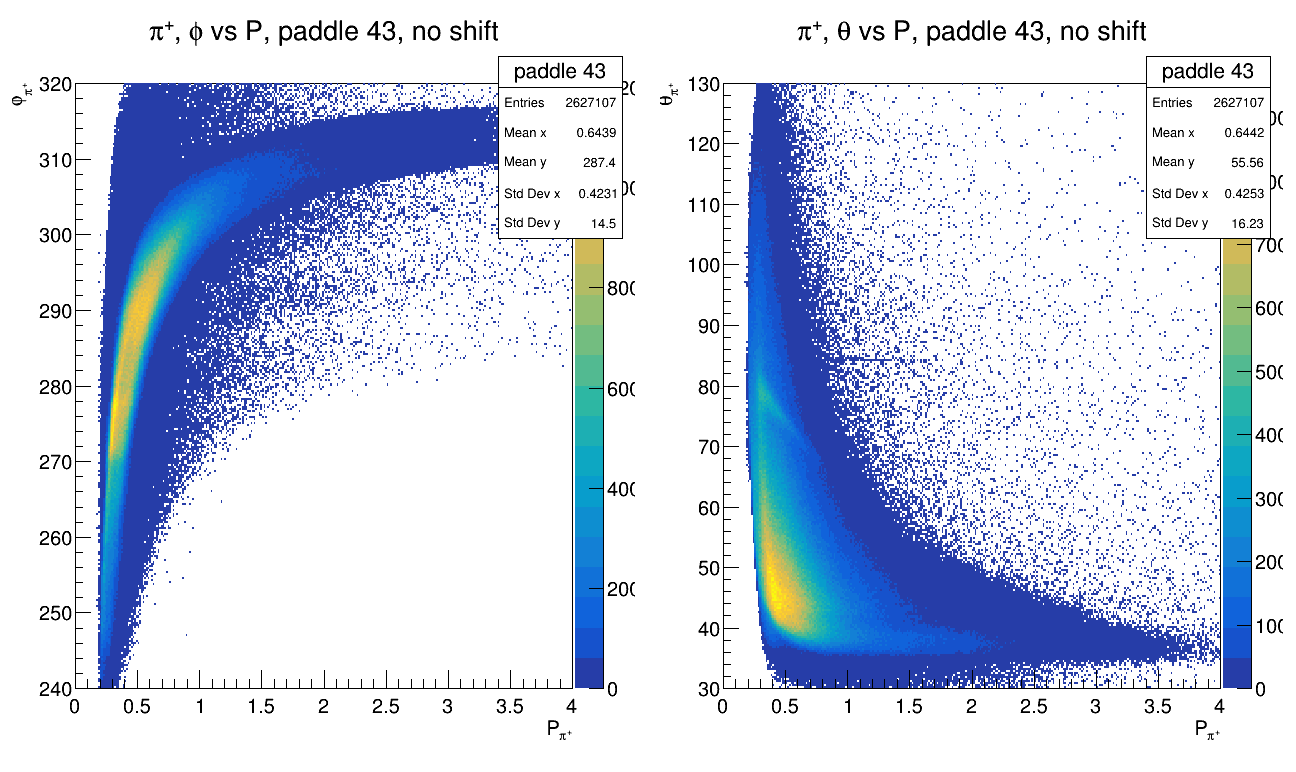

In [6]:
title = f"#pi^{{+}}, #phi vs P, paddle {com_to_check}, no shift; {pipPAxis}; {pipPhiAxis}"
p_band_ns = f_rdf.Histo2D((f"paddle {com_to_check}", title, 300, 0, 4, 300, phi_y_mi, phi_y_ma), "pipP",  "pipPhiw")
titleth = f"#pi^{{+}}, #theta vs P, paddle {com_to_check}, no shift; {pipPAxis}; {pipThetaAxis}"
pth_band_ns = f_rdf.Histo2D((f"paddle {com_to_check}", titleth, 300, 0, 4, 300, 30, 130), "pipP",  "pipTheta")
c_sp = ROOT.TCanvas("c_sp", "c_sp", 1300,800)
c_sp.Divide(2,1)
c_sp.cd(1)
p_band_ns.Draw("colz")
c_sp.cd(2)
pth_band_ns.Draw("colz")
c_sp.Draw()

19


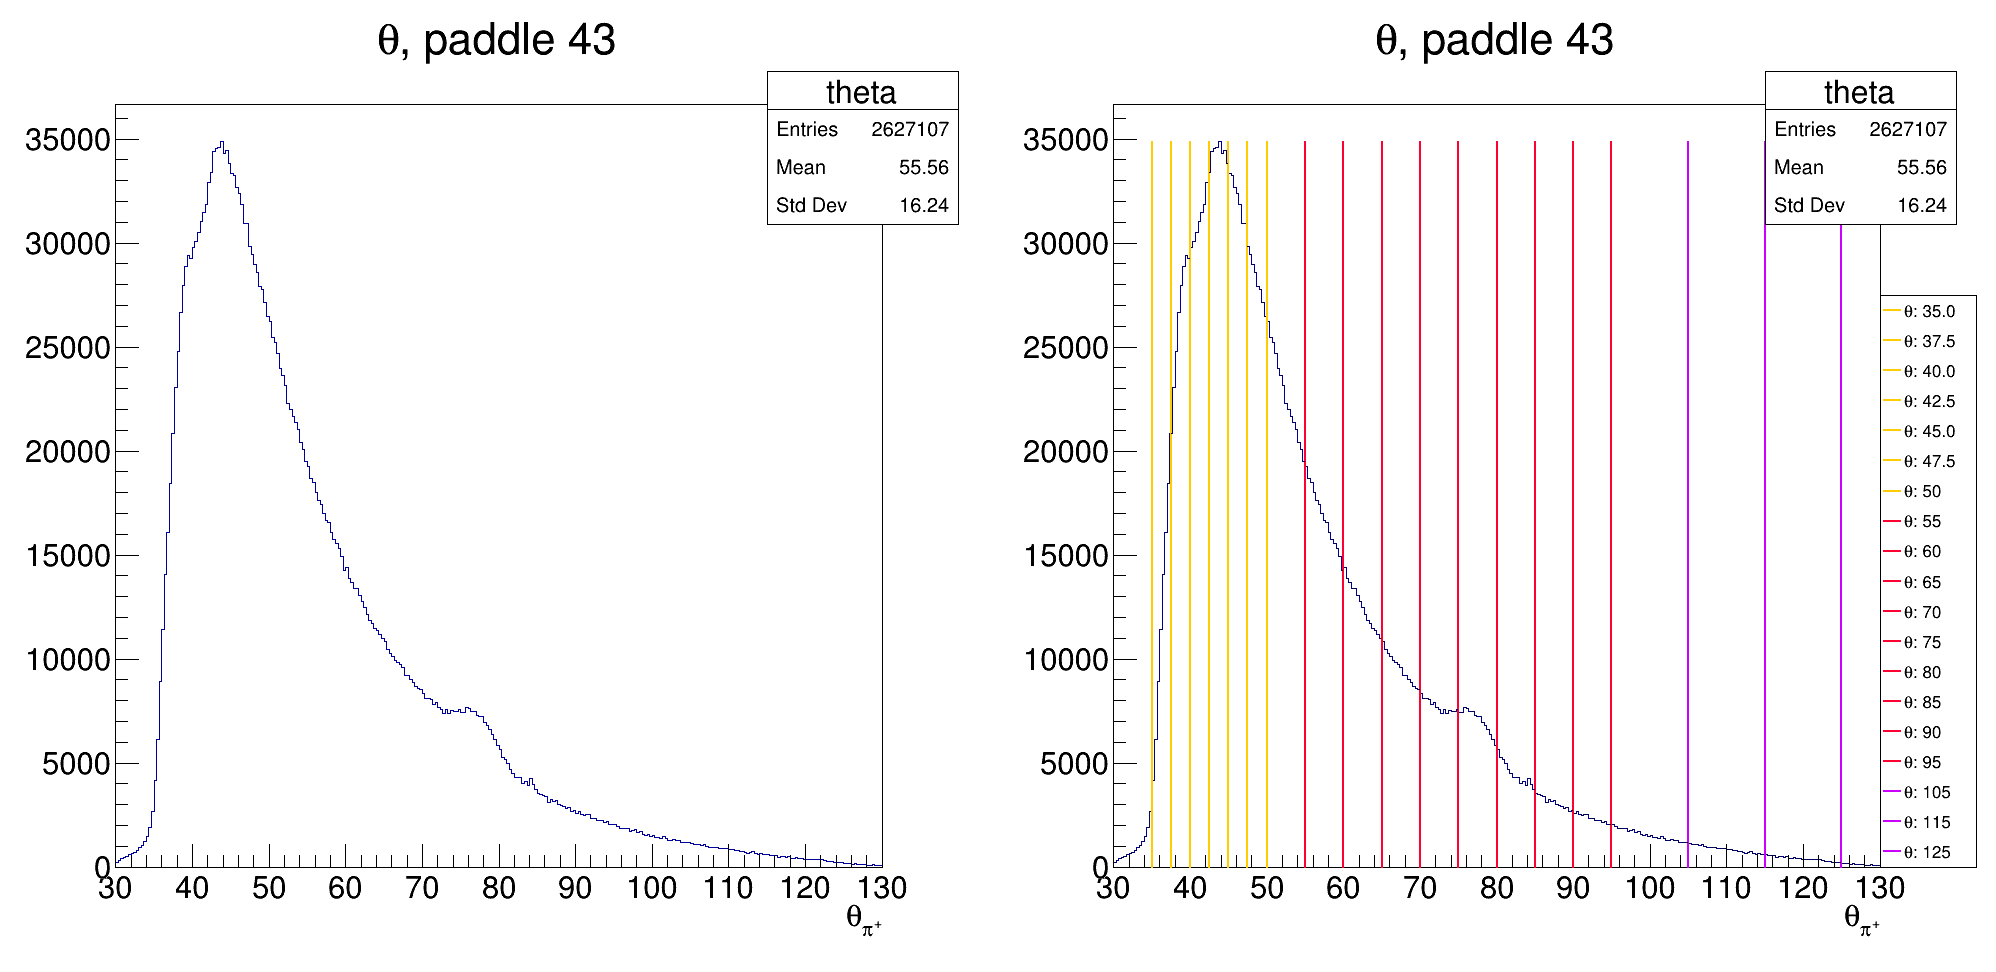

In [7]:
p_theta = f_rdf.Histo1D(("theta", f"#theta, paddle {com_to_check};{pipThetaAxis}", 300,30,130),"pipTheta")
p_theta_wbl = f_rdf.Histo1D(("theta", f"#theta, paddle {com_to_check};{pipThetaAxis}", 300,30,130),"pipTheta")
c_th = ROOT.TCanvas("c_th", "c_th", 2000,1000)
c_th.Divide(2,1)
c_th.cd(1)
p_theta.Draw()
c_th.cd(2)
p_theta_wbl.Draw()
max_bin_content = p_theta_wbl.GetMaximum()
line_list = []
mod_min_list = [35.0, 37.5, 40.0, 42.5, 45.0, 47.5, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 105, 115, 125]

for i in mod_min_list:
#     max_bin_content = th.GetBinContent(th.FindBin(i))
    line = ROOT.TLine(i, 0, i, max_bin_content)
    if (i <= 50):
        line.SetLineColor(kOrange)
    elif (i > 50 and i < 96):
        line.SetLineColor(kPink)
    else:
        line.SetLineColor(kViolet)
    line.SetLineWidth(2)
    line.SetLineStyle(1)
    line_list.append(line)

print(len(line_list))
legend = ROOT.TLegend(0.9, 0.7, 1, 0.1)
legend.SetNColumns(1)
for i in range(len(line_list)):
    line_list[i].Draw()
    legend.AddEntry(line_list[i],f"#theta: {mod_min_list[i]}","L")
    p_theta_wbl.Draw("P Same")
legend.Draw()
c_th.Draw()

In [8]:
min_list = []
max_list = []
for i in range(6):
    inc = 2.5
    range_min = 35+(i*inc)
    range_max = 35+((i+1)*inc)
    min_list.append(range_min)
    max_list.append(range_max)
for i in range(9):
    inc = 5
    range_min = 50+(i*inc)
    range_max = 50+((i+1)*inc)
    min_list.append(range_min)
    max_list.append(range_max)
for i in range(3):
    inc = 10
    range_min = 95+(i*inc)
    range_max = 95+((i+1)*inc)
    min_list.append(range_min)
    max_list.append(range_max)
print(min_list)
print(max_list)
# min_list[0] = 30
# min_list[0] = 30

[35.0, 37.5, 40.0, 42.5, 45.0, 47.5, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 105, 115]
[37.5, 40.0, 42.5, 45.0, 47.5, 50.0, 55, 60, 65, 70, 75, 80, 85, 90, 95, 105, 115, 125]


18
18


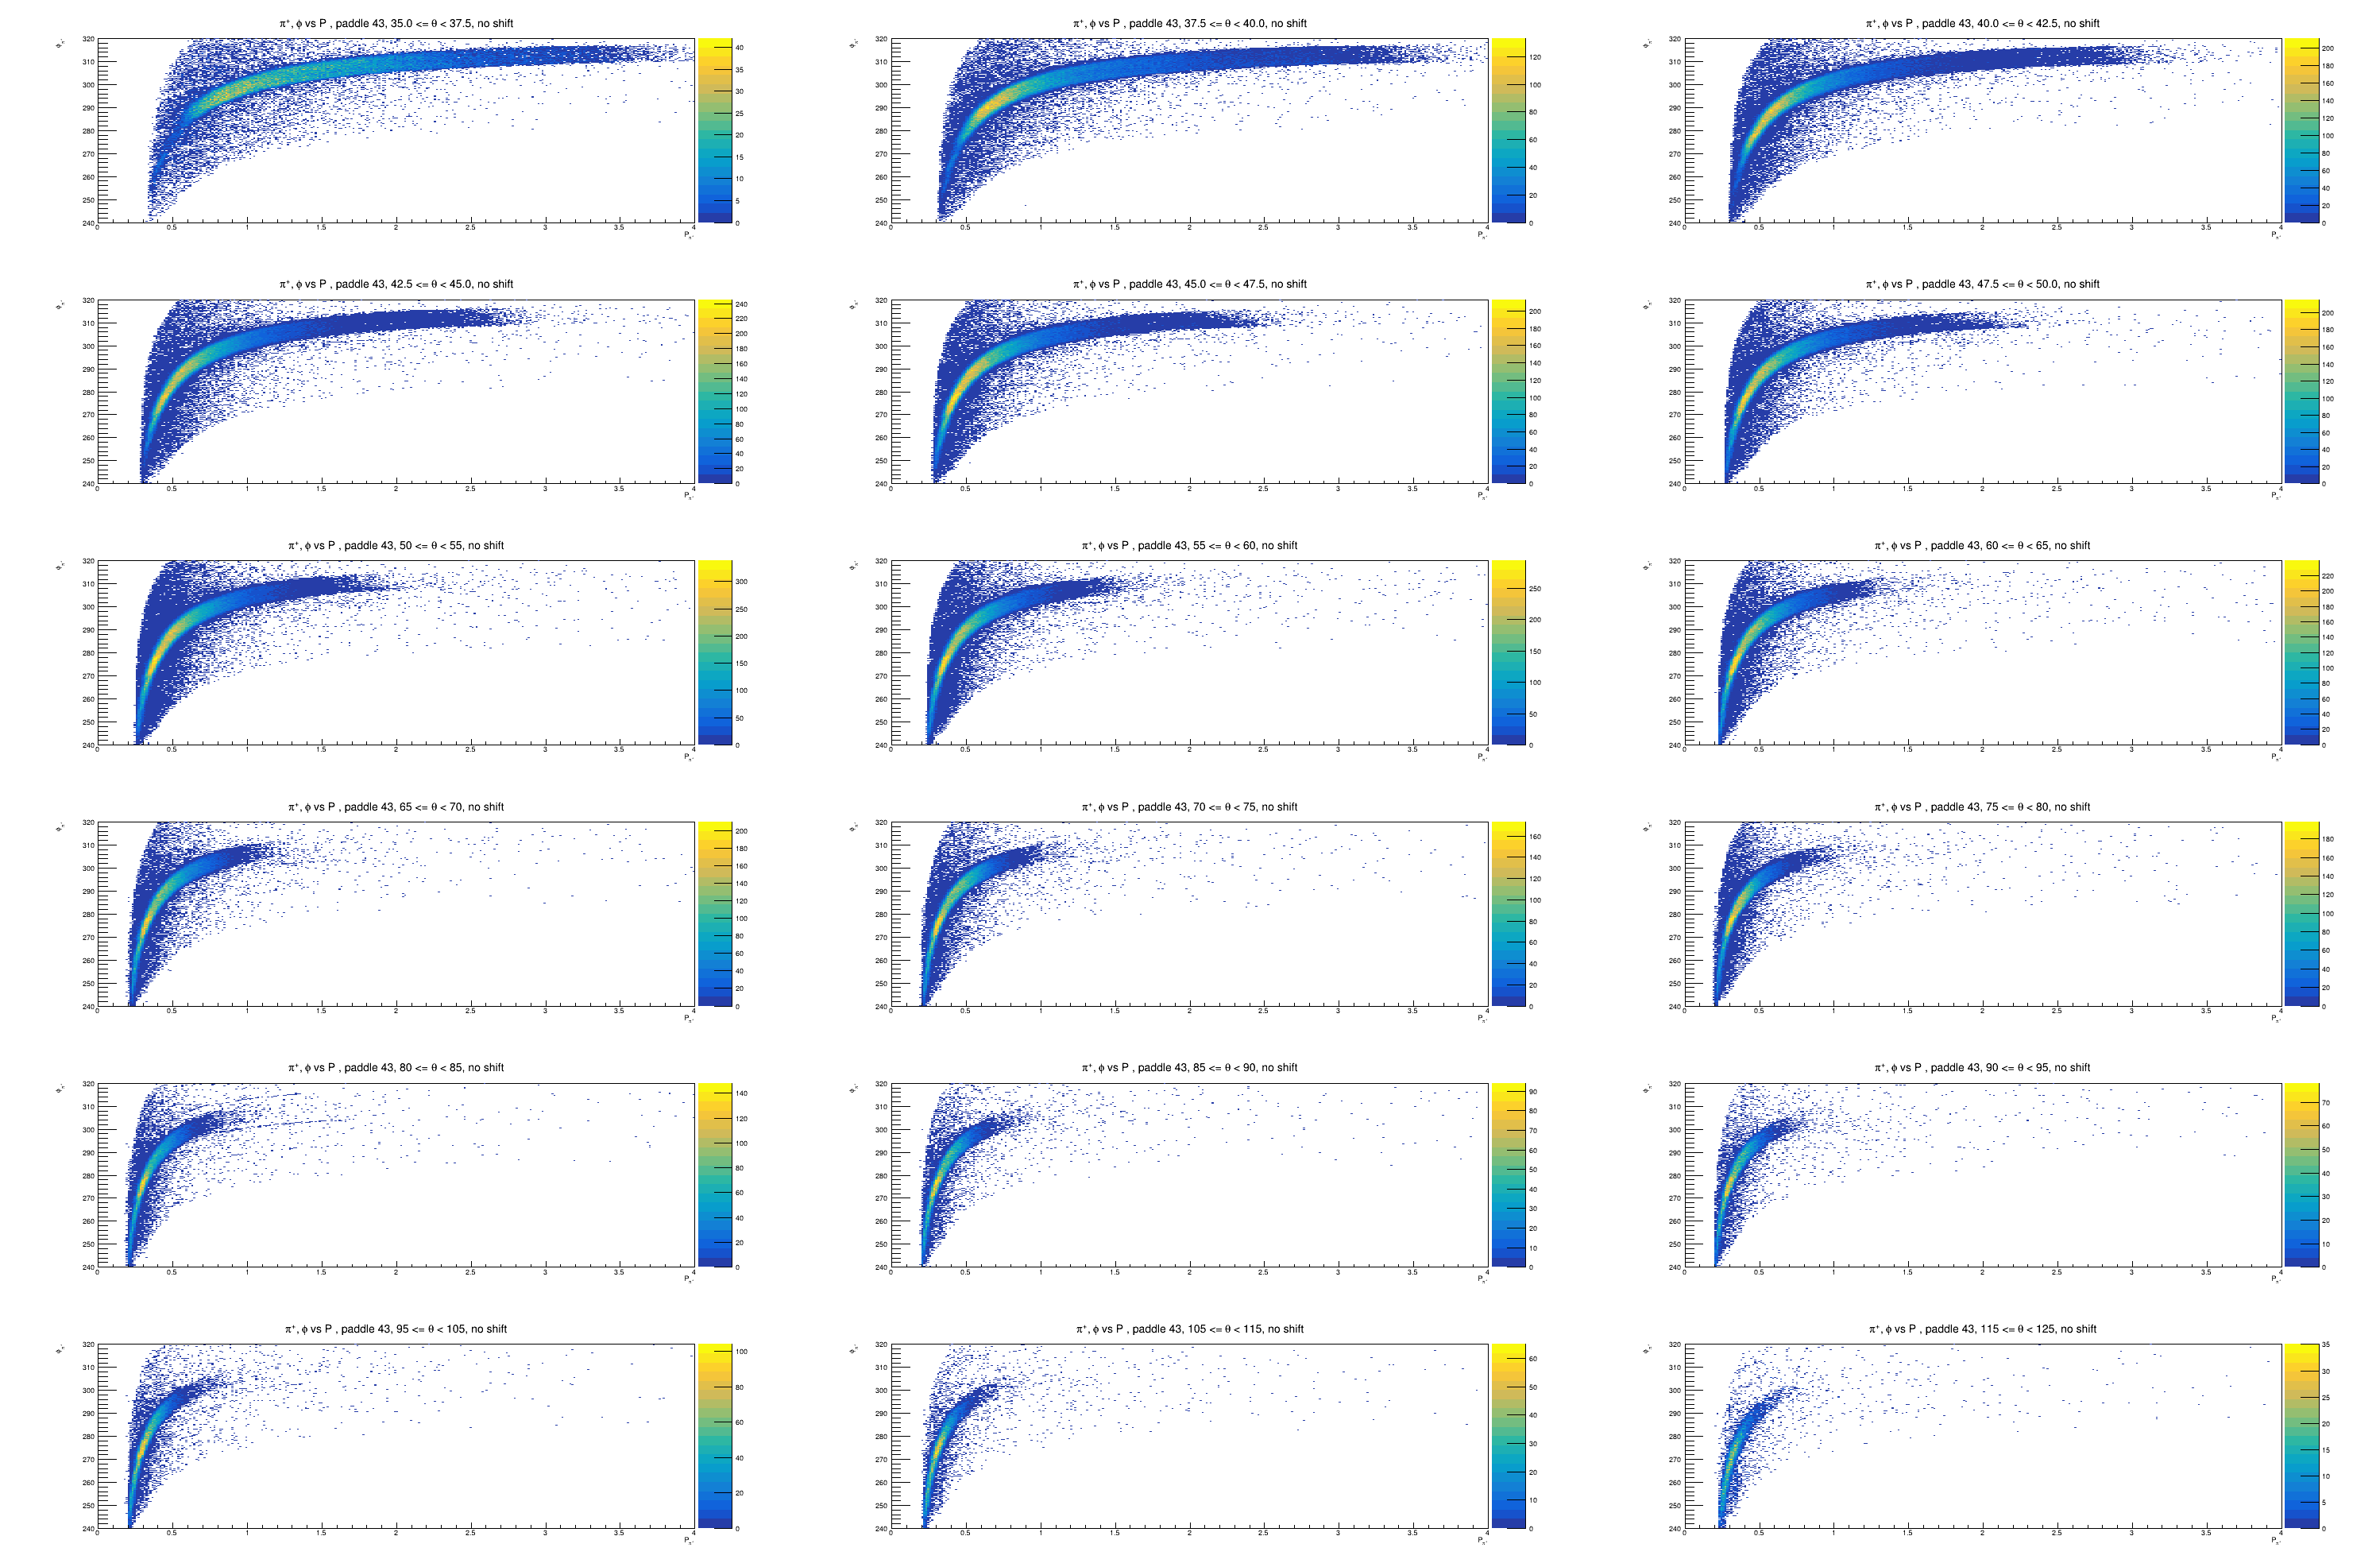

In [9]:
th_histos = []
f2_rdf = f_rdf
for i in range(len(min_list)):
        th_histos.append(theta_bin_2histo(f2_rdf, min_list[i], max_list[i], com_to_check))

print(len(th_histos))

c_th = ROOT.TCanvas("c_th", "c_th", 3000,2000)
c_th.Divide(3,6)
for i in range(len(th_histos)):
    c_th.cd(i+1)
    th_histos[i].SetStats(0)
    th_histos[i].Draw("colz")
c_th.Draw()
print(f"{len(th_histos)}")

In [10]:
################################################
# Run these to make the bands easier to read and put on a presentation
################################################

# c_th = ROOT.TCanvas("c_th", "c_th", 3000,2000)
# c_th.Divide(3,3)
# for i in range(9):
#     c_th.cd(i+1)
#     th_histos[i].SetStats(0)
#     th_histos[i].Draw("colz")
# c_th.Draw()
# print(f"{len(th_histos)}")

In [11]:
################################################
# Run these to make the bands easier to read and put on a presentation
################################################
# c_th = ROOT.TCanvas("c_th", "c_th", 3000,2000)
# c_th.Divide(3,3)
# for i in range(9,18):
#     c_th.cd(i+1-9)
#     th_histos[i].SetStats(0)
#     th_histos[i].Draw("colz")
# c_th.Draw()
# print(f"{len(th_histos)}")

In [12]:
def fit2d_p3(h2,component, xlims, fit_col, bin_num):
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        max_count = hy.GetBinContent(hy.GetMaximumBin())
        hy.Rebin(2)
        if (bin_num == 17):
            hy.Rebin(2)
        if (bin_num == 14 and x1> 0.3):
            hy.Rebin(2)
        max_count = hy.GetBinContent(hy.GetMaximumBin())

        if(max_count < 80):
            hy.Rebin(2)
        max_count = hy.GetBinContent(hy.GetMaximumBin())
#         if(bin_num == 0 and x1 < 0.5):
#             hy.Rebin(2)
#         fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.5,mx+0.5)
#         if(bin_num == 0 and x1 < 0.7):
#             hy.Rebin(4)
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-8,mx+8)
#         fy = ROOT.TF1("fy","gaus(0)",mx-7.5,mx+7.5)
#         if(mx<0.5):
#             fy.SetRange(mx-25,mx+25)
        if(bin_num  == 17):
            fy.SetRange(mx-20,mx+20)
        if(bin_num == 0 and x1 < 0.6):
#         if(x1 < 0.5):
            fy.SetRange(mx-20,mx+20)
        fy.SetParameter(0,1)
        fy.SetParLimits(0, 0, 1e7)
        fy.SetParameter(1,mx)
        fy.SetParLimits(1, mx - 5, mx + 5)
        fy.SetParameter(2,0.5)
#         if(mx>2):
#             fy.SetParLimits(1, mx - 10, mx + 10)    
#             fy.SetParameter(2,10)
        hy.Fit(fy,"QR")
        sig = fy.GetParameter(2)
#         fy.SetRange(mu-1*sig, mu+1*sig)
#         hy.Fit(fy,"QR")
        pipPT = "P_{#pi^{+}}"
        pipPhiT = "#phi_{#pi^{+}}"
        hy.SetTitle("{} bins: {:.2f} < {} < {:.2f}, paddle {:.0f}".format(pipPhiT, x1, pipPT, x2, component))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, sig) 
        hy.Fit(fy,"QR")
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    fphimean = ROOT.TF1("fit","[0]*exp([1]*pow(x,[3])) +[2]",0,5)
    fphimean.SetParameter(1,-6)
    fphimean.SetParameter(0,-3500)
    fphimean.SetParLimits(0,5000,-10000)
    fphimean.SetParameter(2, 5)
    fphimean.SetParameter(3, .3)
#     fphimean.SetParLimits(2,5,25)

    setattr(h2,"fphimean",fphimean)
    fphimean.SetLineColor(fit_col)
    gr.Fit(fphimean, "RQ")

In [13]:
code_snipA = f'''
# xlims = np.concatenate((np.arange(0.36, 0.5, 0.02), np.arange(0.5, 1.4, 0.1)))
fit2d_p3(th_histos[F], 1, xlims,col_list[F], F)
set_color(th_histos[F],col_list[F])

sq_size = int(len(xlims)**0.5)
can_x, can_y = 650*sq_size,500*sq_size
print(sq_size)
ctF = ROOT.TCanvas("th_bin" + str(0), "th_bin" + str(F), can_x,can_y)
cv_adjust_var = len(xlims)
if(cv_adjust_var > sq_size*sq_size):
    ctF.Divide(sq_size,sq_size+1)
else:
    ctF.Divide(sq_size,sq_size)
ctF.Draw()
print(len(xlims))
for i in range(len(xlims) - 1):
    ctF.cd(i + 1)
    th_histos[F].hys[i].GetXaxis().SetRangeUser(phi_y_mi, phi_y_ma)
    th_histos[F].hys[i].Draw()
ctF.Update()
'''
code_snipB = '''
cF = ROOT.TCanvas("c"+str(F), "c"+str(F), 650, 500)
th_histos[F].Draw("colz")
th_histos[F].gr.Draw("SAME P")
cF.Draw()
'''
code_listA = []
code_listB = []
for F in range(21):
    modified_codeA = code_snipA.replace('F', str(F))
    modified_codeB = code_snipB.replace('F', str(F))
#     print(modified_code)
    code_listA.append(modified_codeA)
    code_listB.append(modified_codeB)

4
24


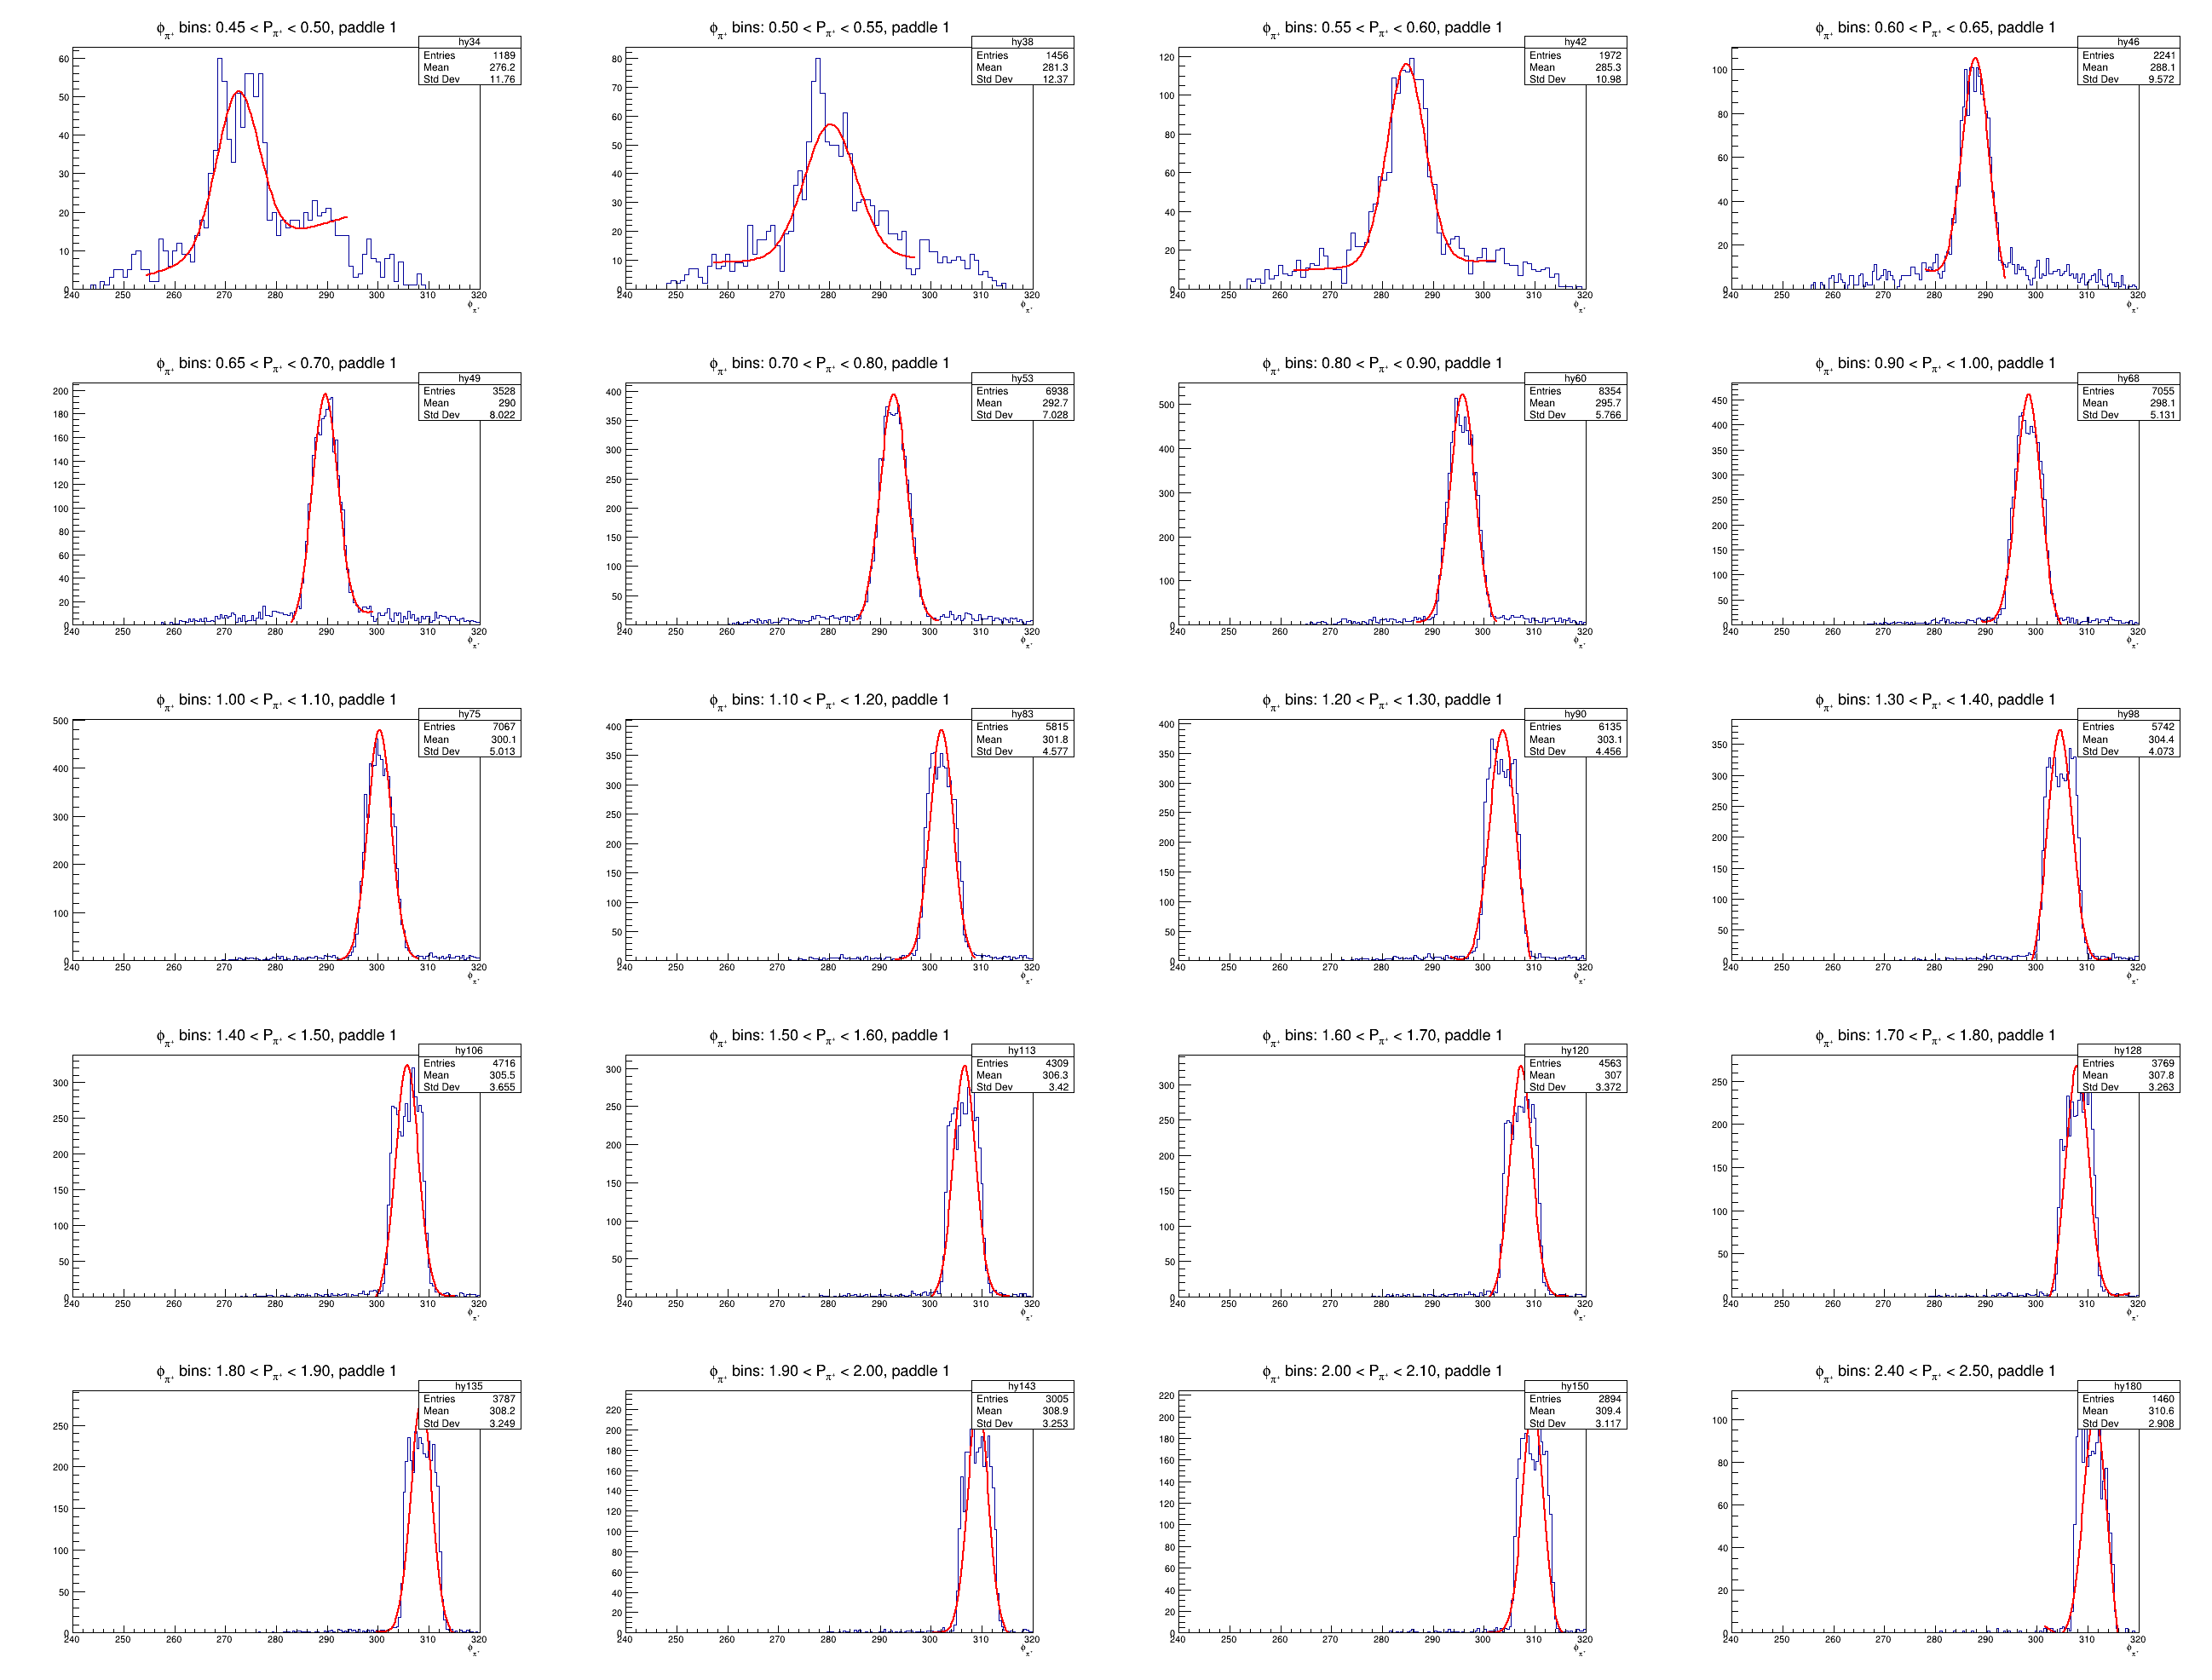

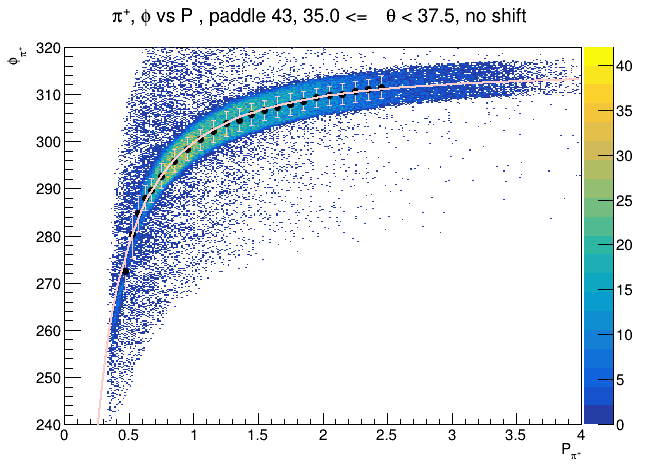

In [19]:
xlims = np.concatenate((np.arange(0.45,0.7, 0.05), np.arange(0.7, 2.6, 0.1)))
exec(code_listA[0])
exec(code_listB[0])

5
27


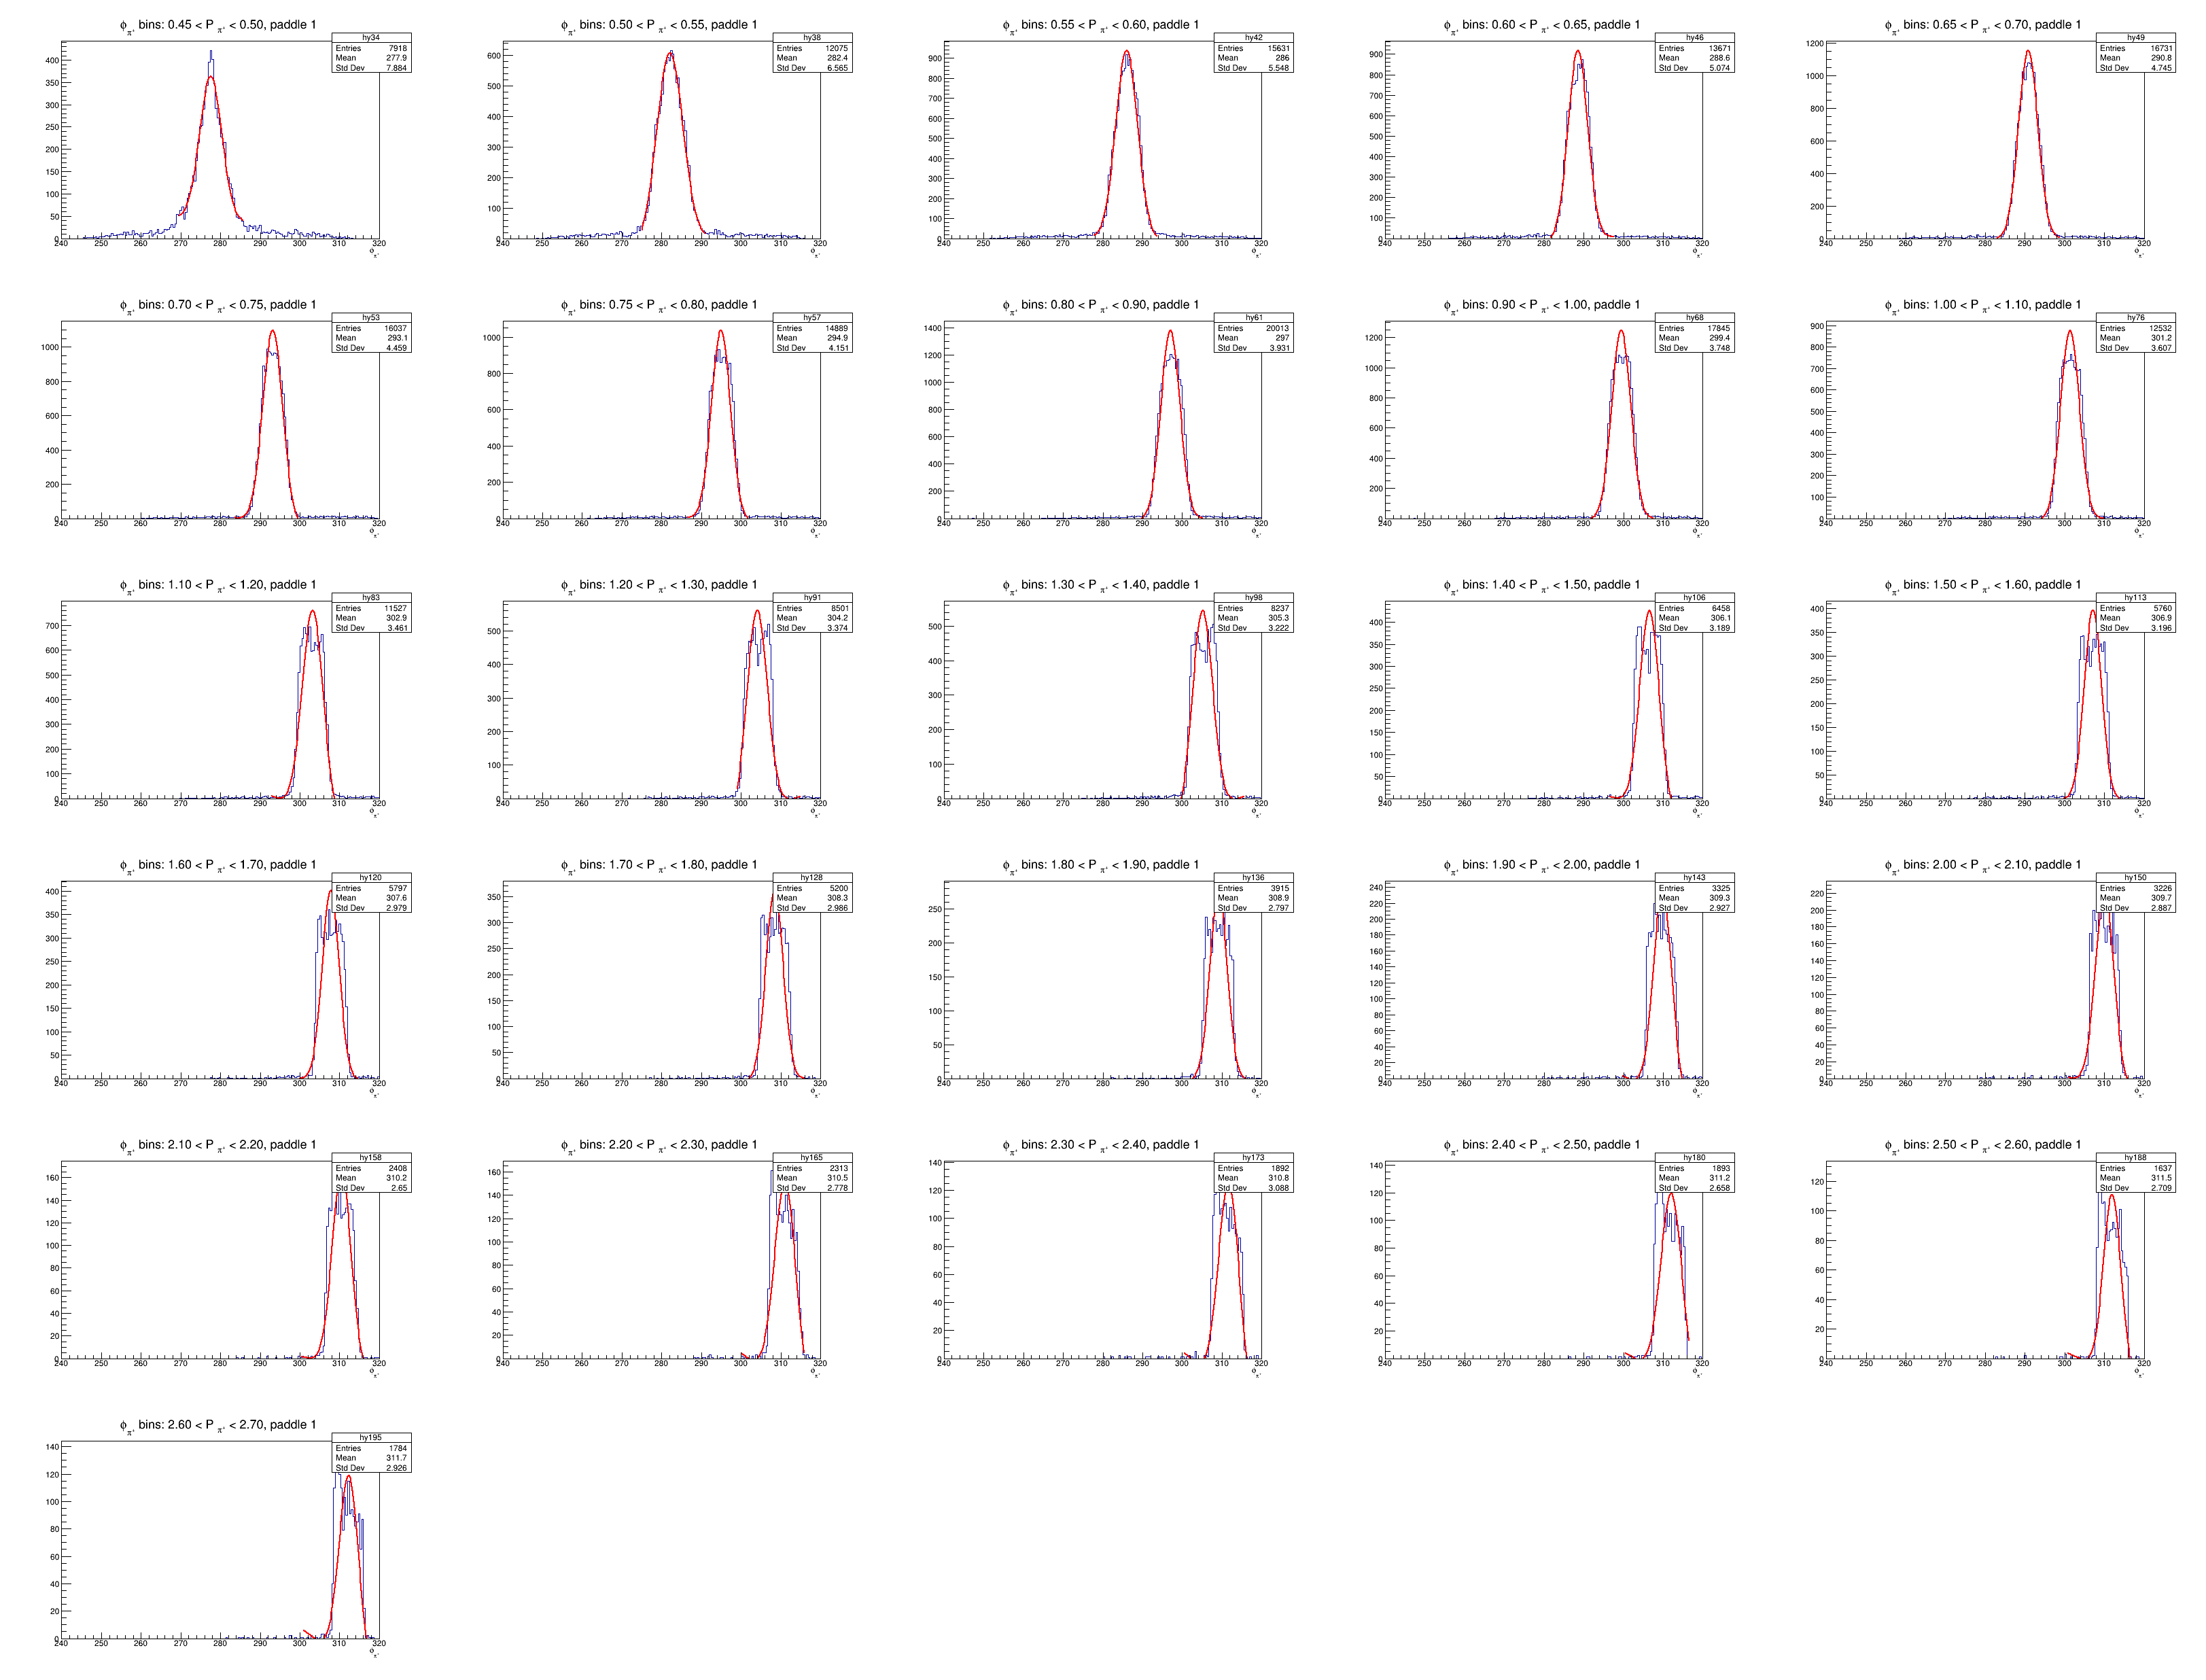

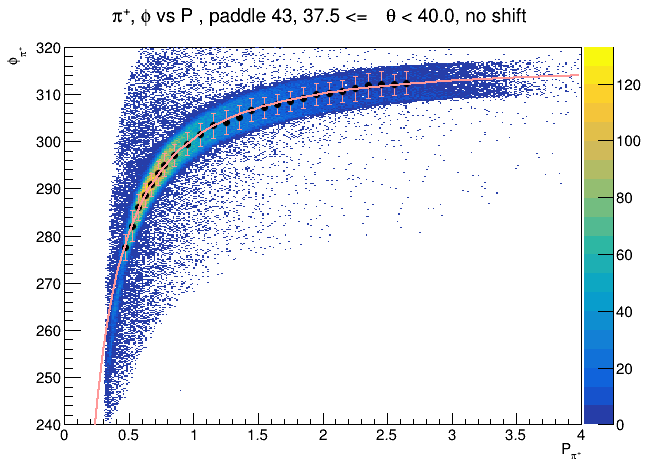

In [22]:
xlims = np.concatenate((np.arange(0.45, 0.8, 0.05), np.arange(0.8, 2.8, 0.1)))
exec(code_listA[1])
exec(code_listB[1])

4
18


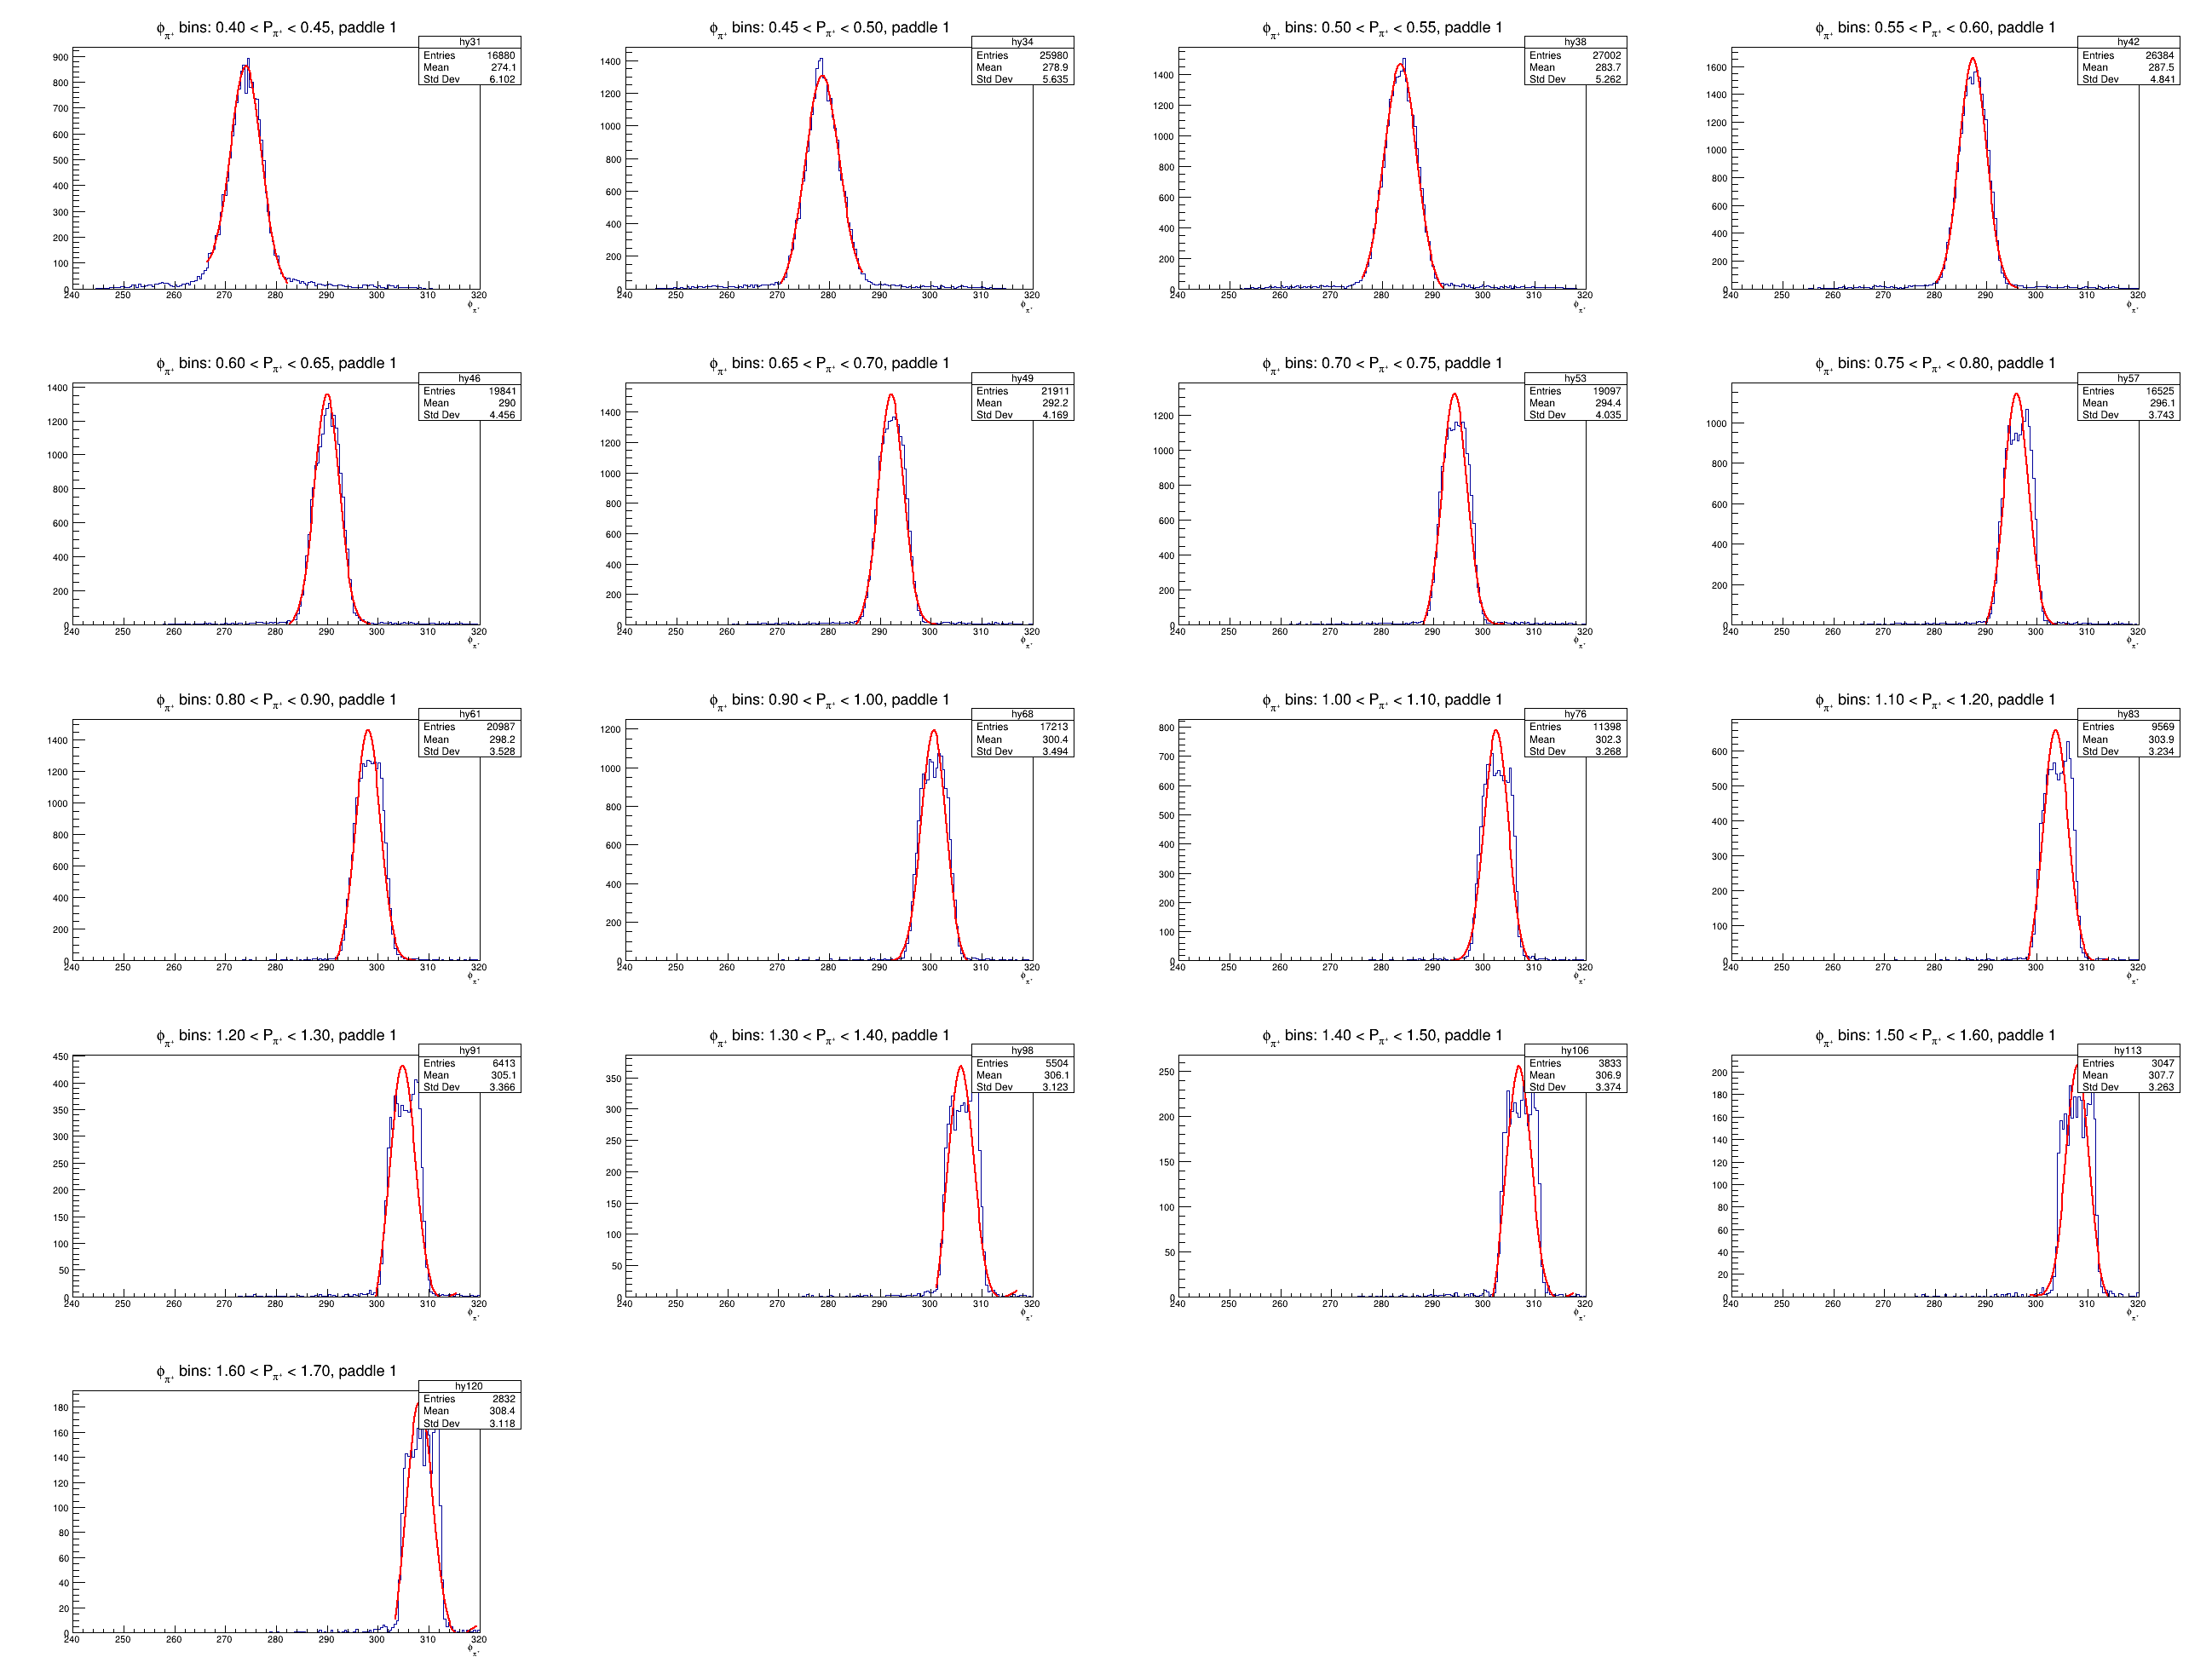

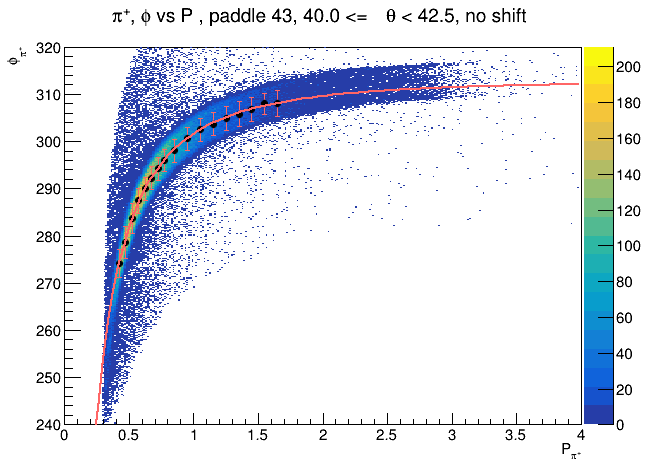

In [24]:
xlims = np.concatenate((np.arange(0.4, 0.8, 0.05), np.arange(0.8, 1.8, 0.1)))
exec(code_listA[2])
exec(code_listB[2])

4
18


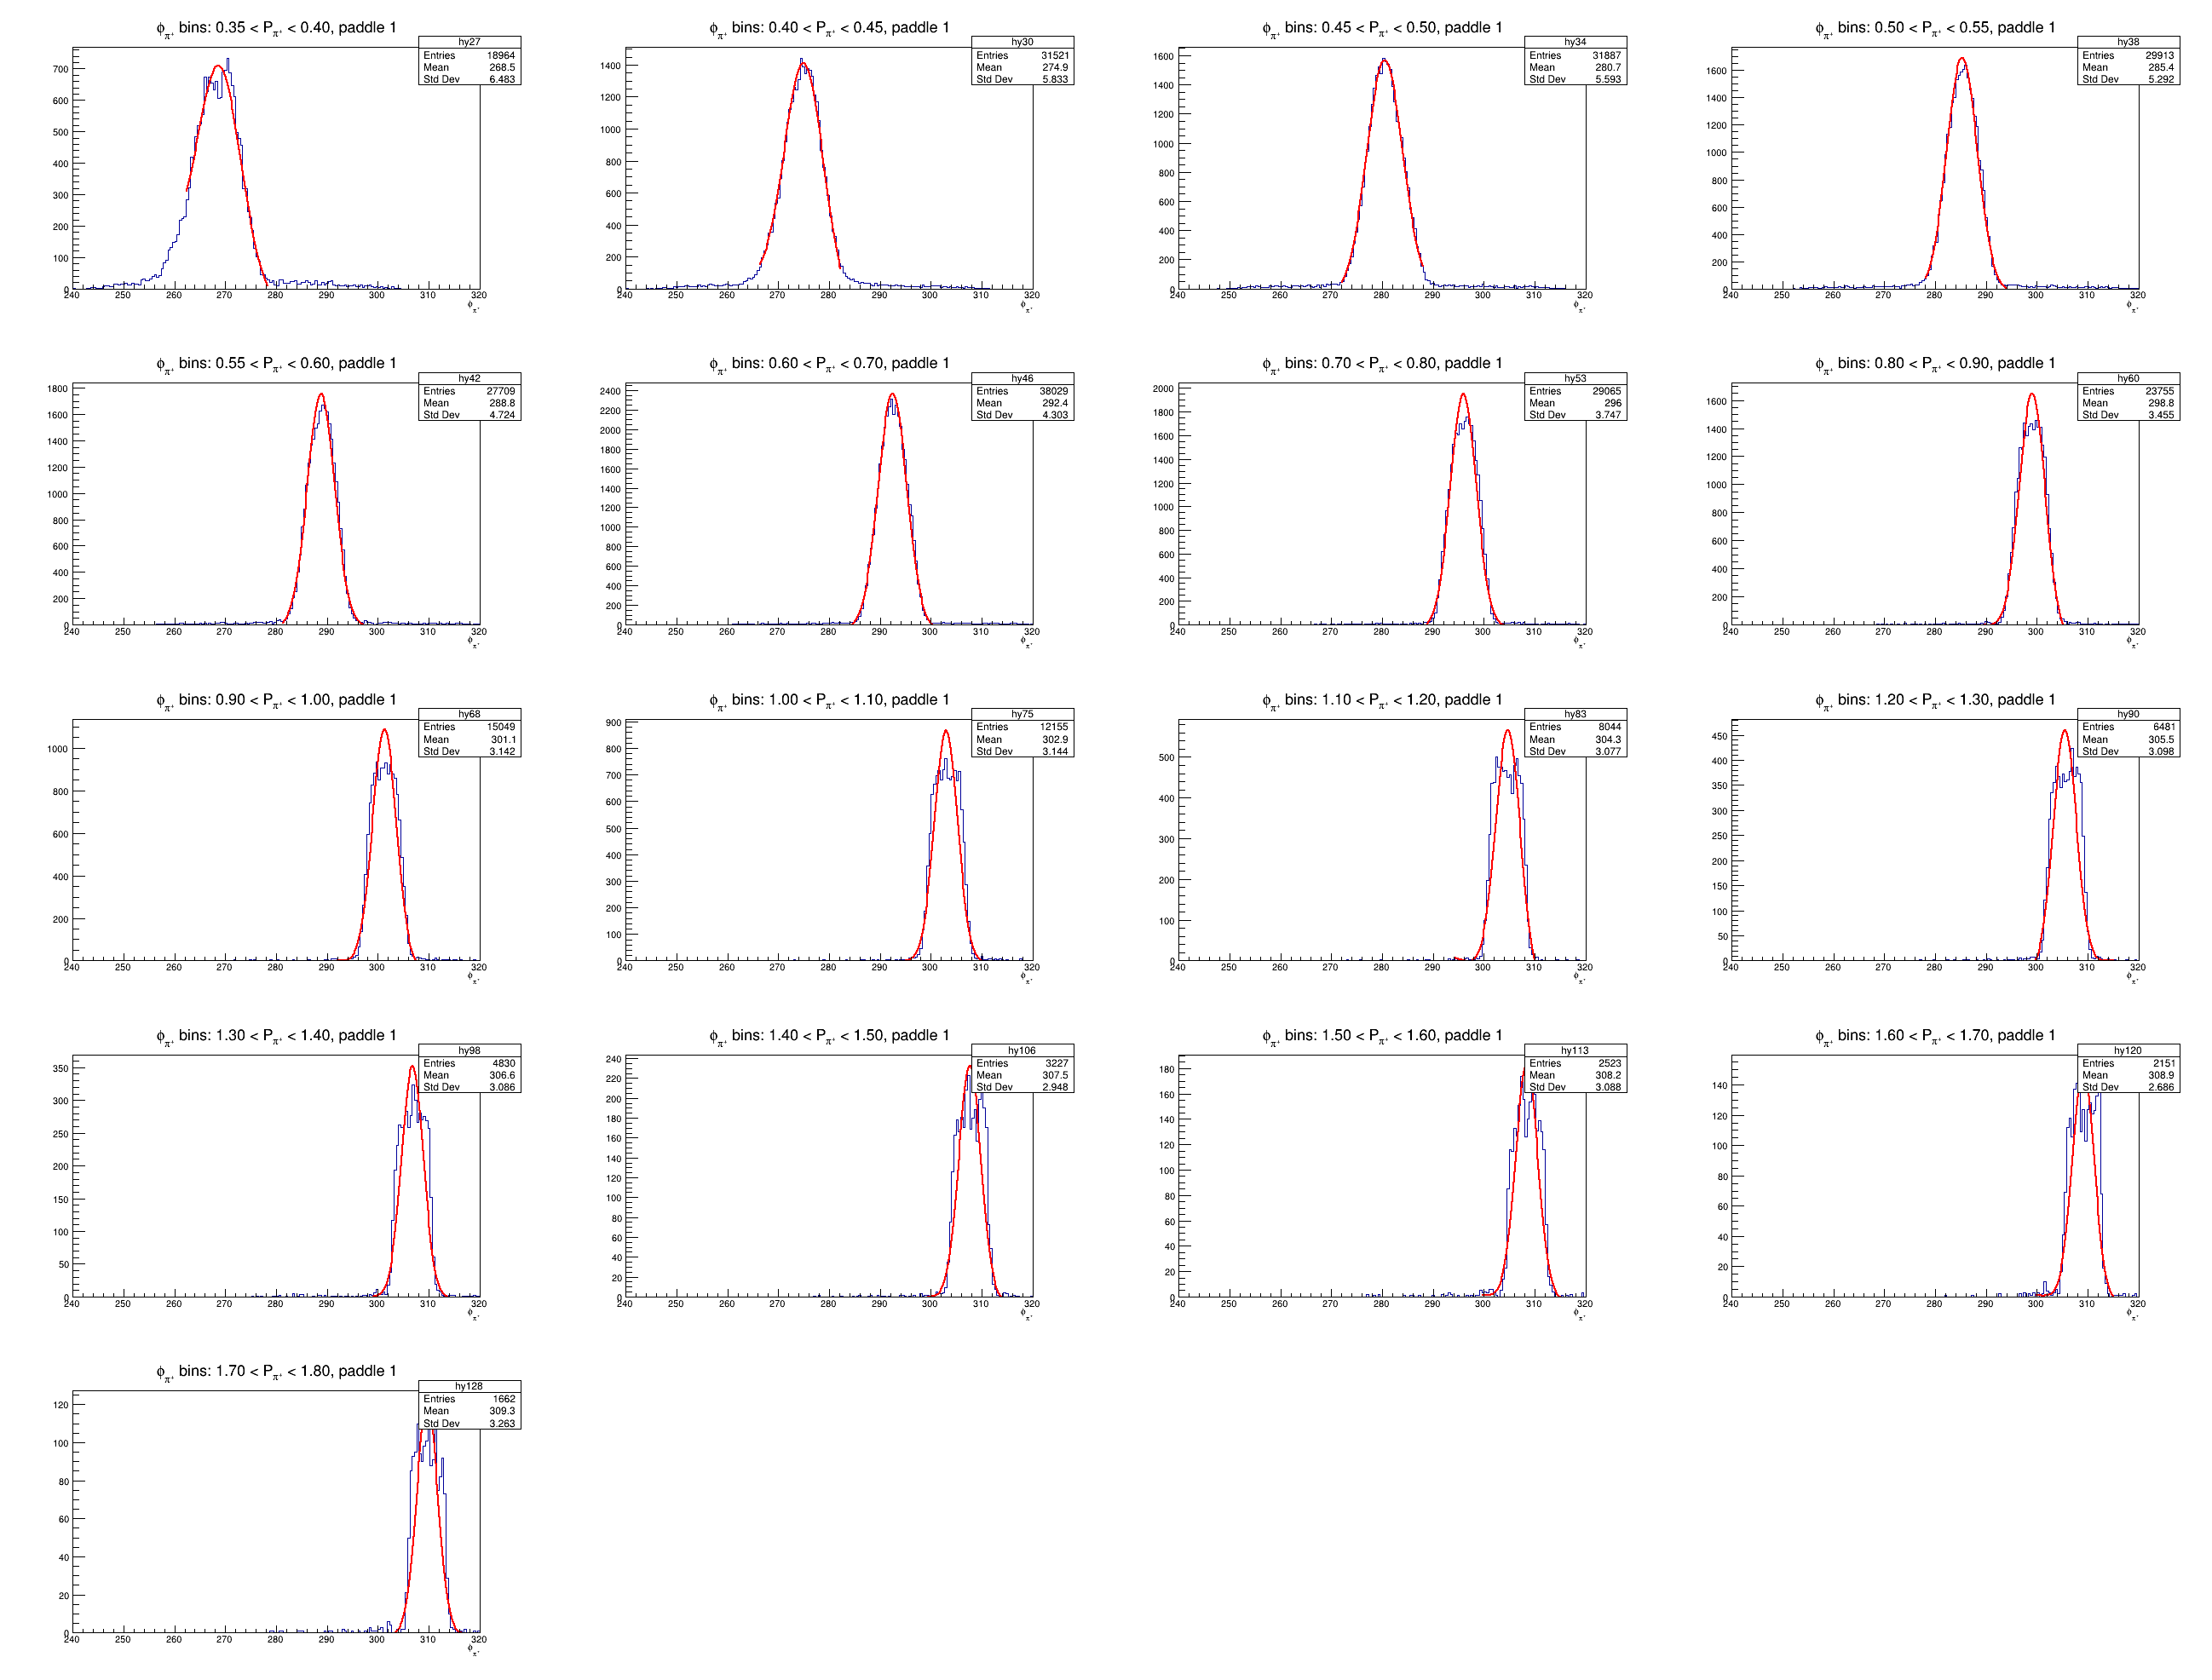

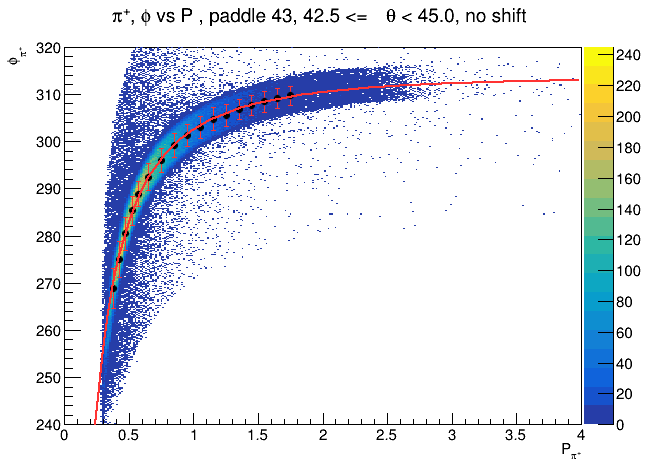

In [26]:
xlims = np.concatenate((np.arange(0.35, 0.6, 0.05), np.arange(0.6, 1.8, 0.1)))
exec(code_listA[3])
exec(code_listB[3])

3
15


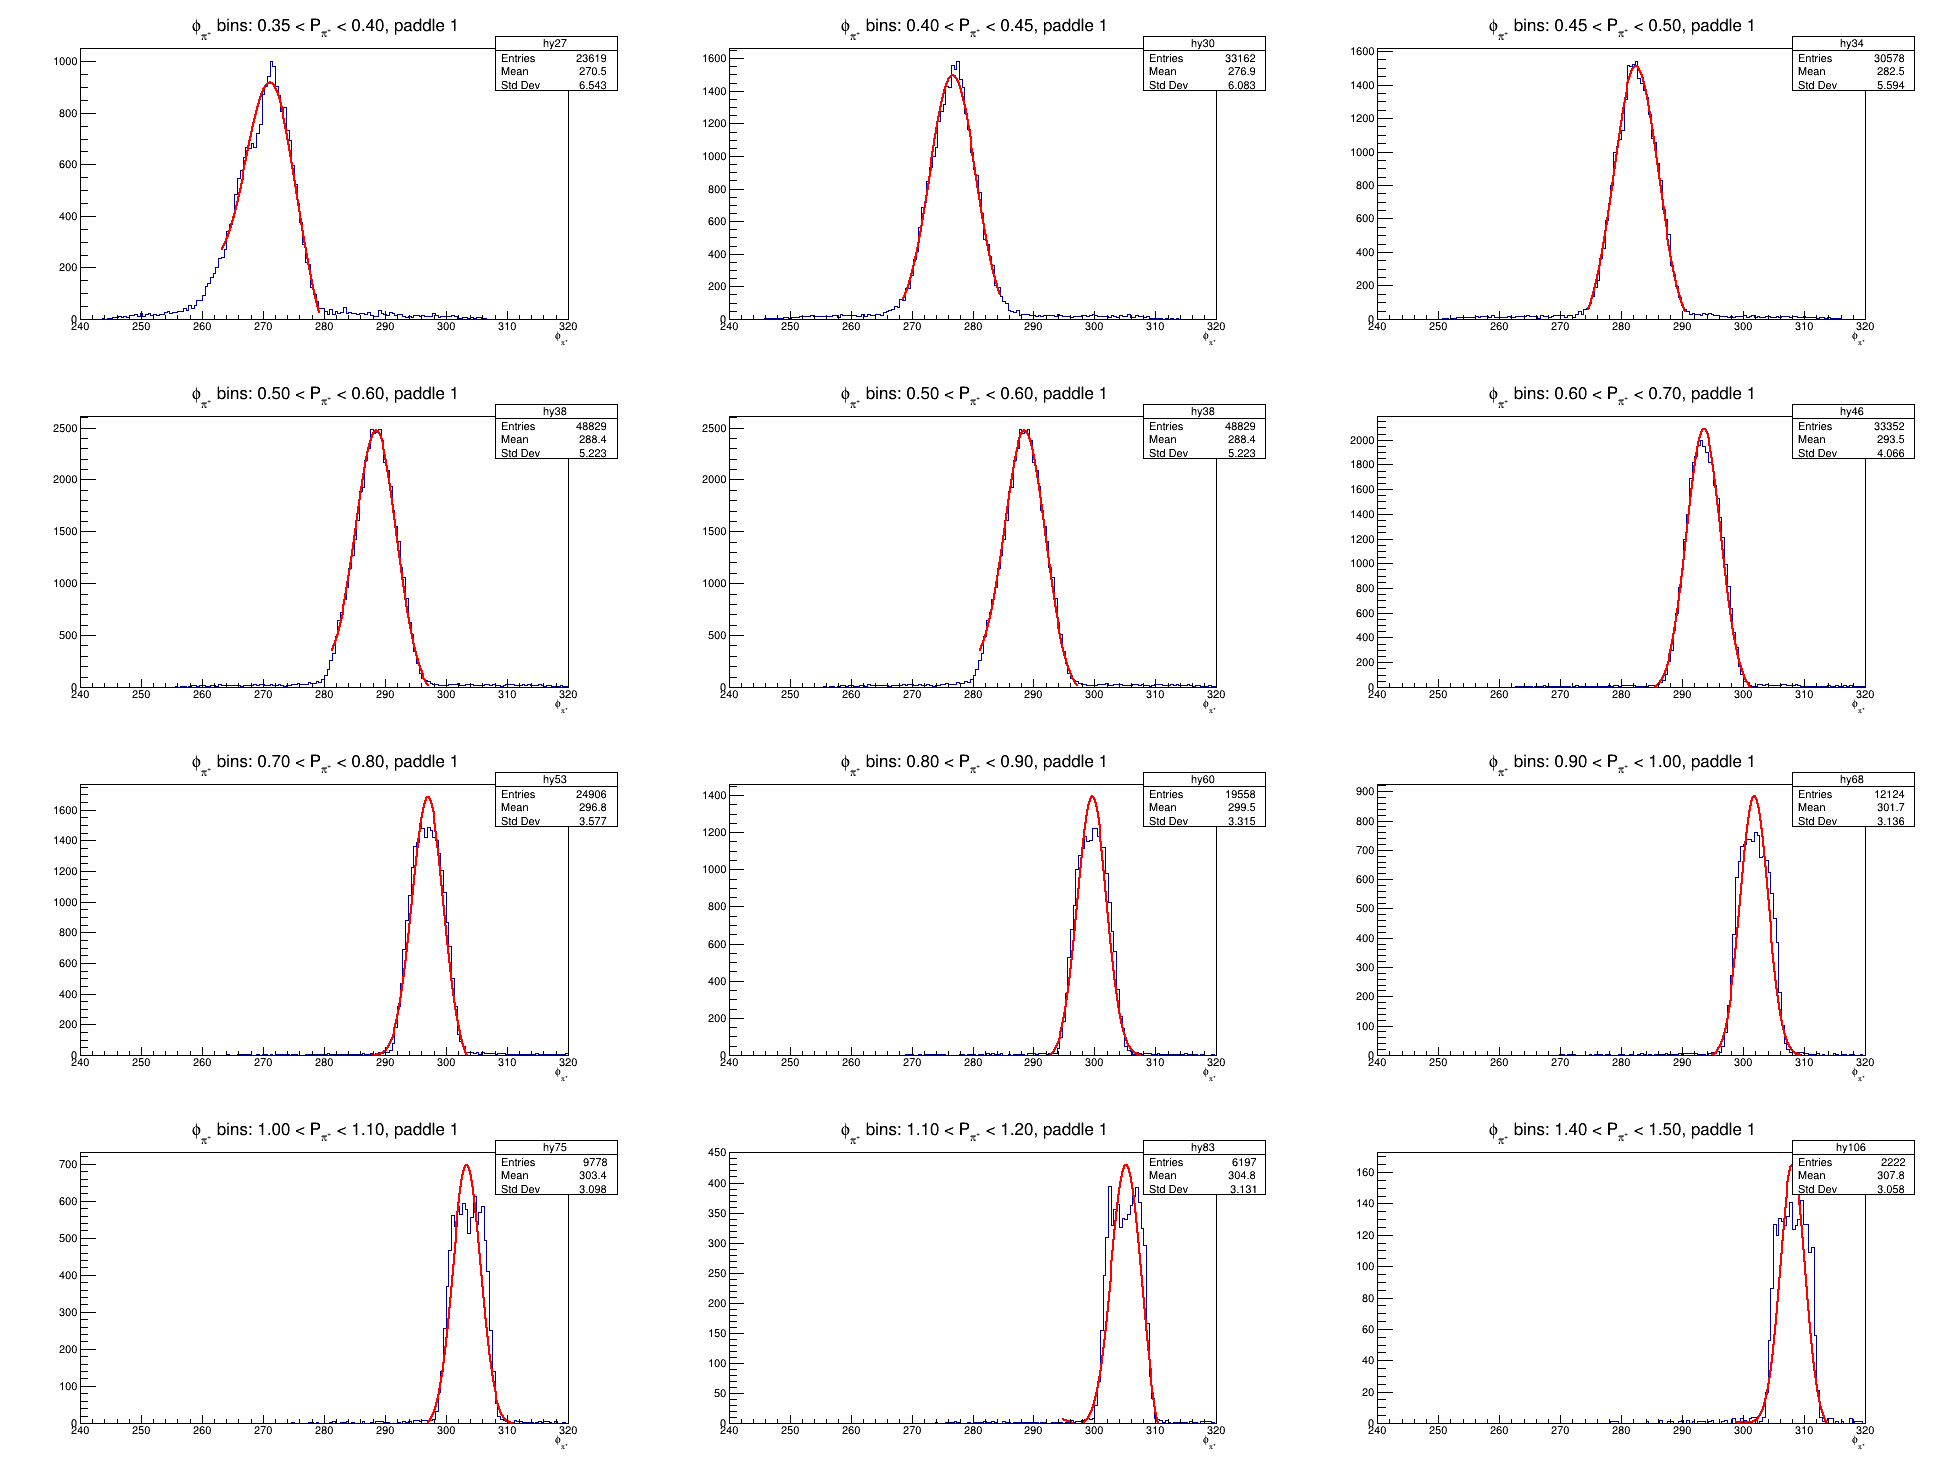

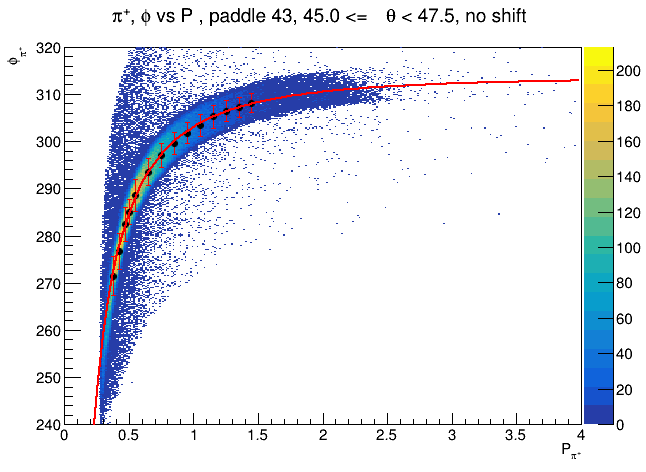

In [28]:
xlims = np.concatenate((np.arange(0.35, 0.5, 0.05), np.arange(0.5, 1.6, 0.1)))
exec(code_listA[4])
exec(code_listB[4])

4
18


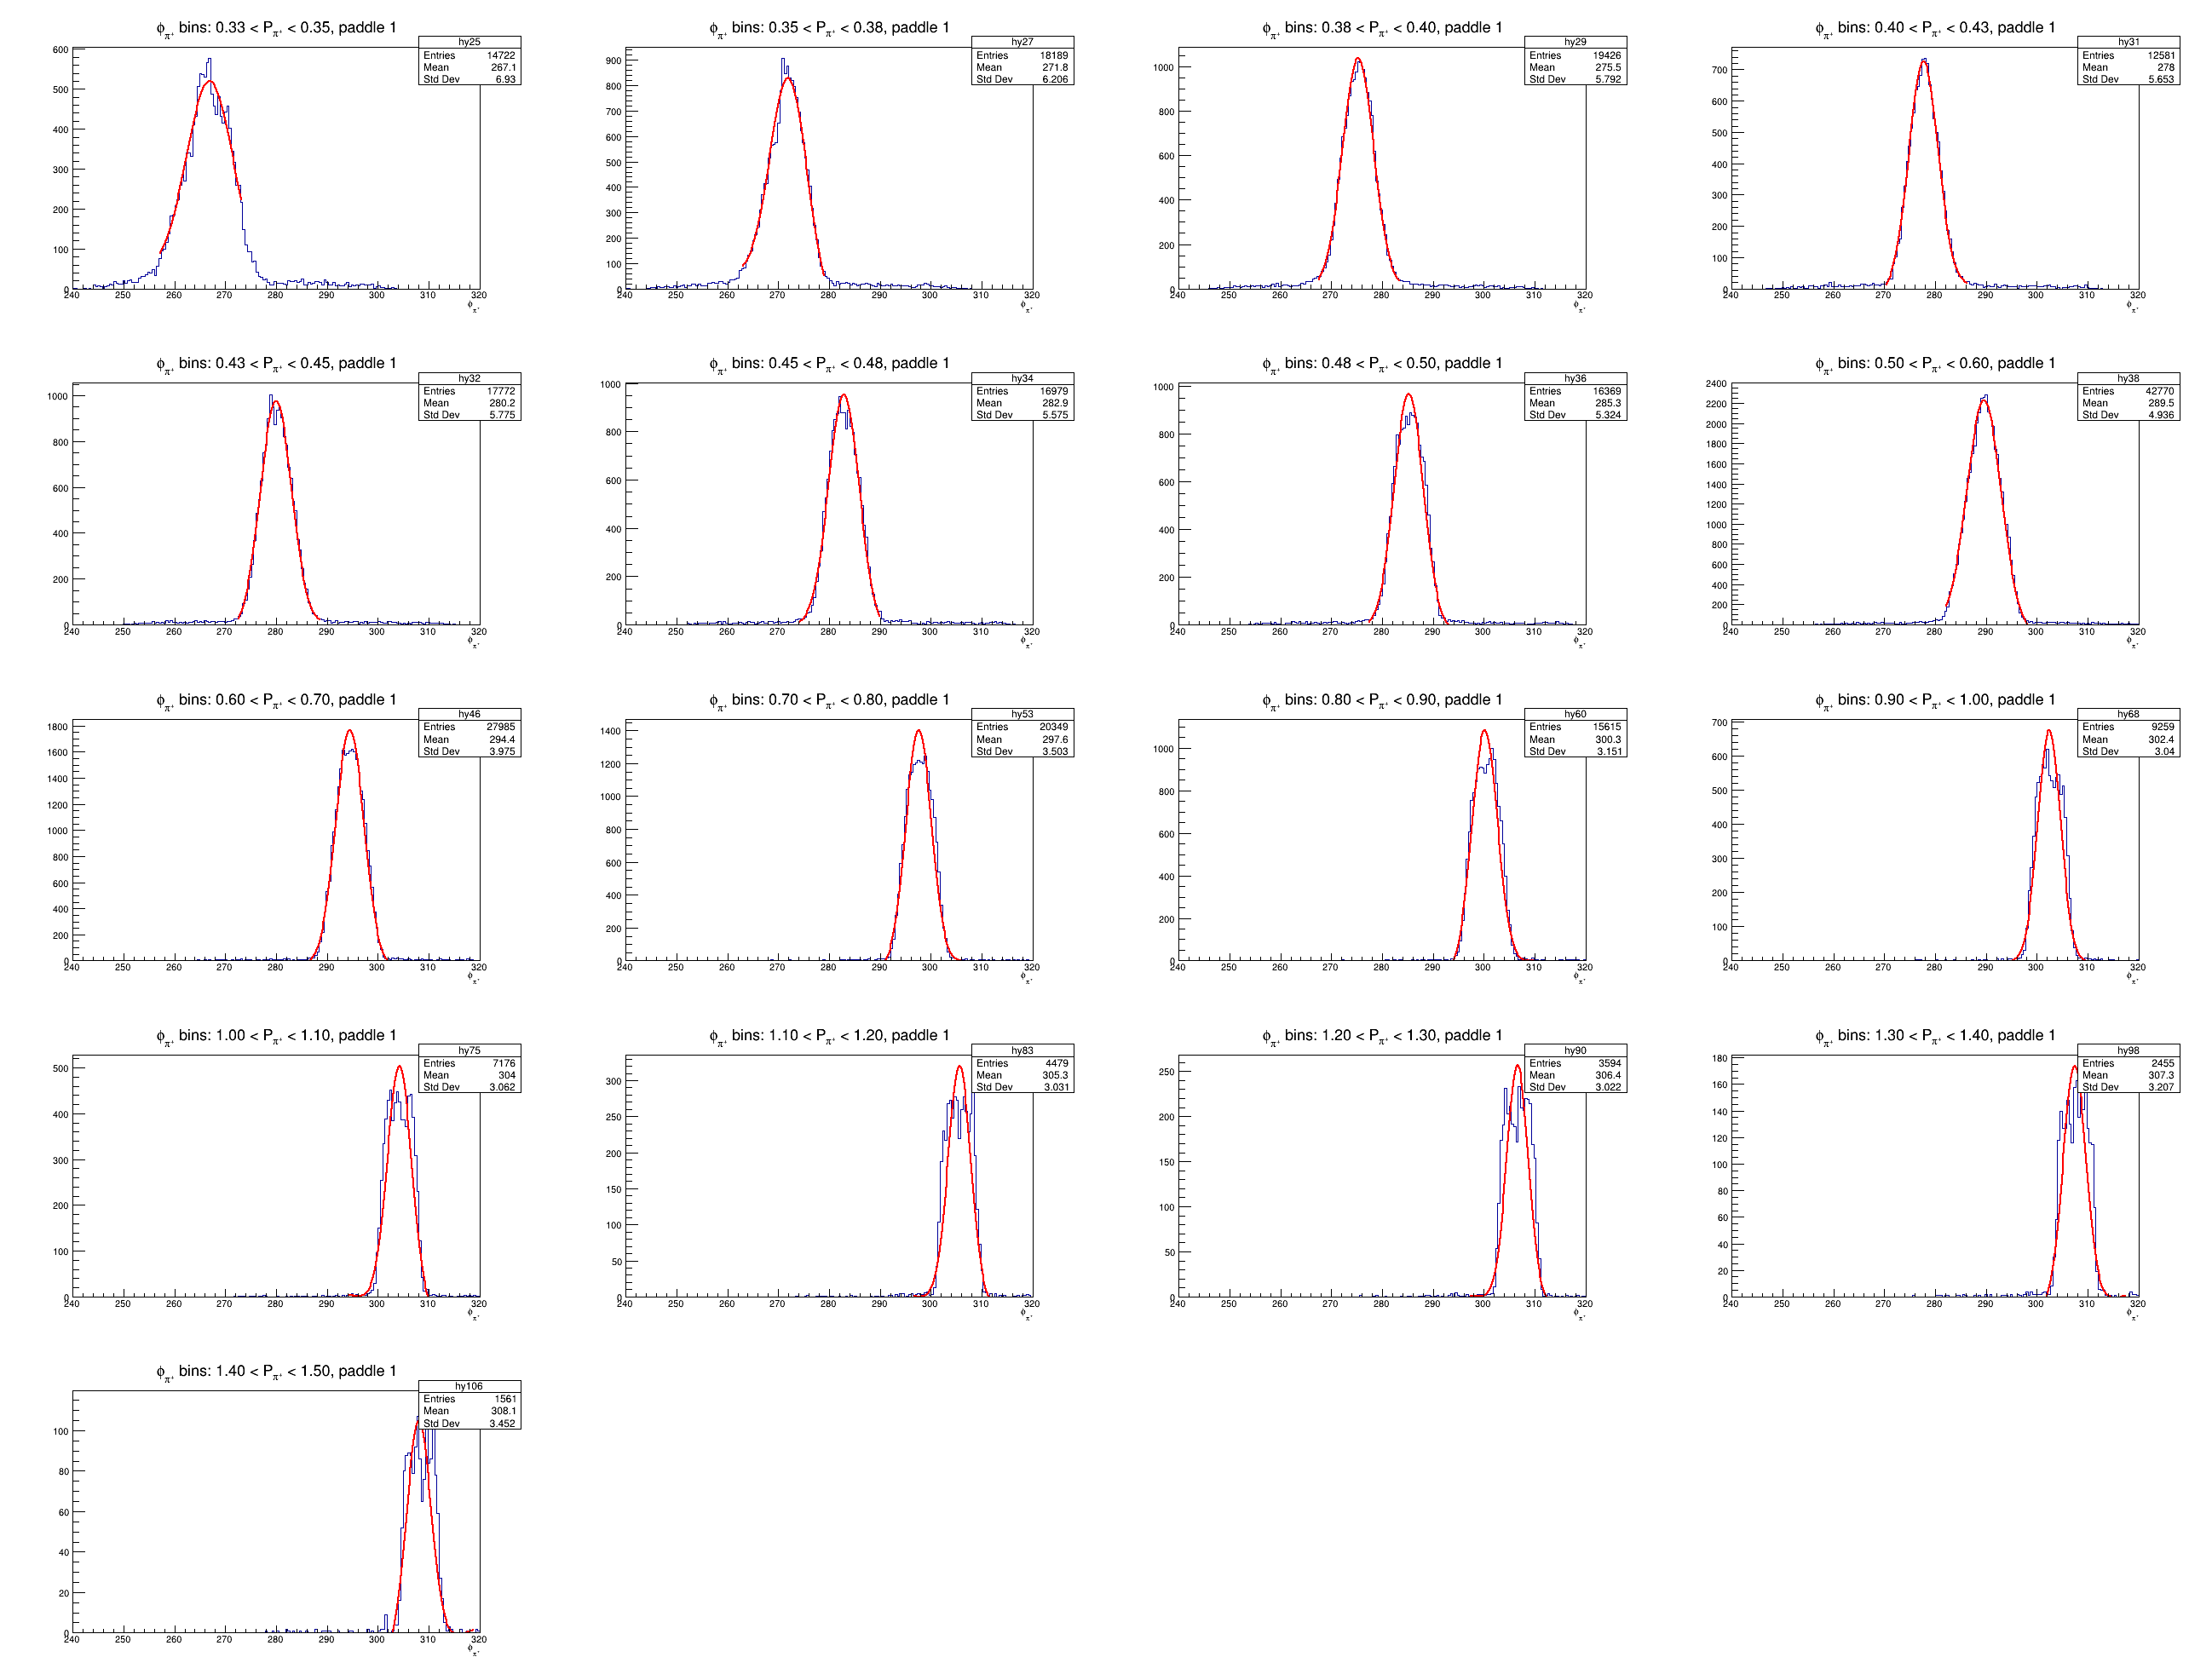

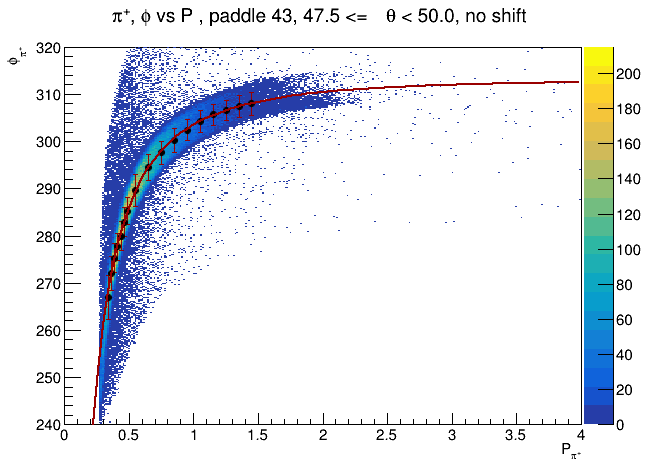

In [29]:
xlims = np.concatenate((np.arange(0.325, 0.5, 0.025), np.arange(0.5, 1.6, 0.1)))
exec(code_listA[5])
exec(code_listB[5])

4
20


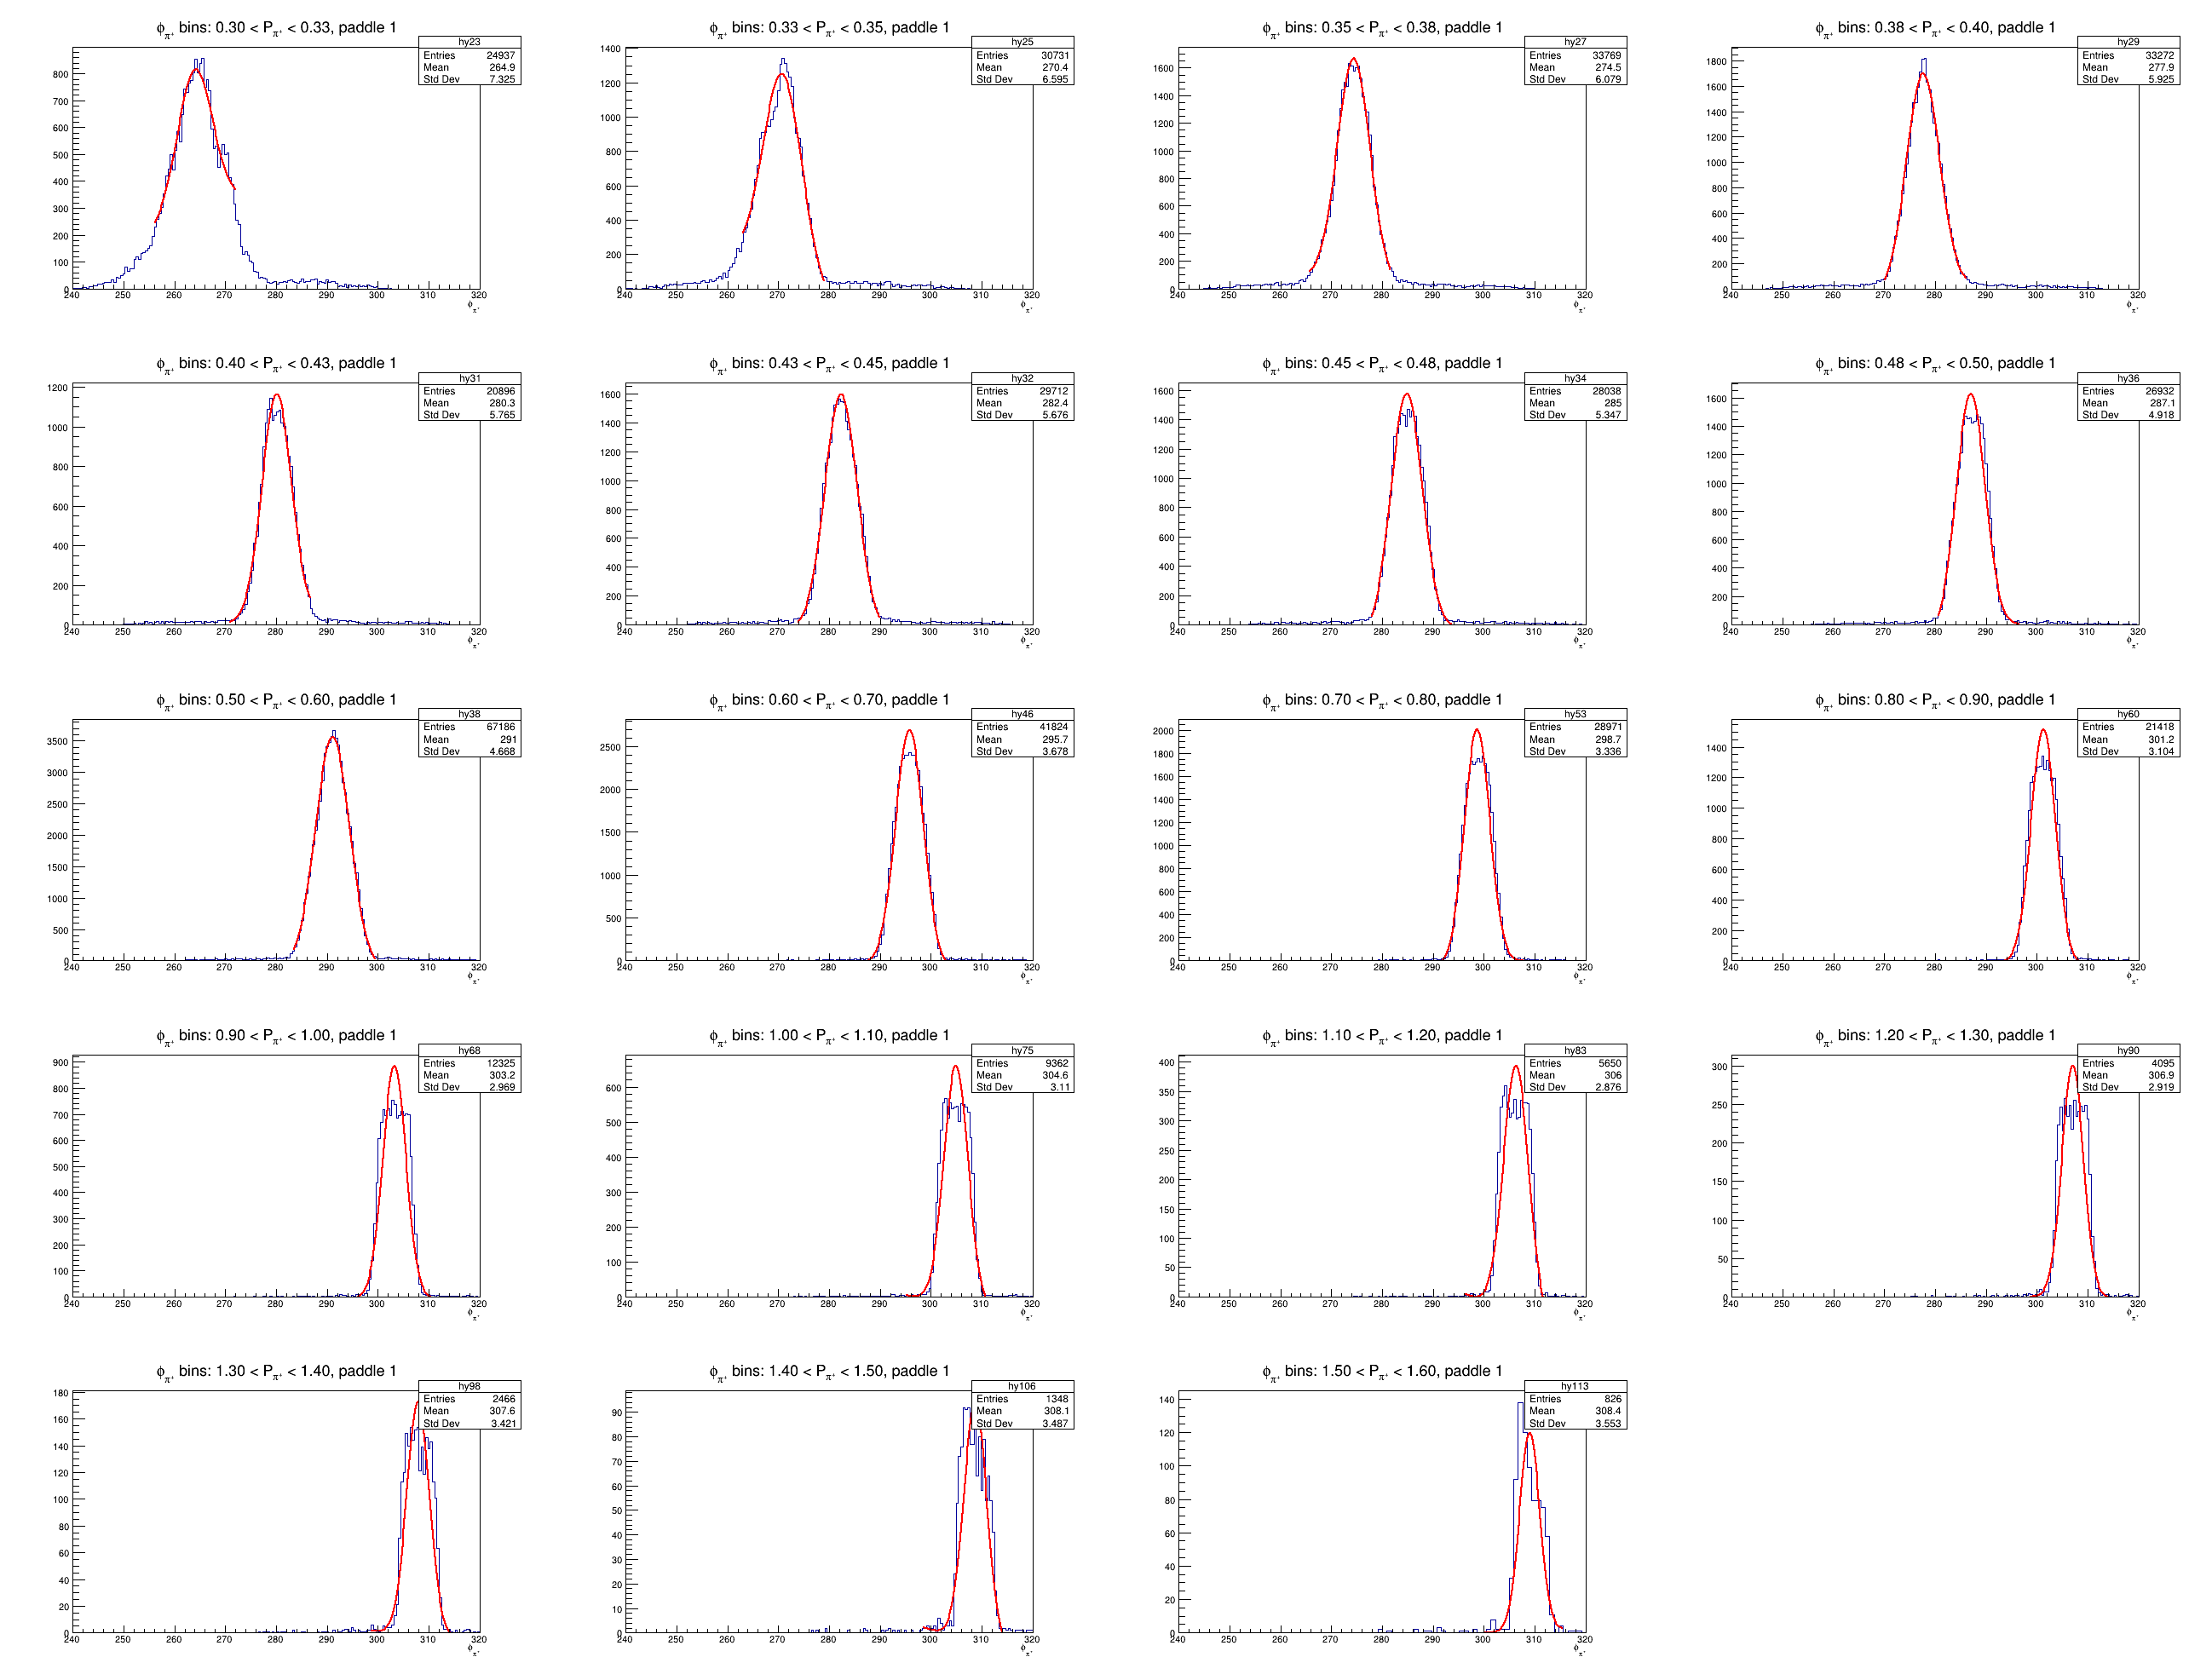

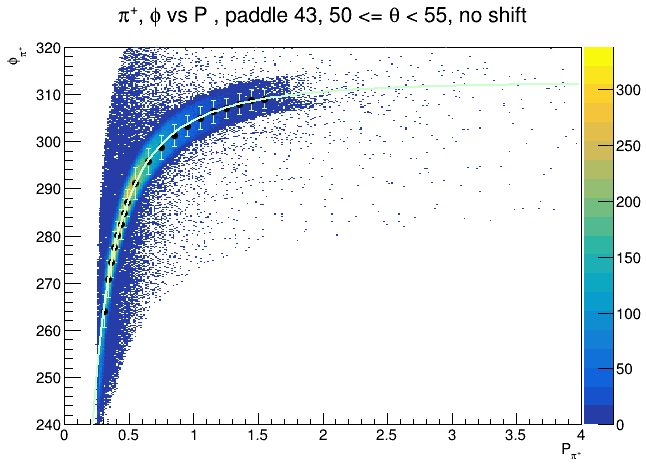

In [30]:
xlims = np.concatenate((np.arange(0.3, 0.5, 0.025), np.arange(0.5, 1.7, 0.1)))
exec(code_listA[6])
exec(code_listB[6])

4
17


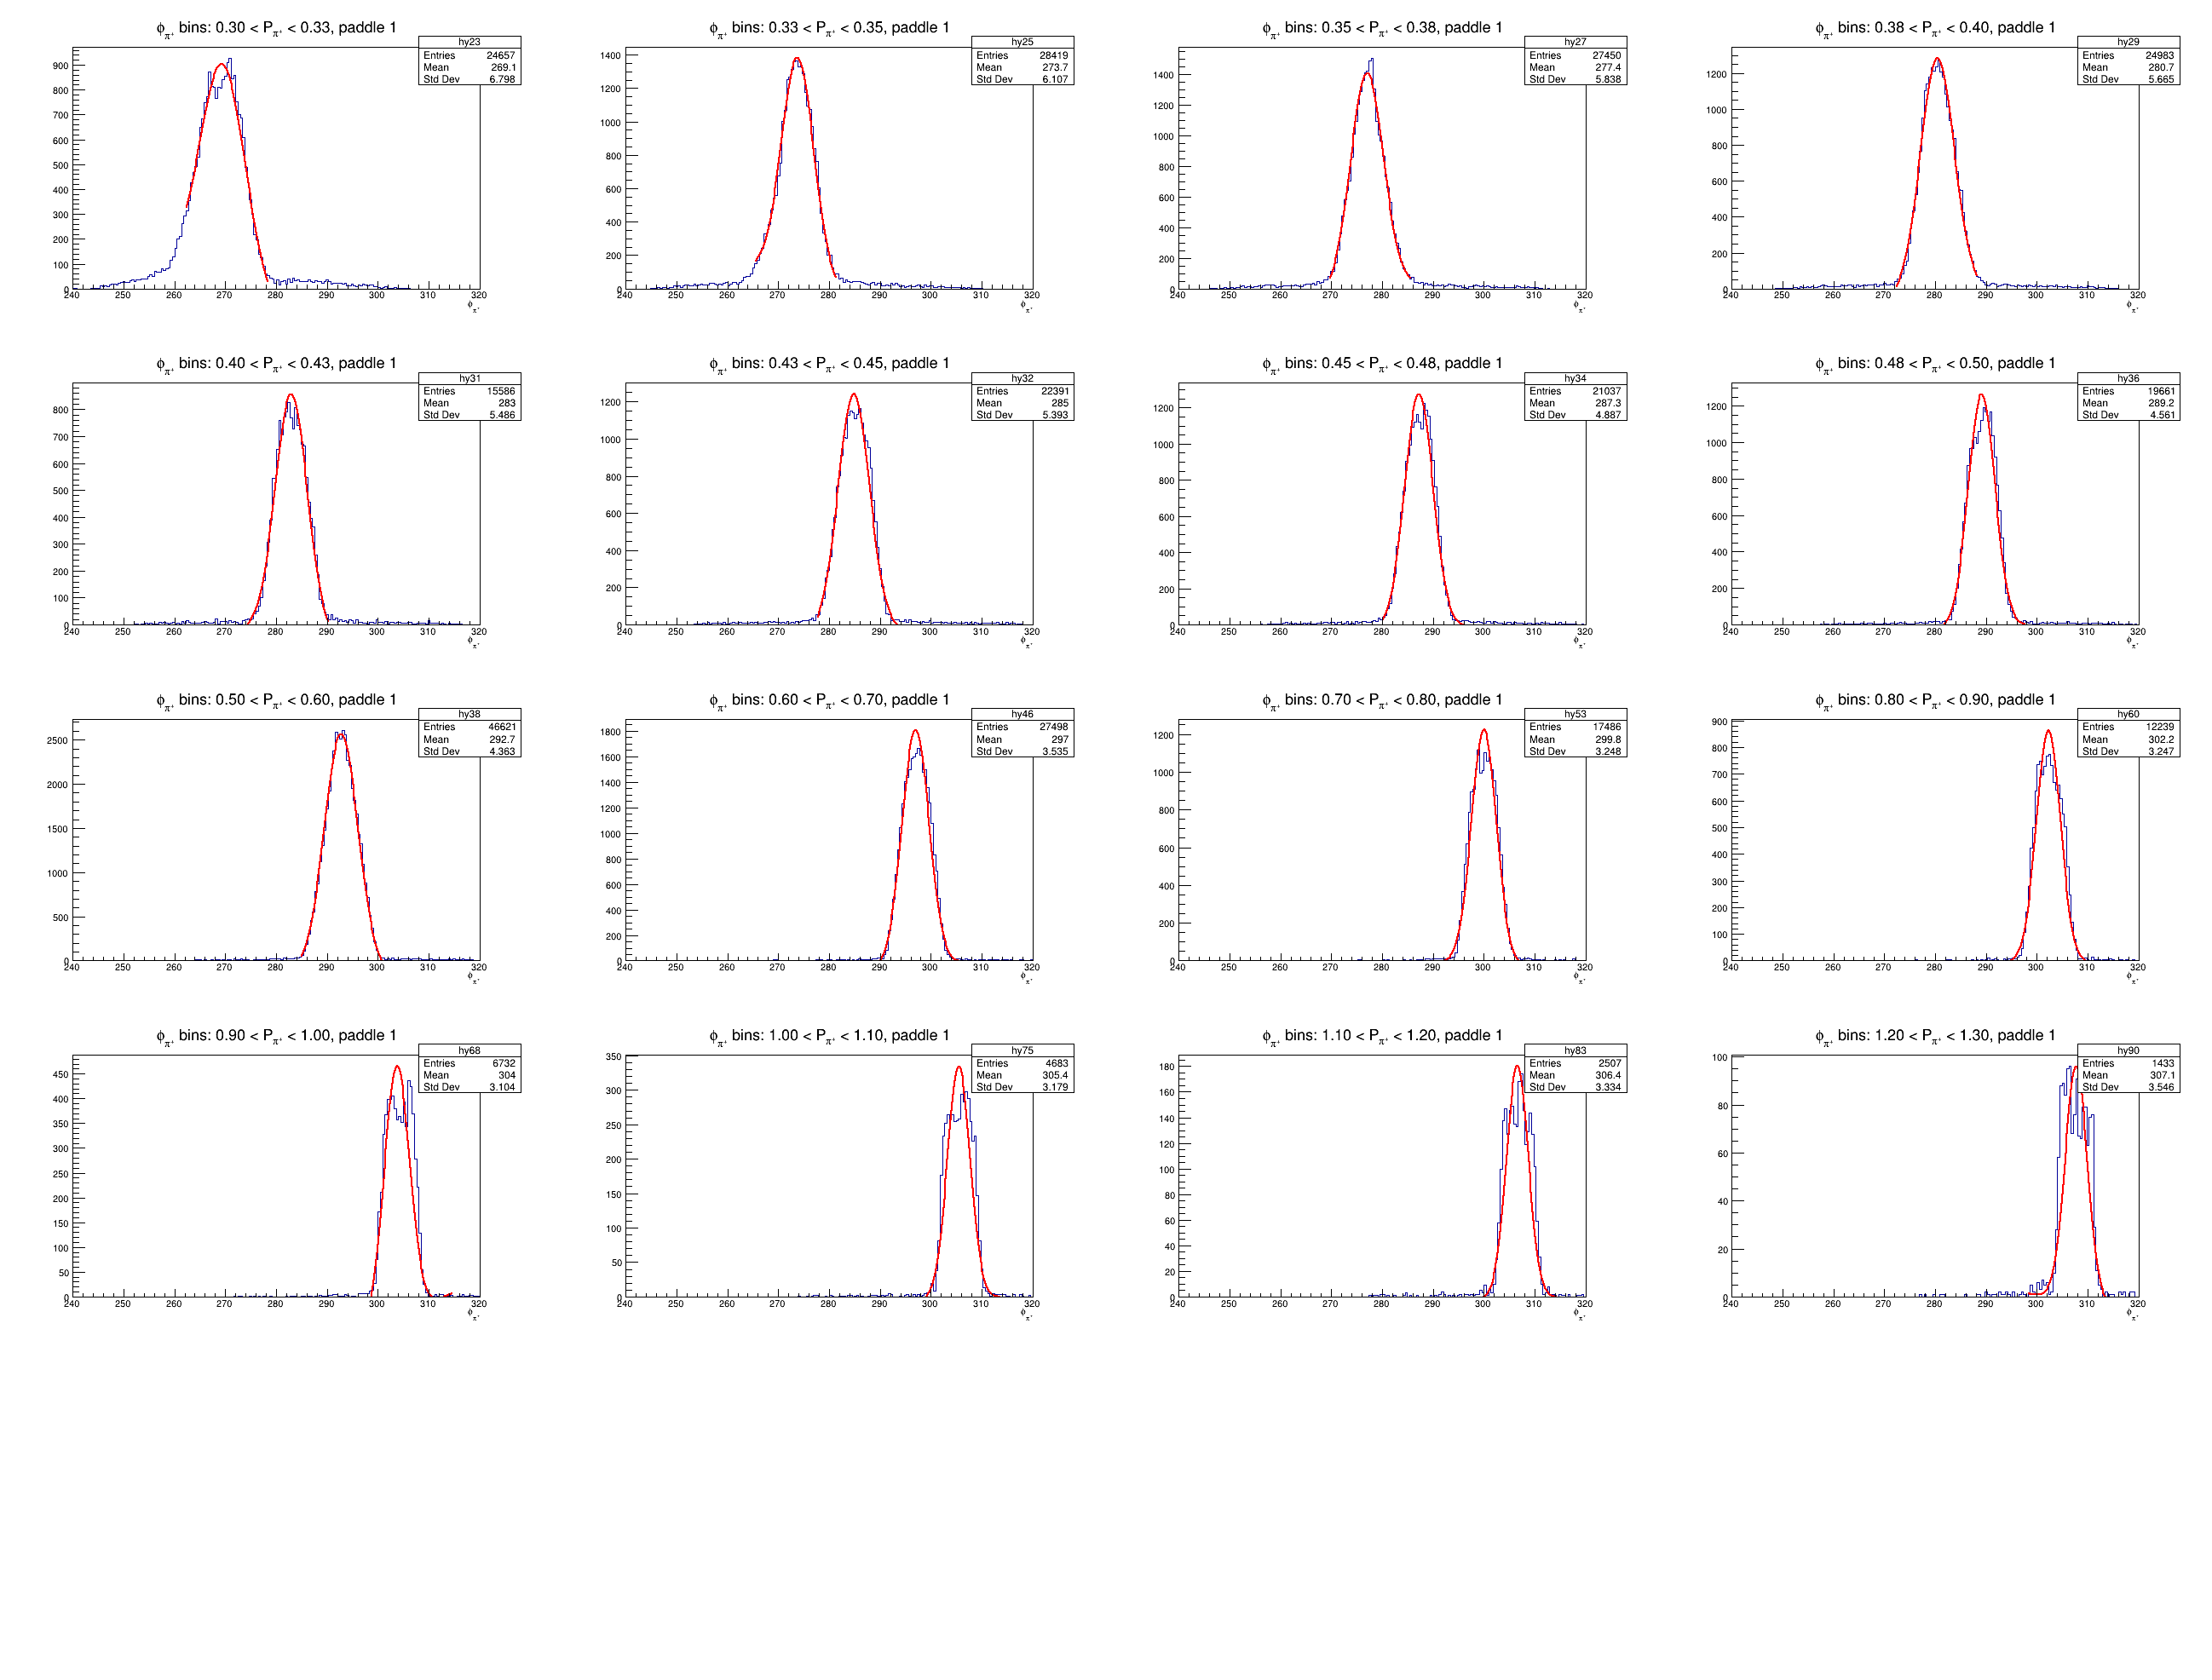

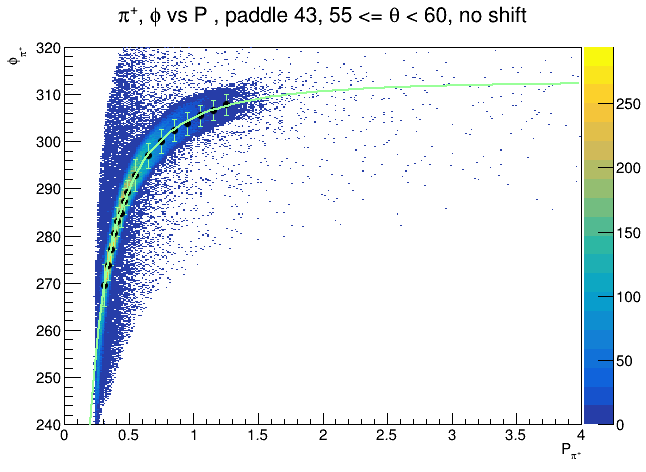

In [31]:
xlims = np.concatenate((np.arange(0.3, 0.5, 0.025), np.arange(0.5, 1.4, 0.1)))
exec(code_listA[7])
exec(code_listB[7])

3
13


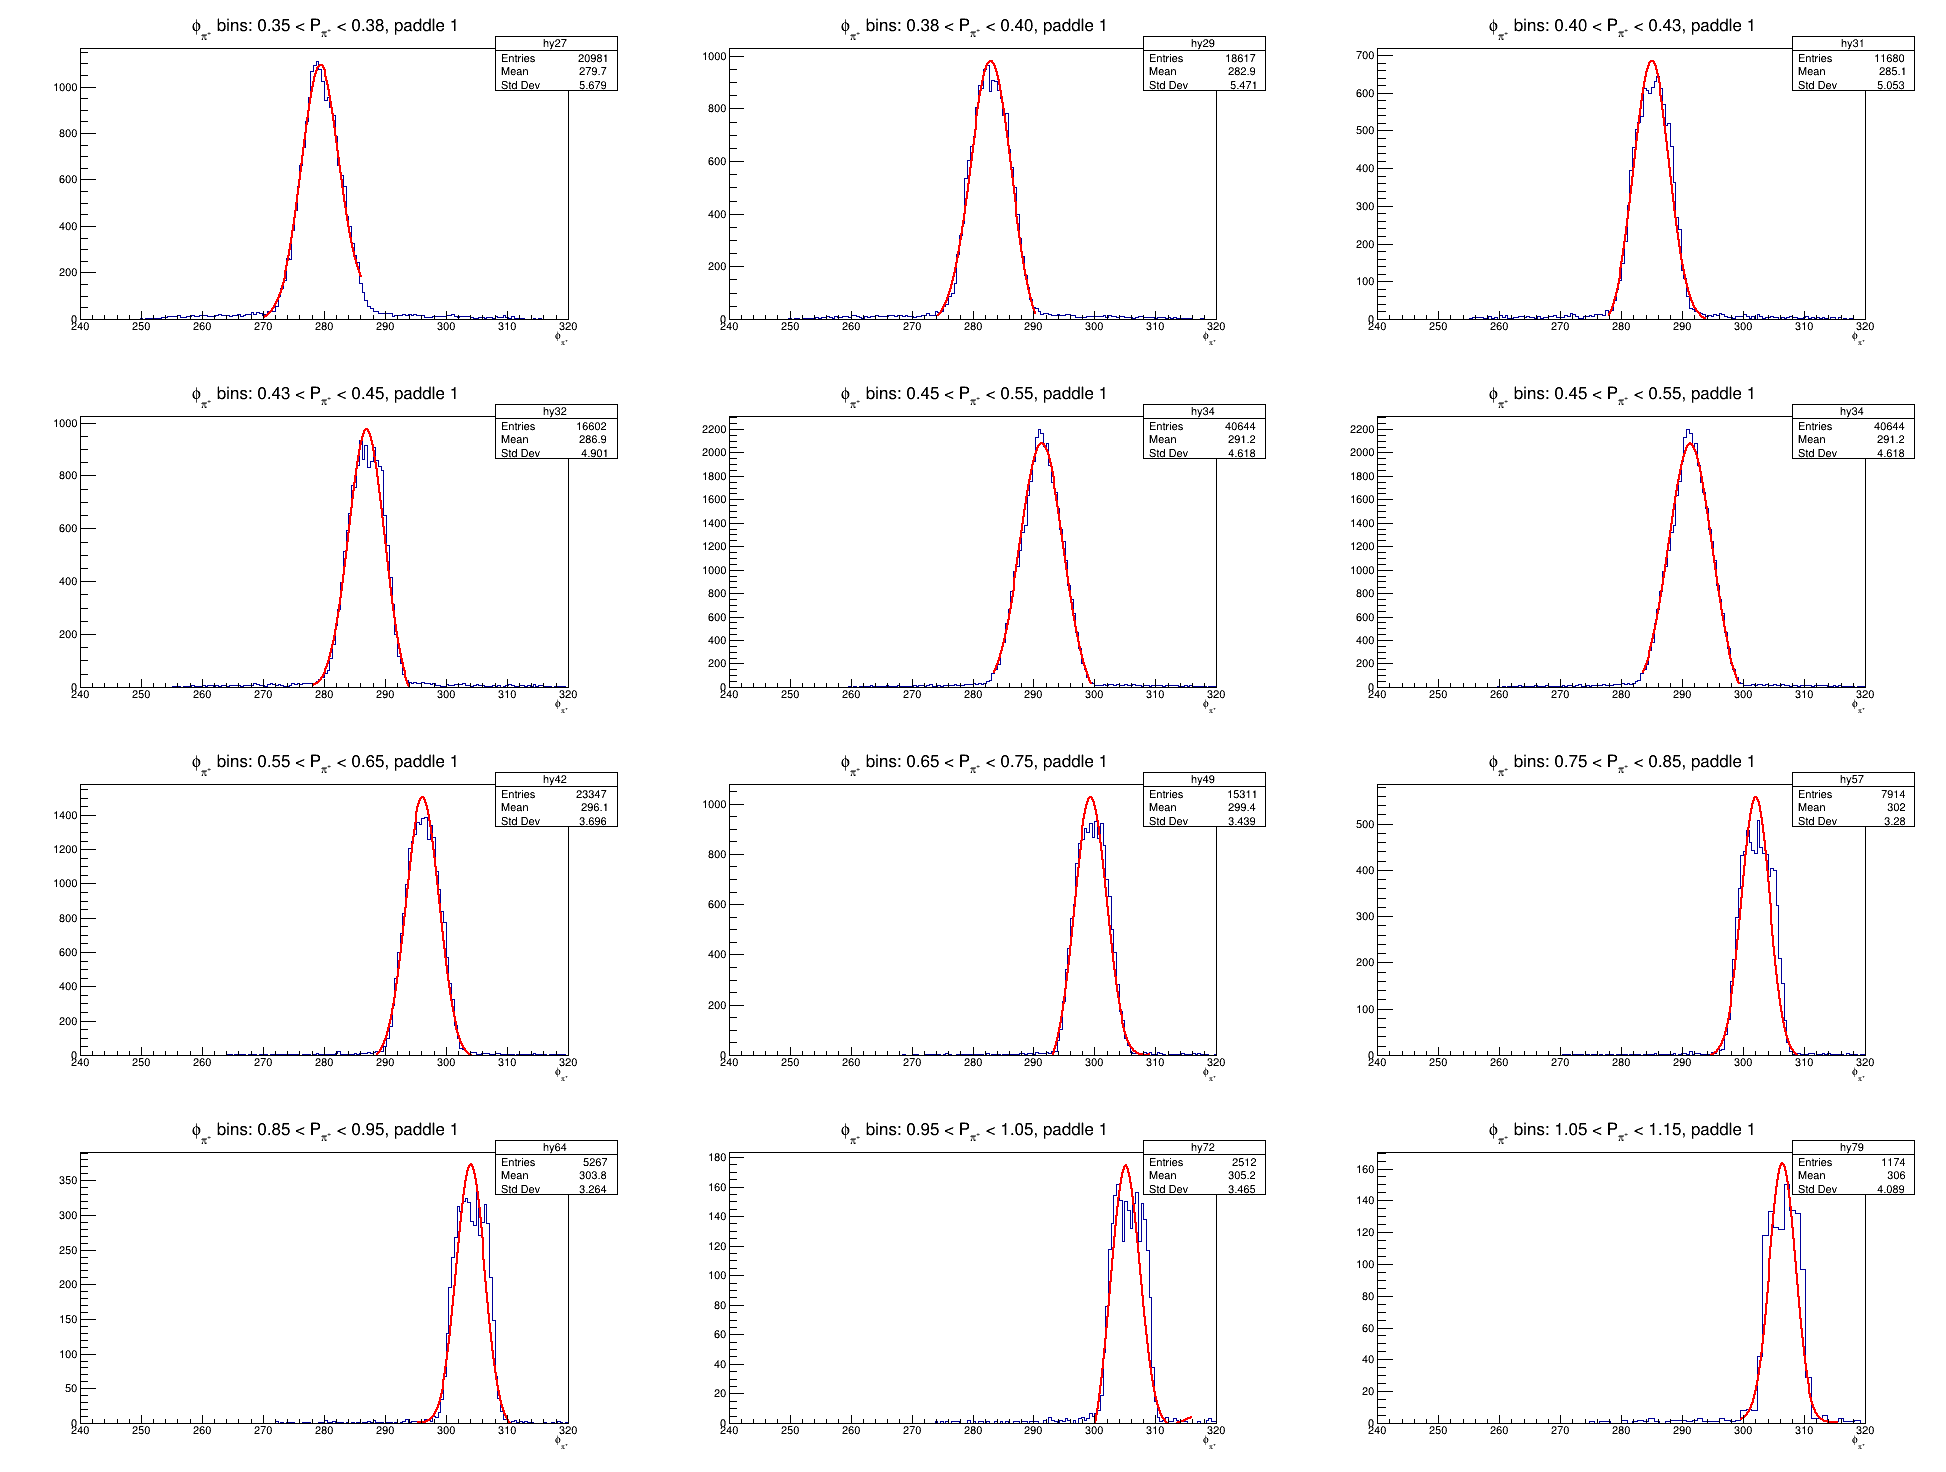

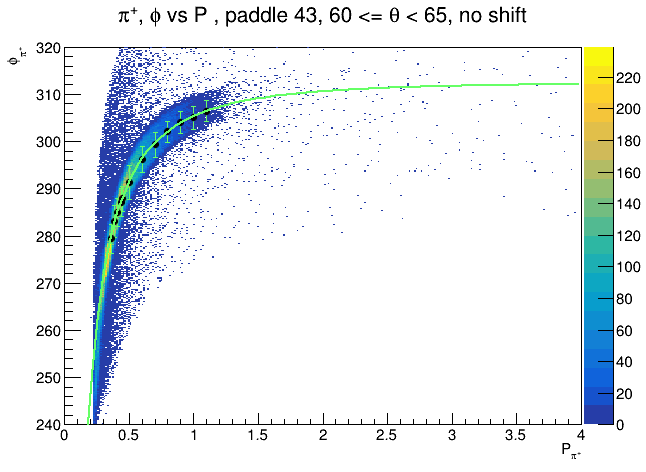

In [33]:
xlims = np.concatenate((np.arange(0.35, 0.45, 0.025), np.arange(0.45, 1.2, 0.1)))
exec(code_listA[8])
exec(code_listB[8])

3
10


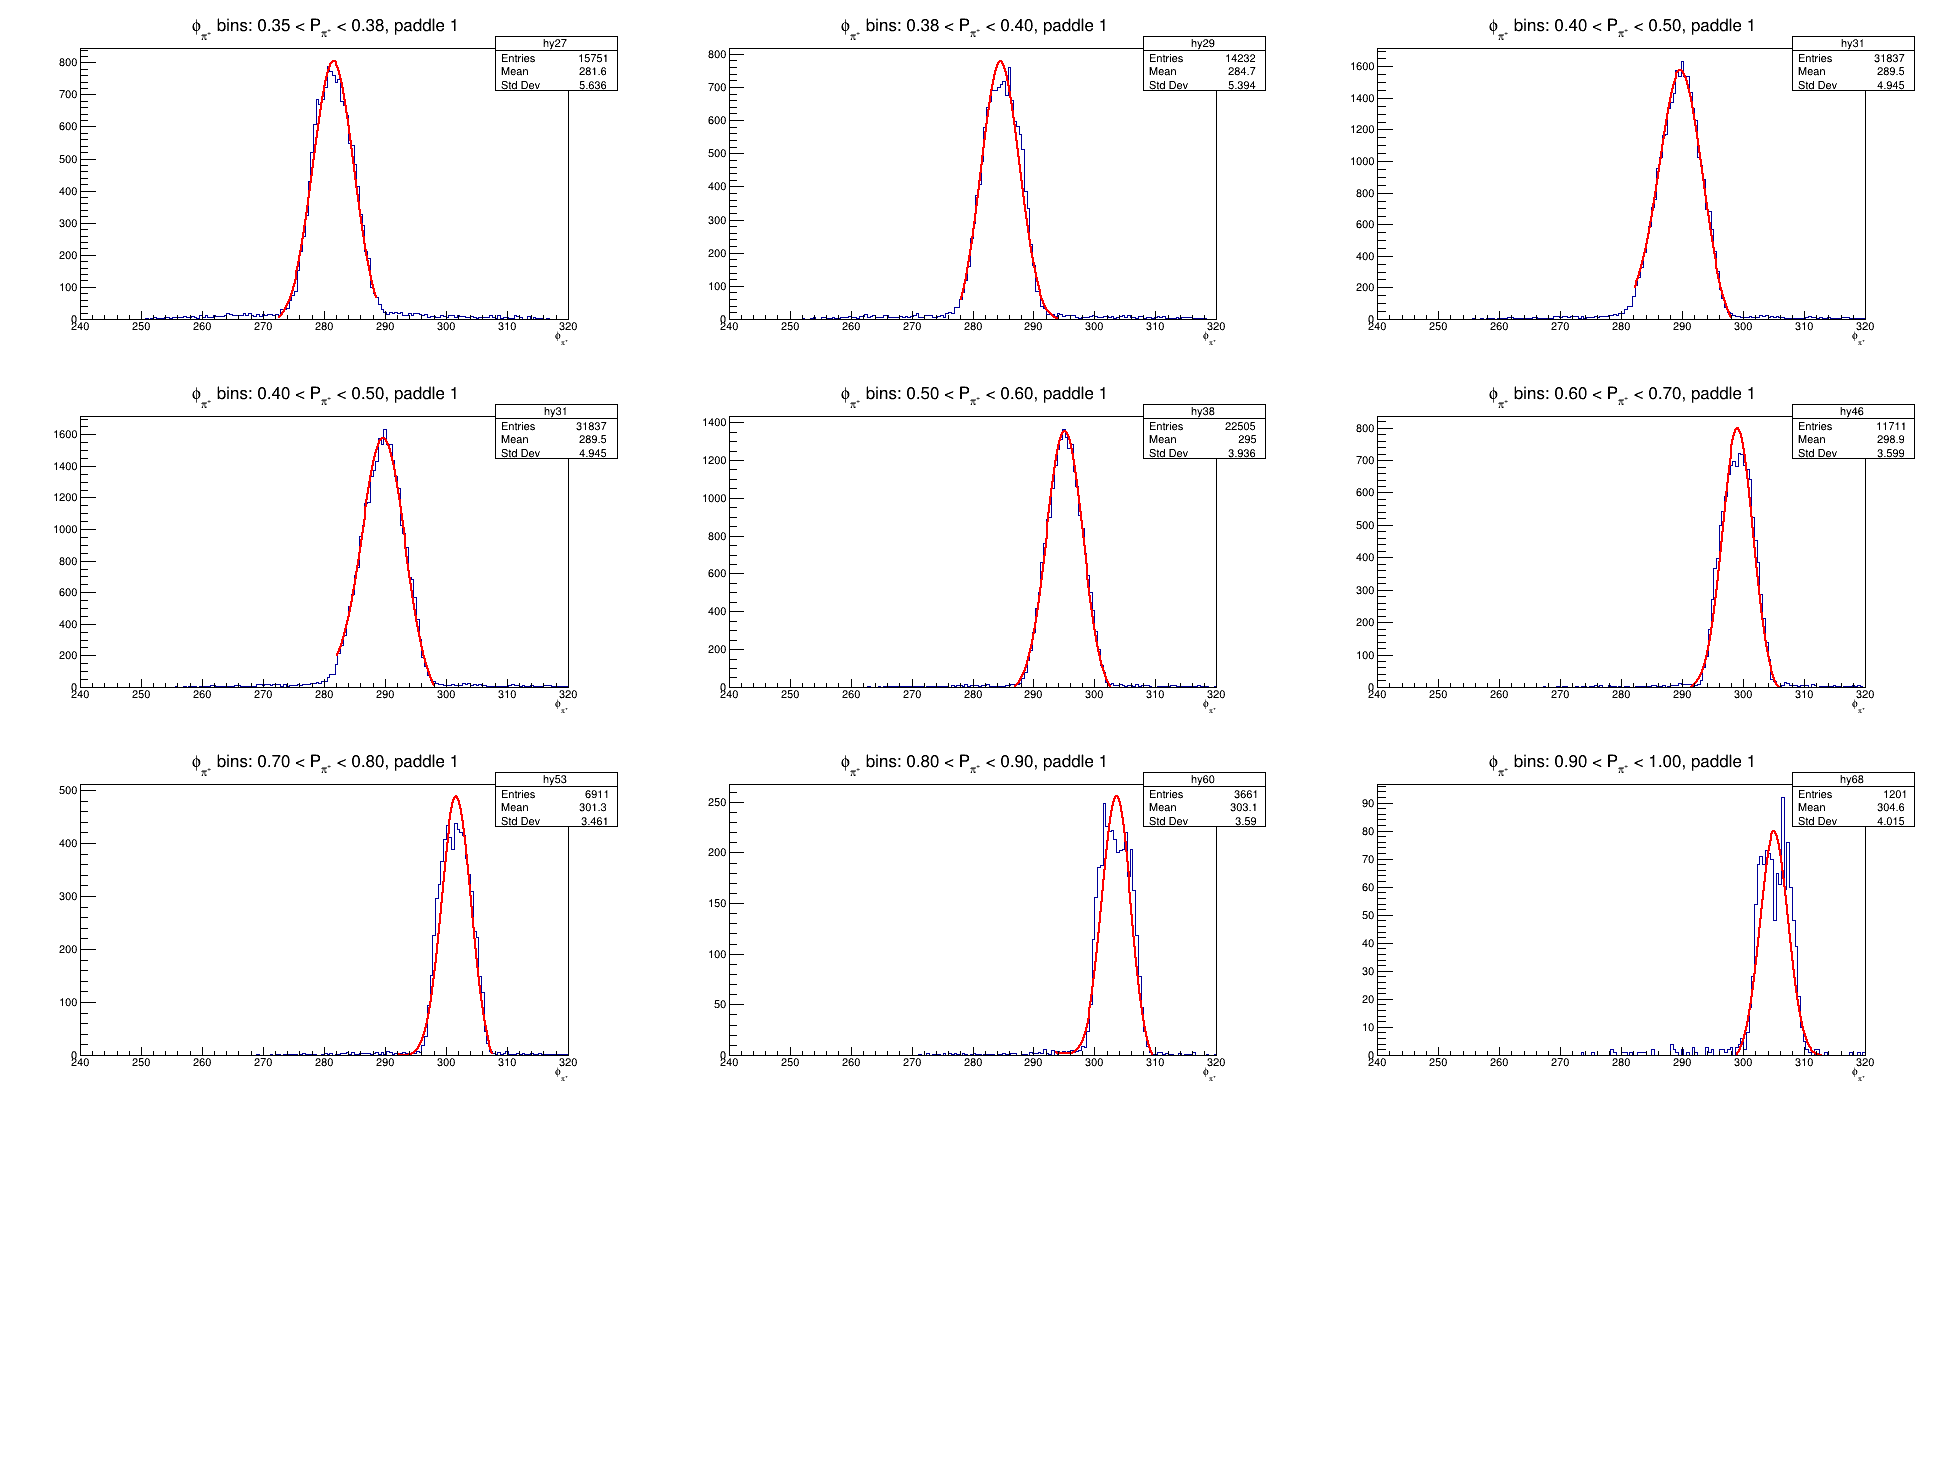

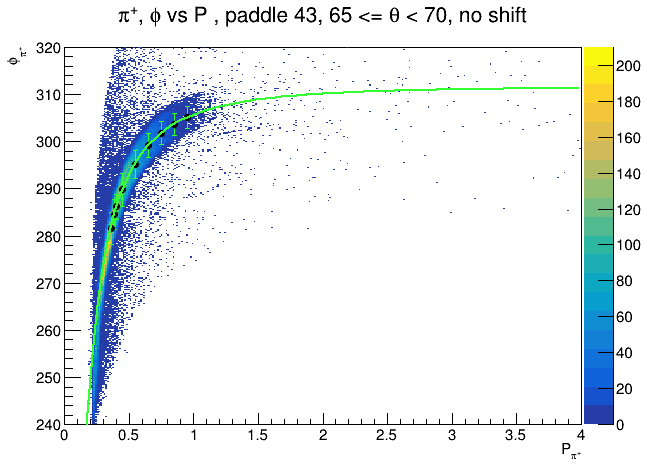

In [35]:
xlims = np.concatenate((np.arange(0.35, 0.4, 0.025), np.arange(0.4, 1.1, 0.1)))
exec(code_listA[9])
exec(code_listB[9])

3
12


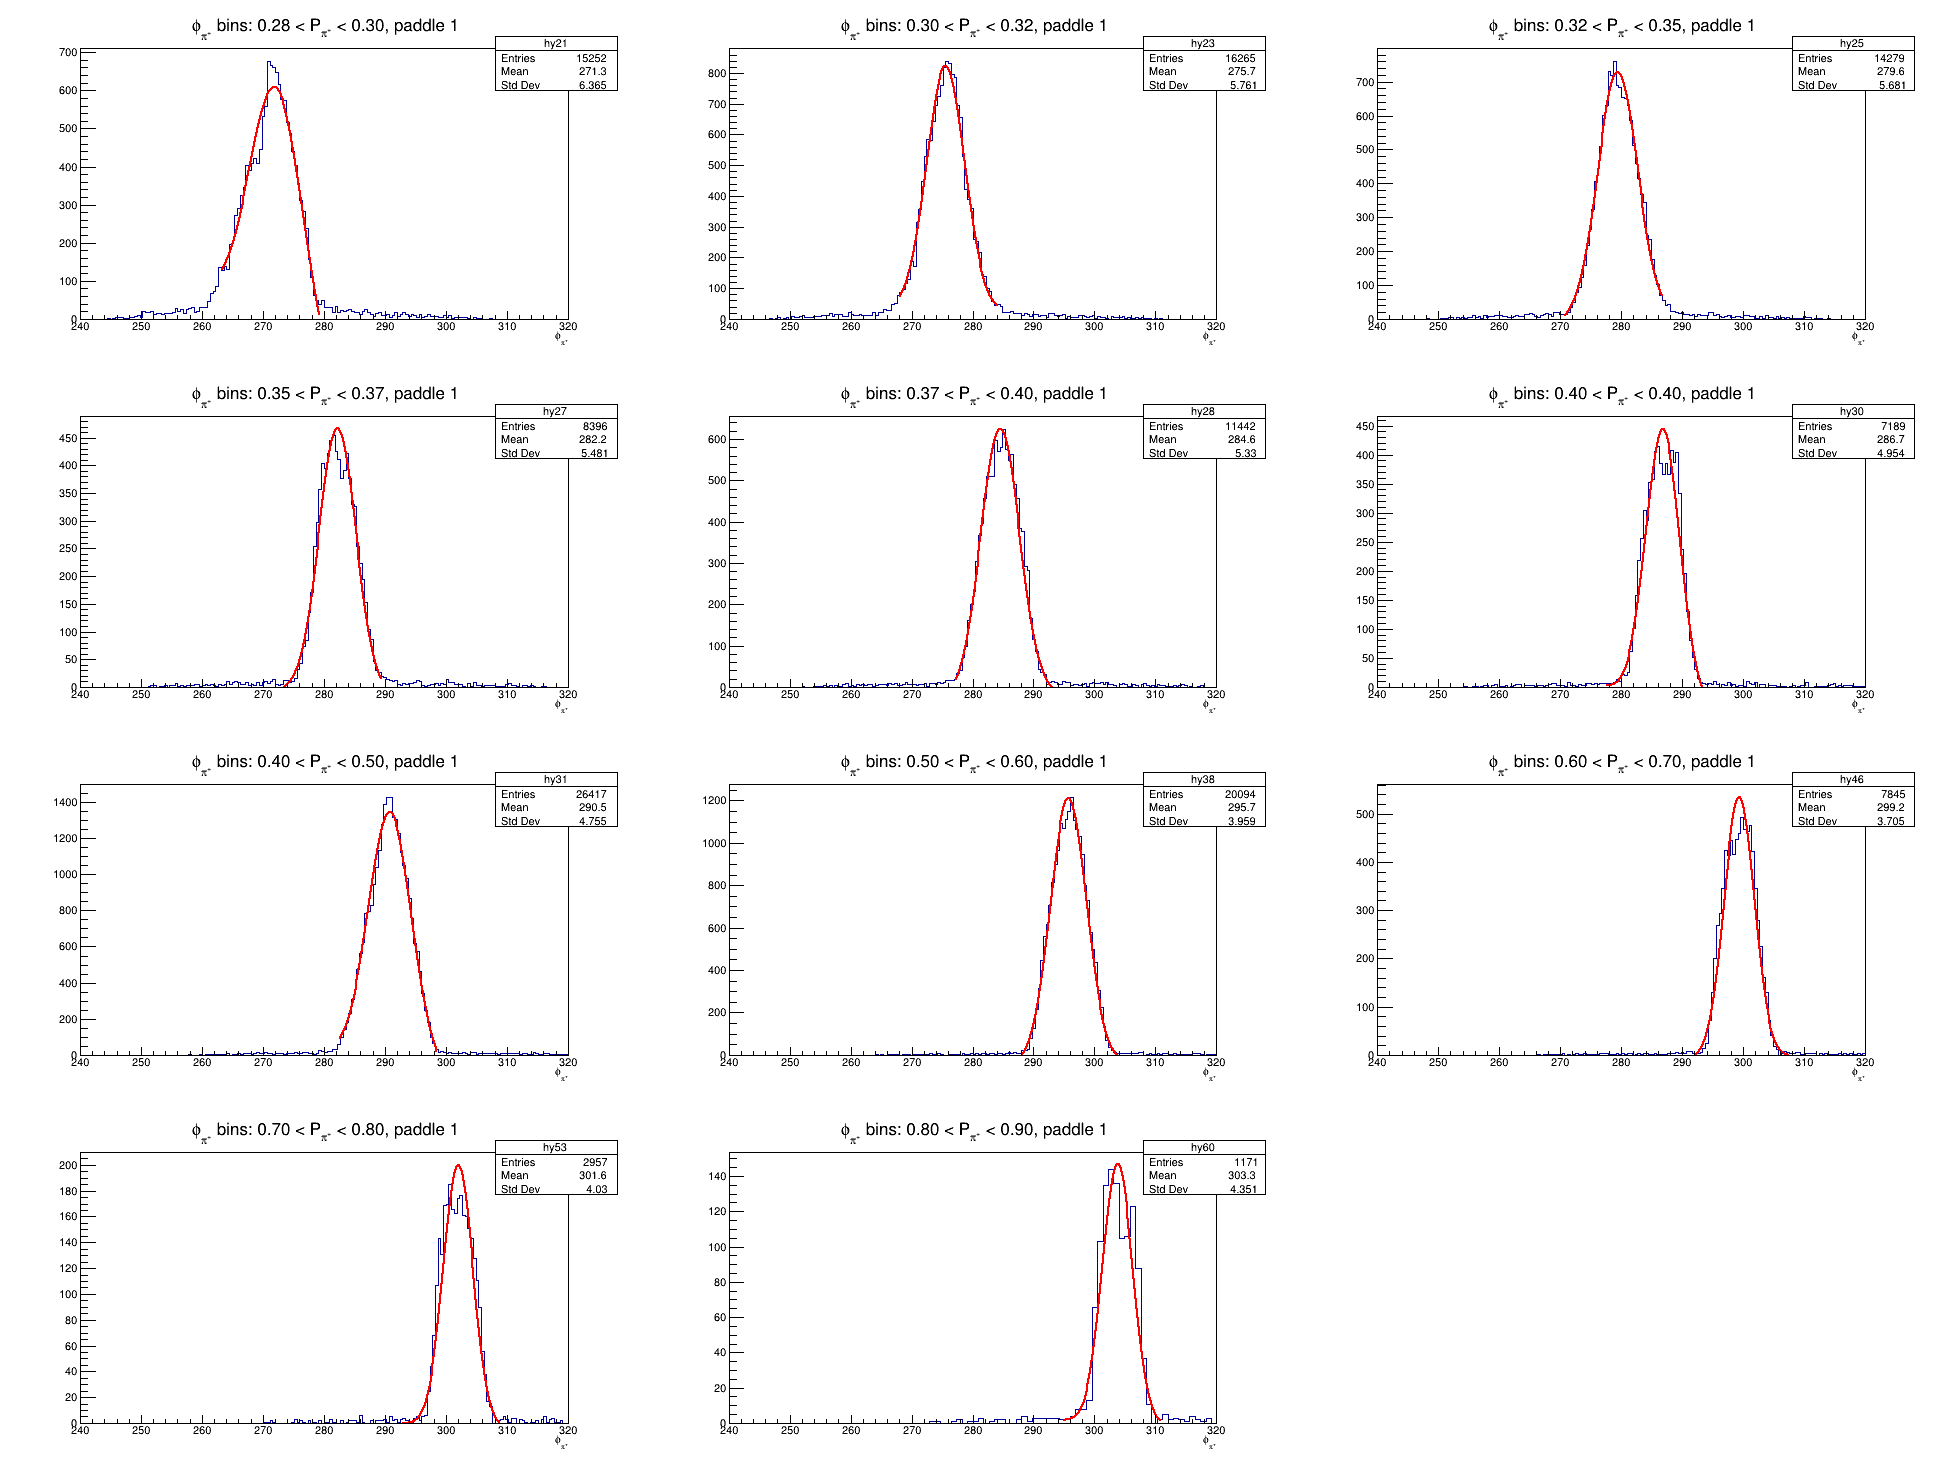

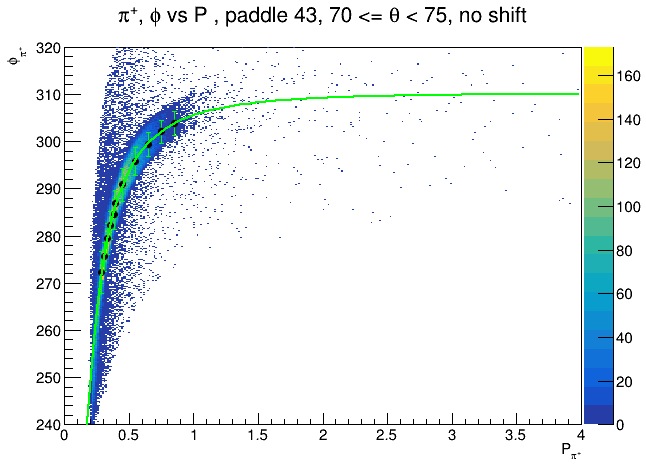

In [37]:
xlims = np.concatenate((np.arange(0.275, 0.4, 0.024), np.arange(0.4, 1, 0.1)))
exec(code_listA[10])
exec(code_listB[10])

3
15


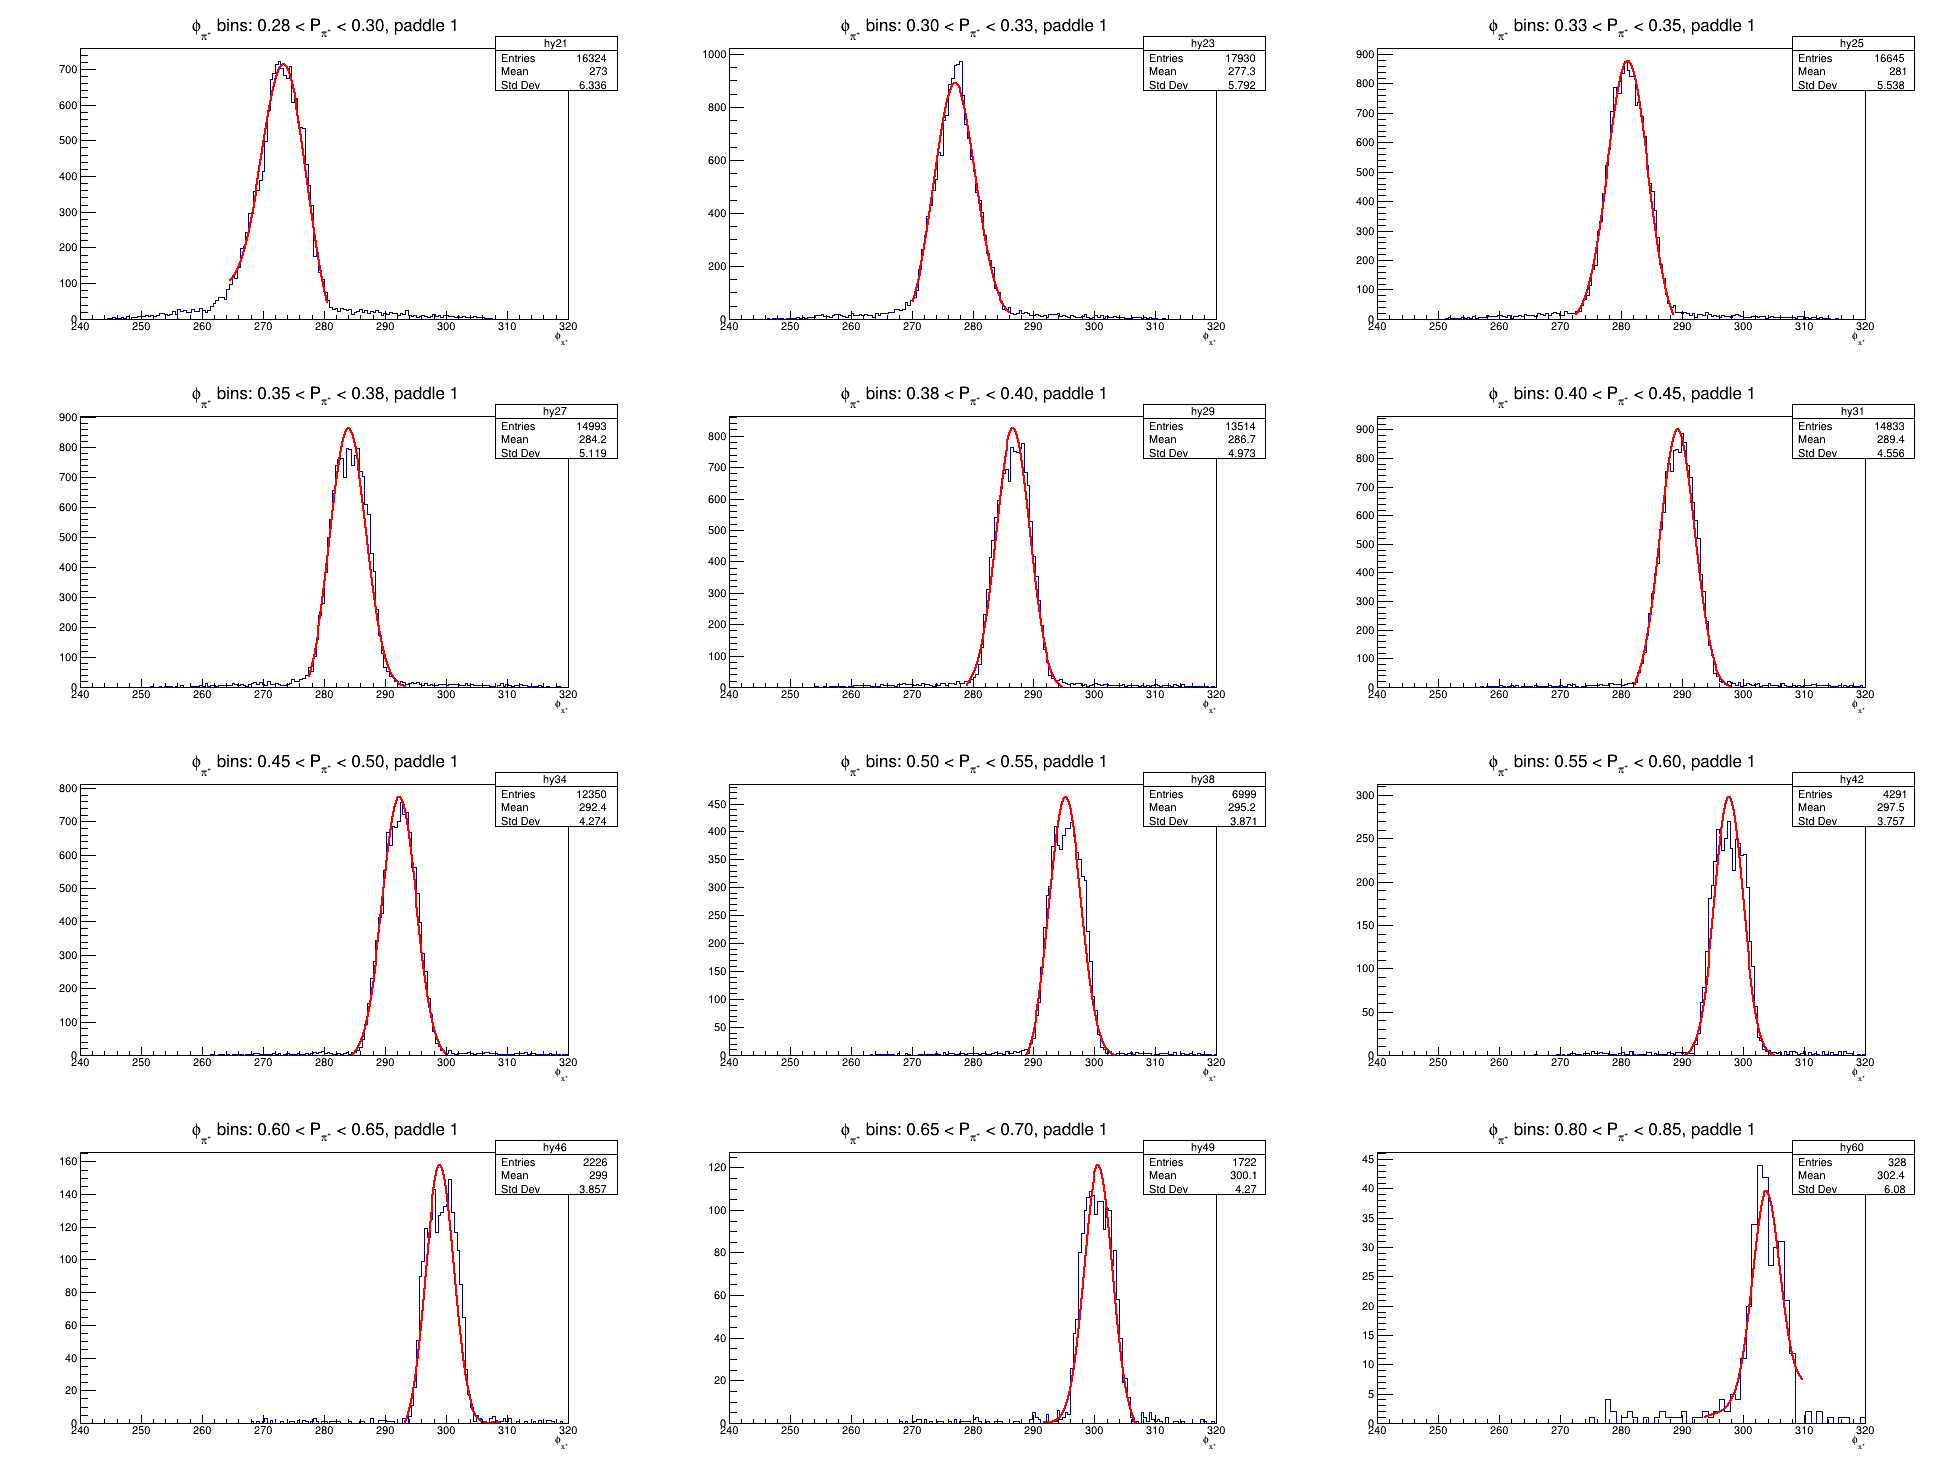

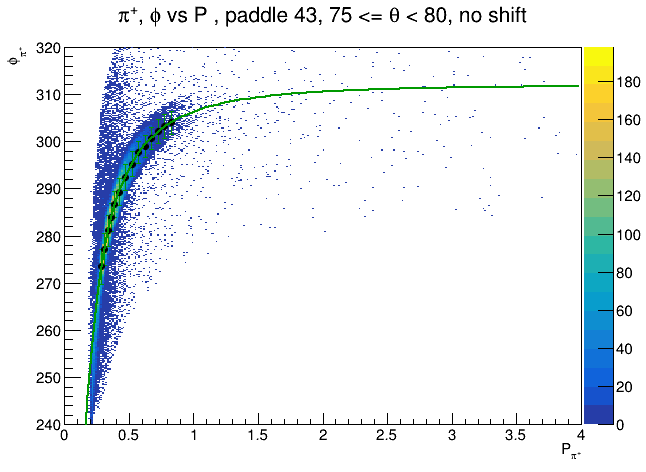

In [39]:
xlims = np.concatenate((np.arange(0.275, 0.4, 0.025), np.arange(0.4, 0.9, 0.05)))
exec(code_listA[11])
exec(code_listB[11])

3
12


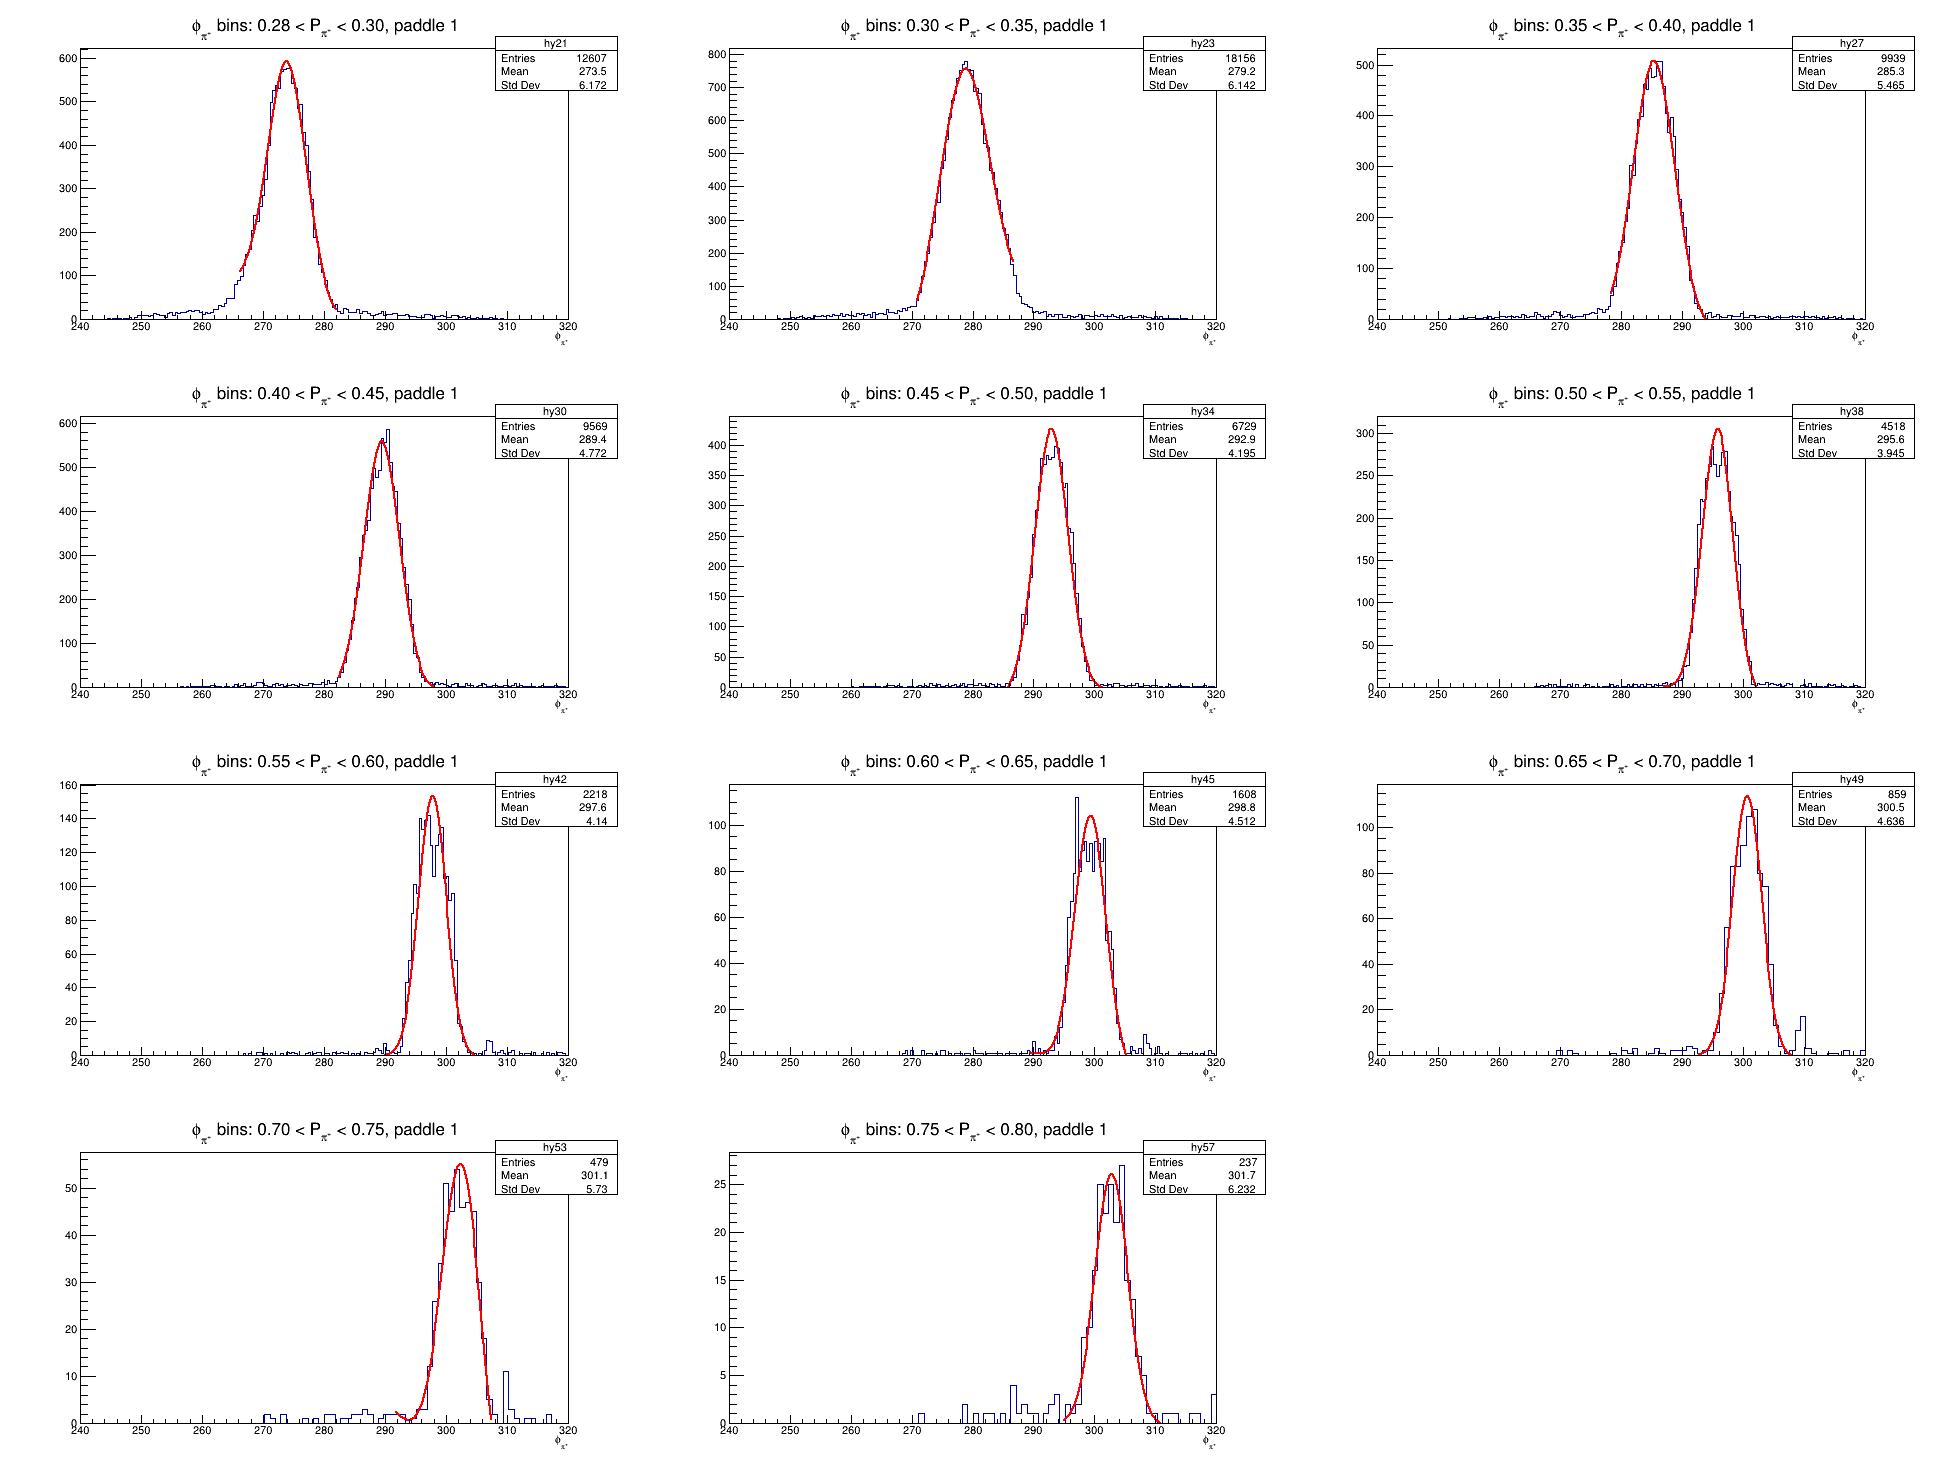

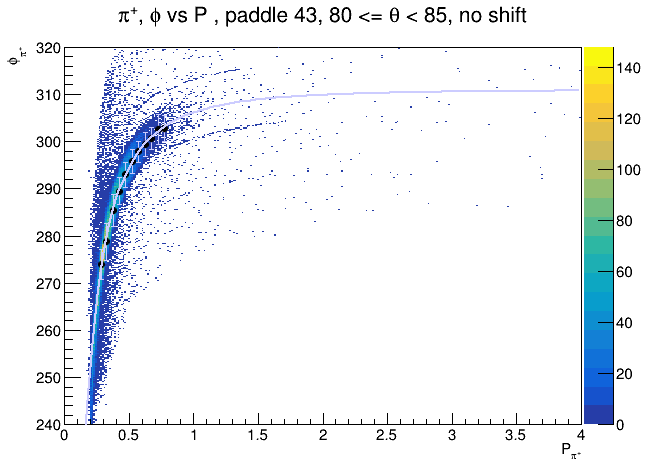

In [41]:
xlims = np.concatenate((np.arange(0.275, 0.3, 0.025), np.arange(0.3, .85, 0.05)))
exec(code_listA[12])
exec(code_listB[12])

3
9


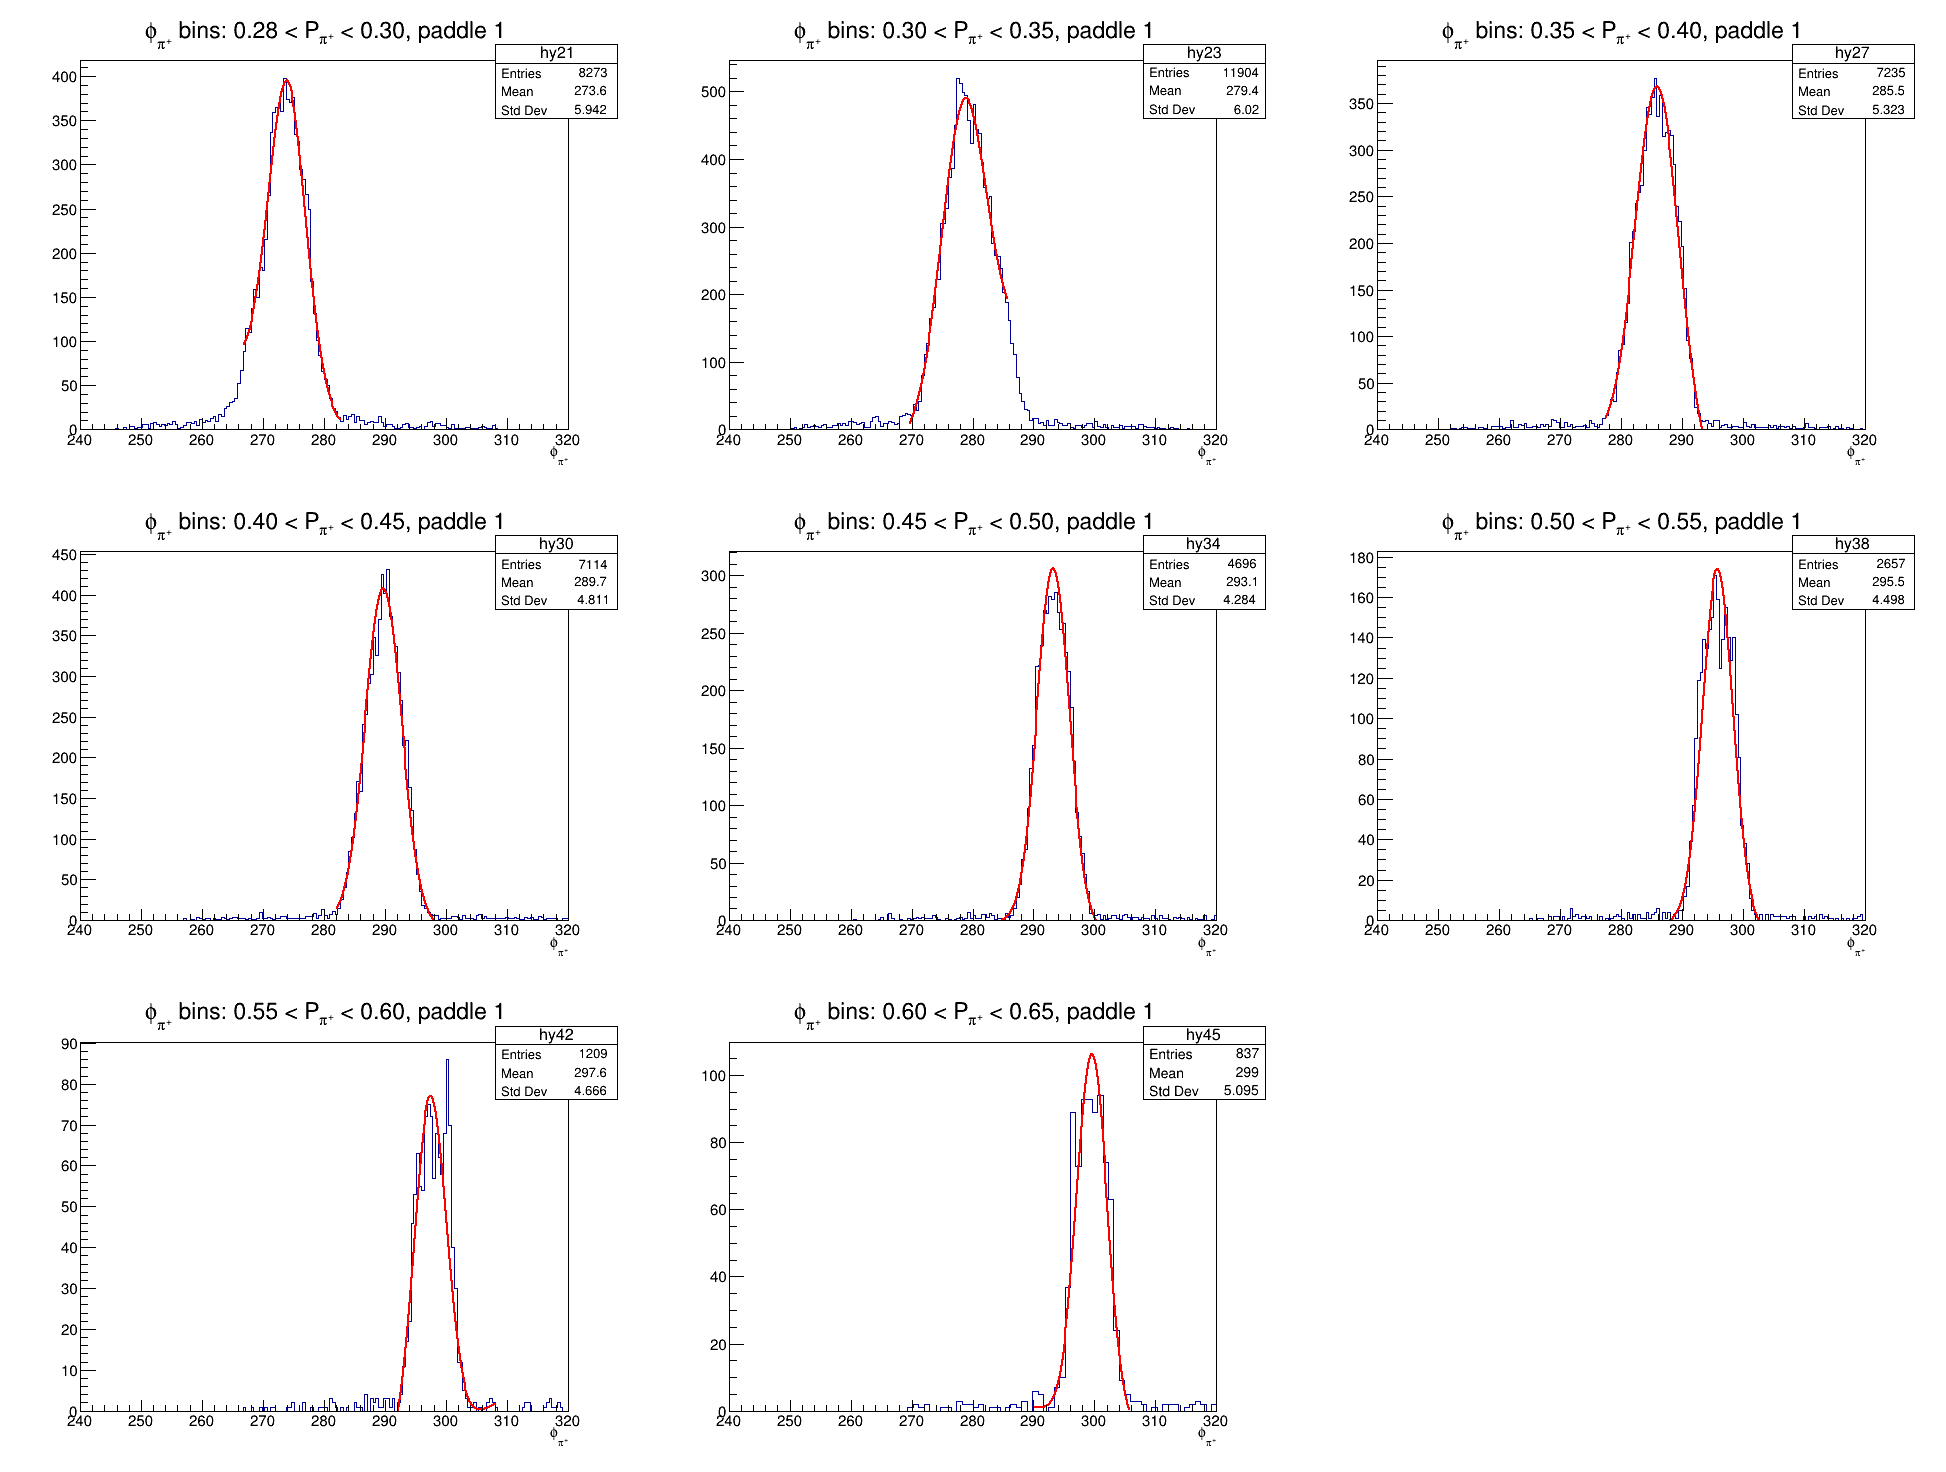

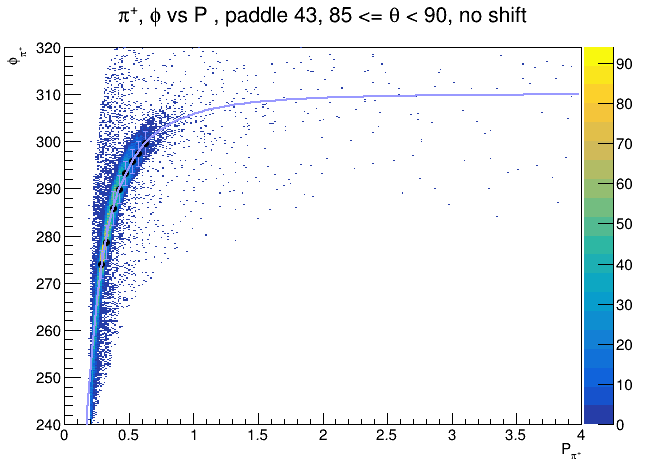

In [42]:
xlims = np.concatenate((np.arange(0.275, 0.3, 0.025), np.arange(0.3, 0.7, 0.05)))
exec(code_listA[13])
exec(code_listB[13])

3
11


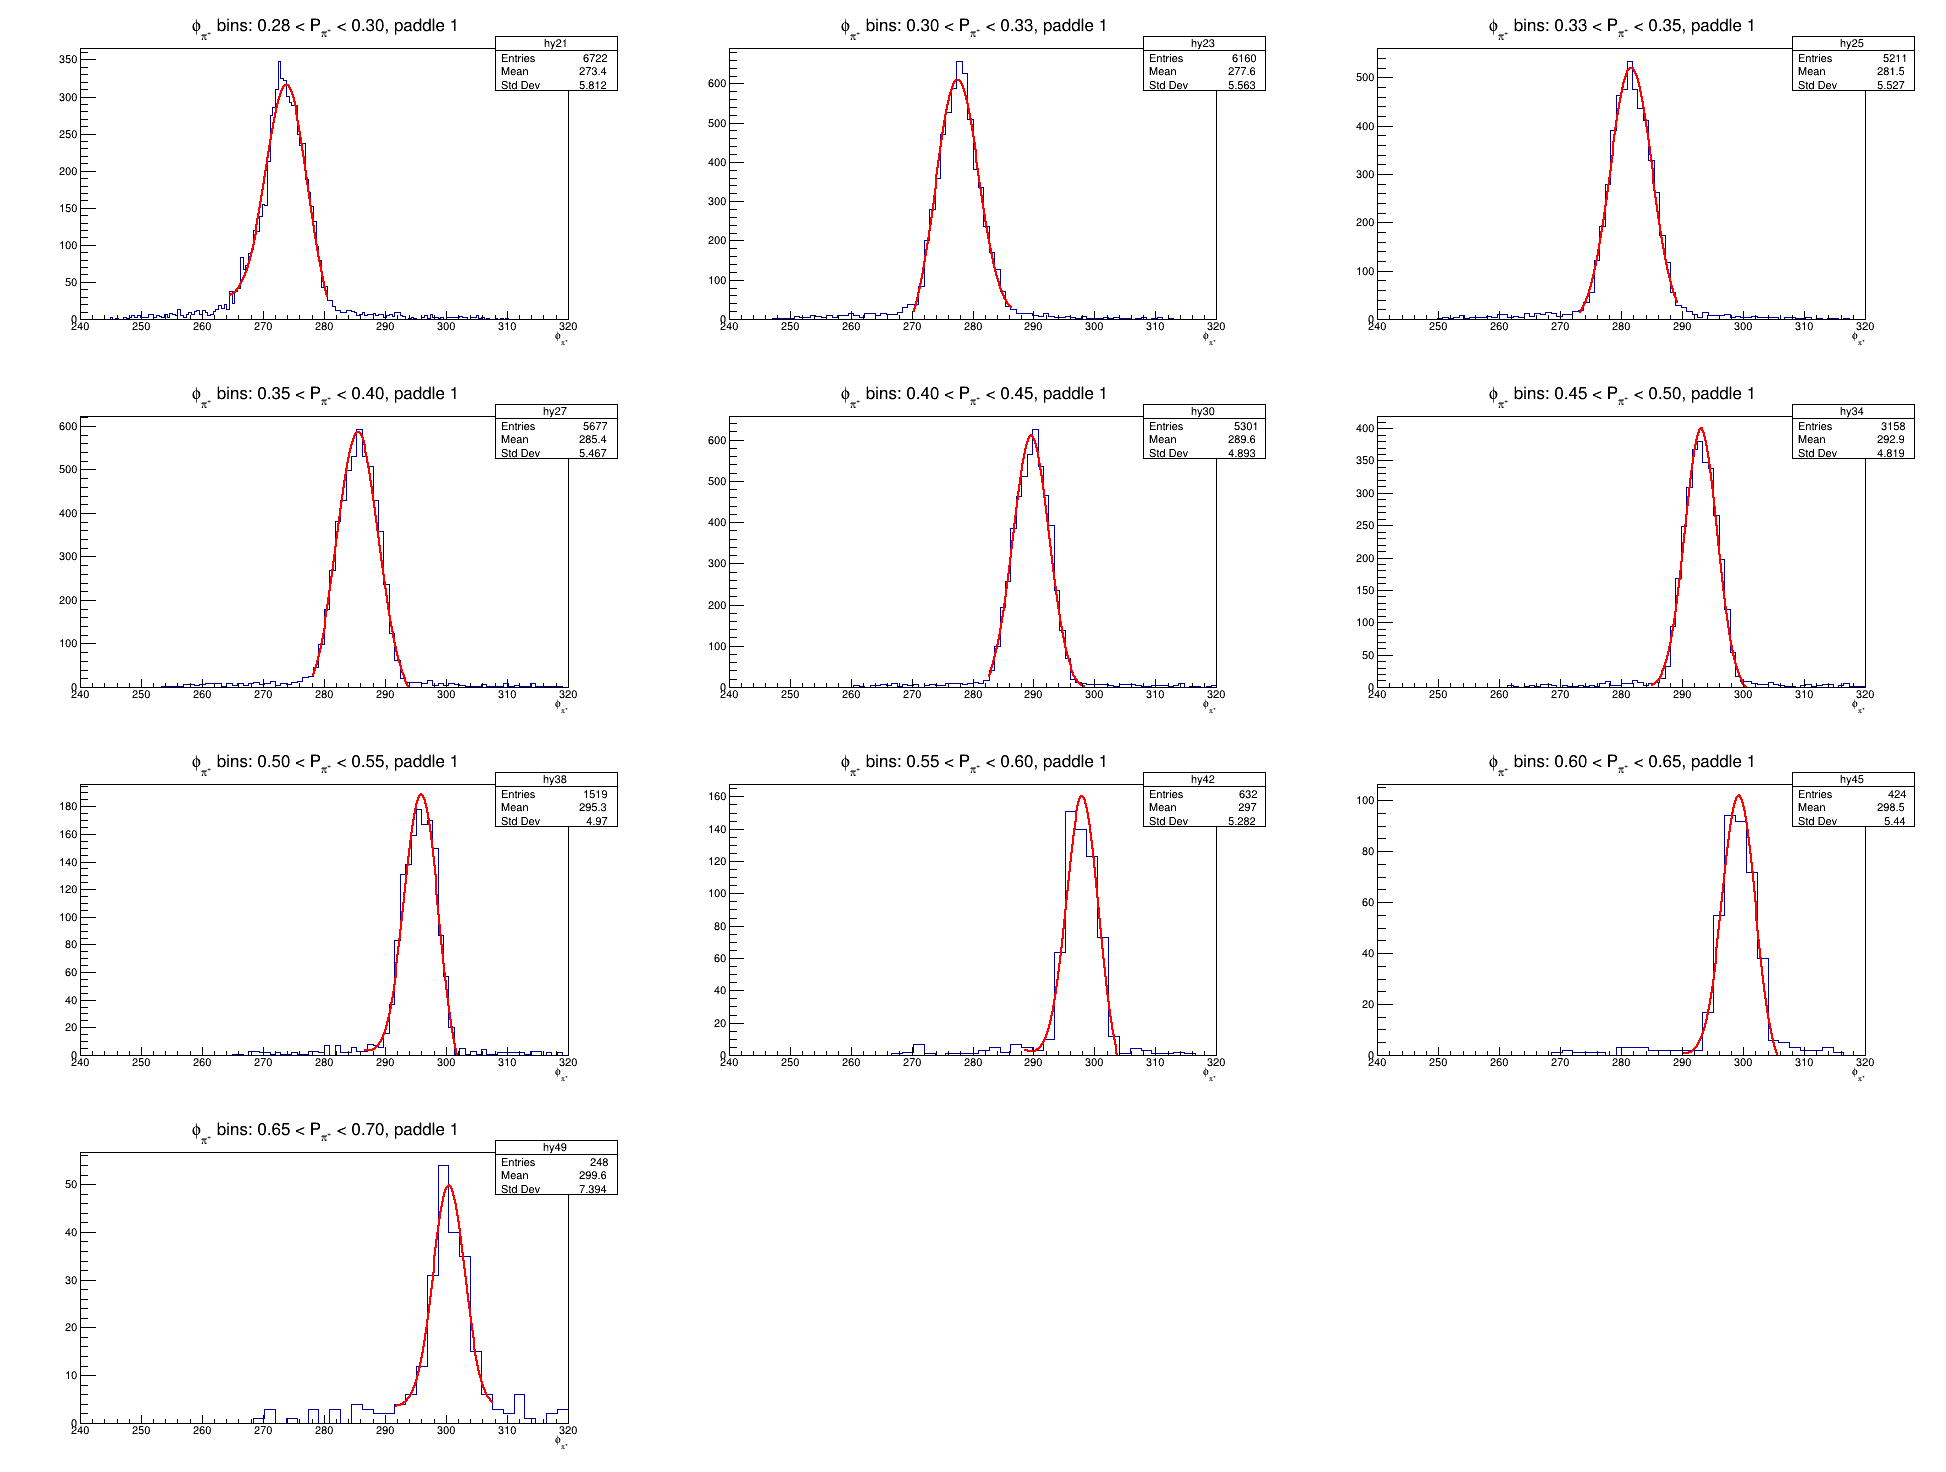

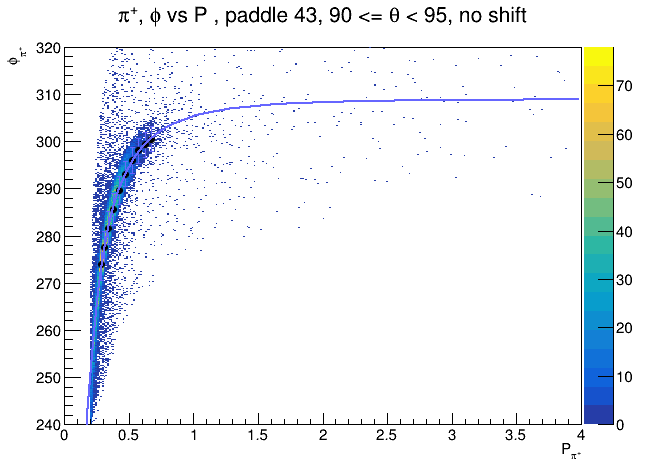

In [43]:
xlims = np.concatenate((np.arange(0.275, 0.35, 0.025), np.arange(0.35, .75, 0.05)))
exec(code_listA[14])
exec(code_listB[14])

3
12


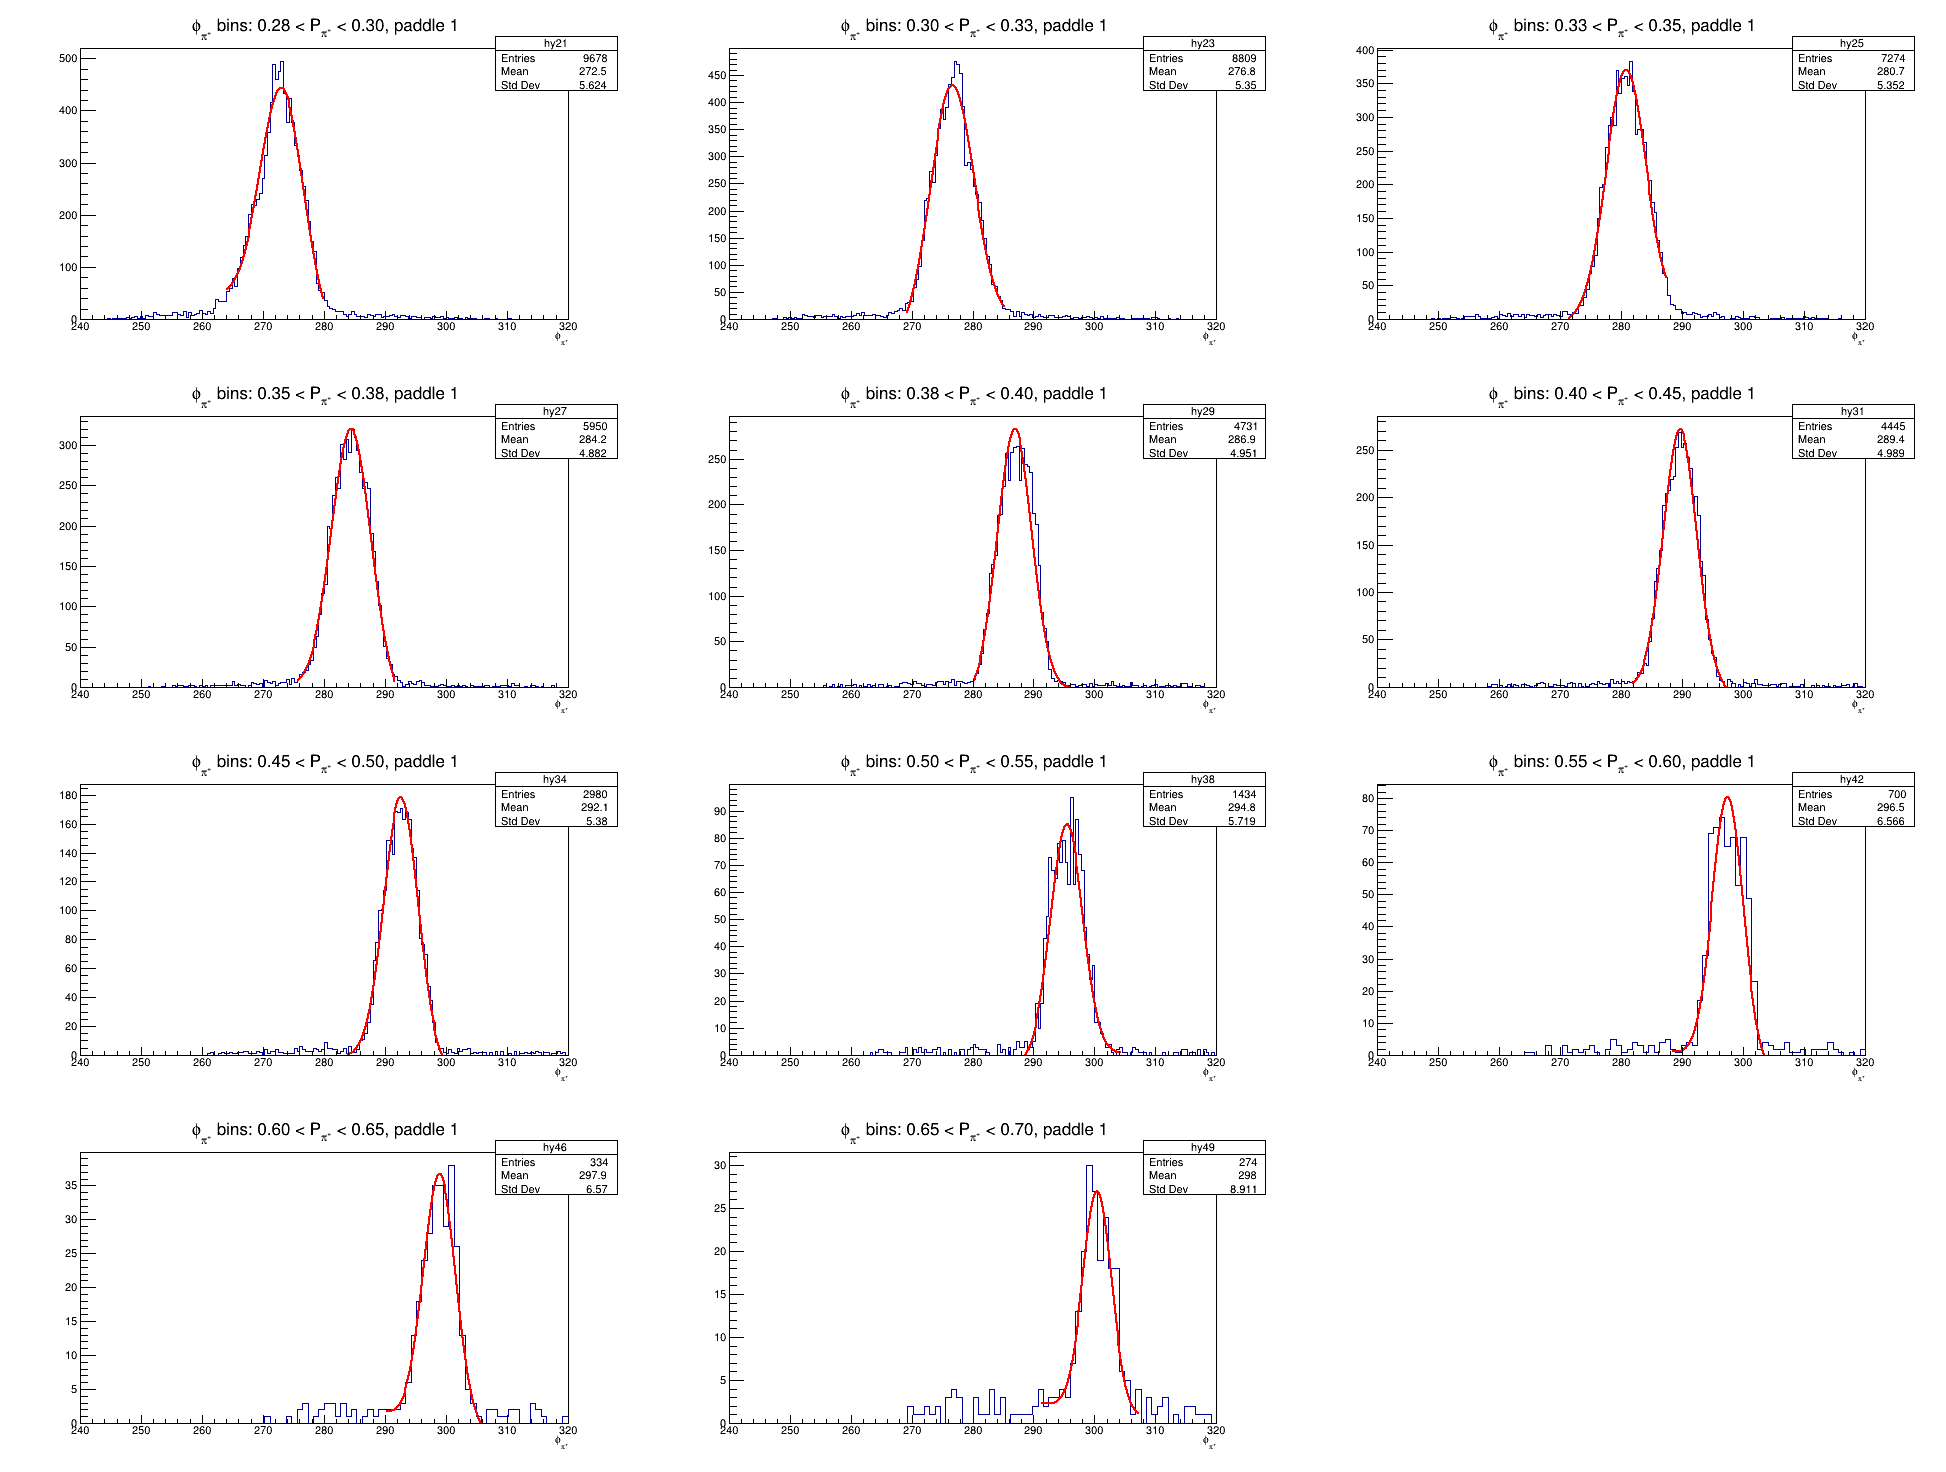

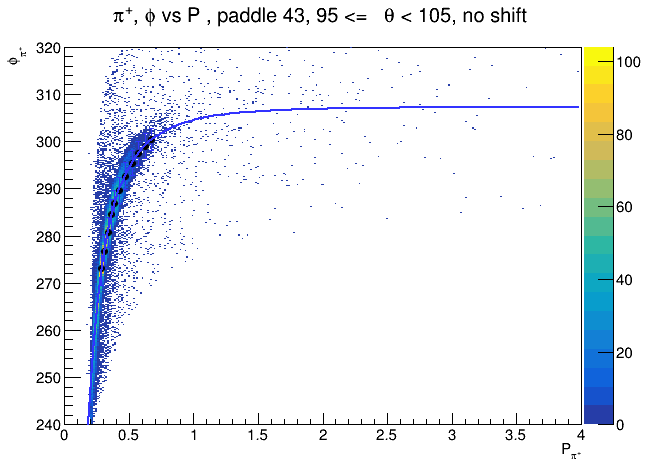

In [44]:
xlims = np.concatenate((np.arange(0.275, 0.4, 0.025), np.arange(0.4, .75, 0.05)))
exec(code_listA[15])
exec(code_listB[15])

3
14


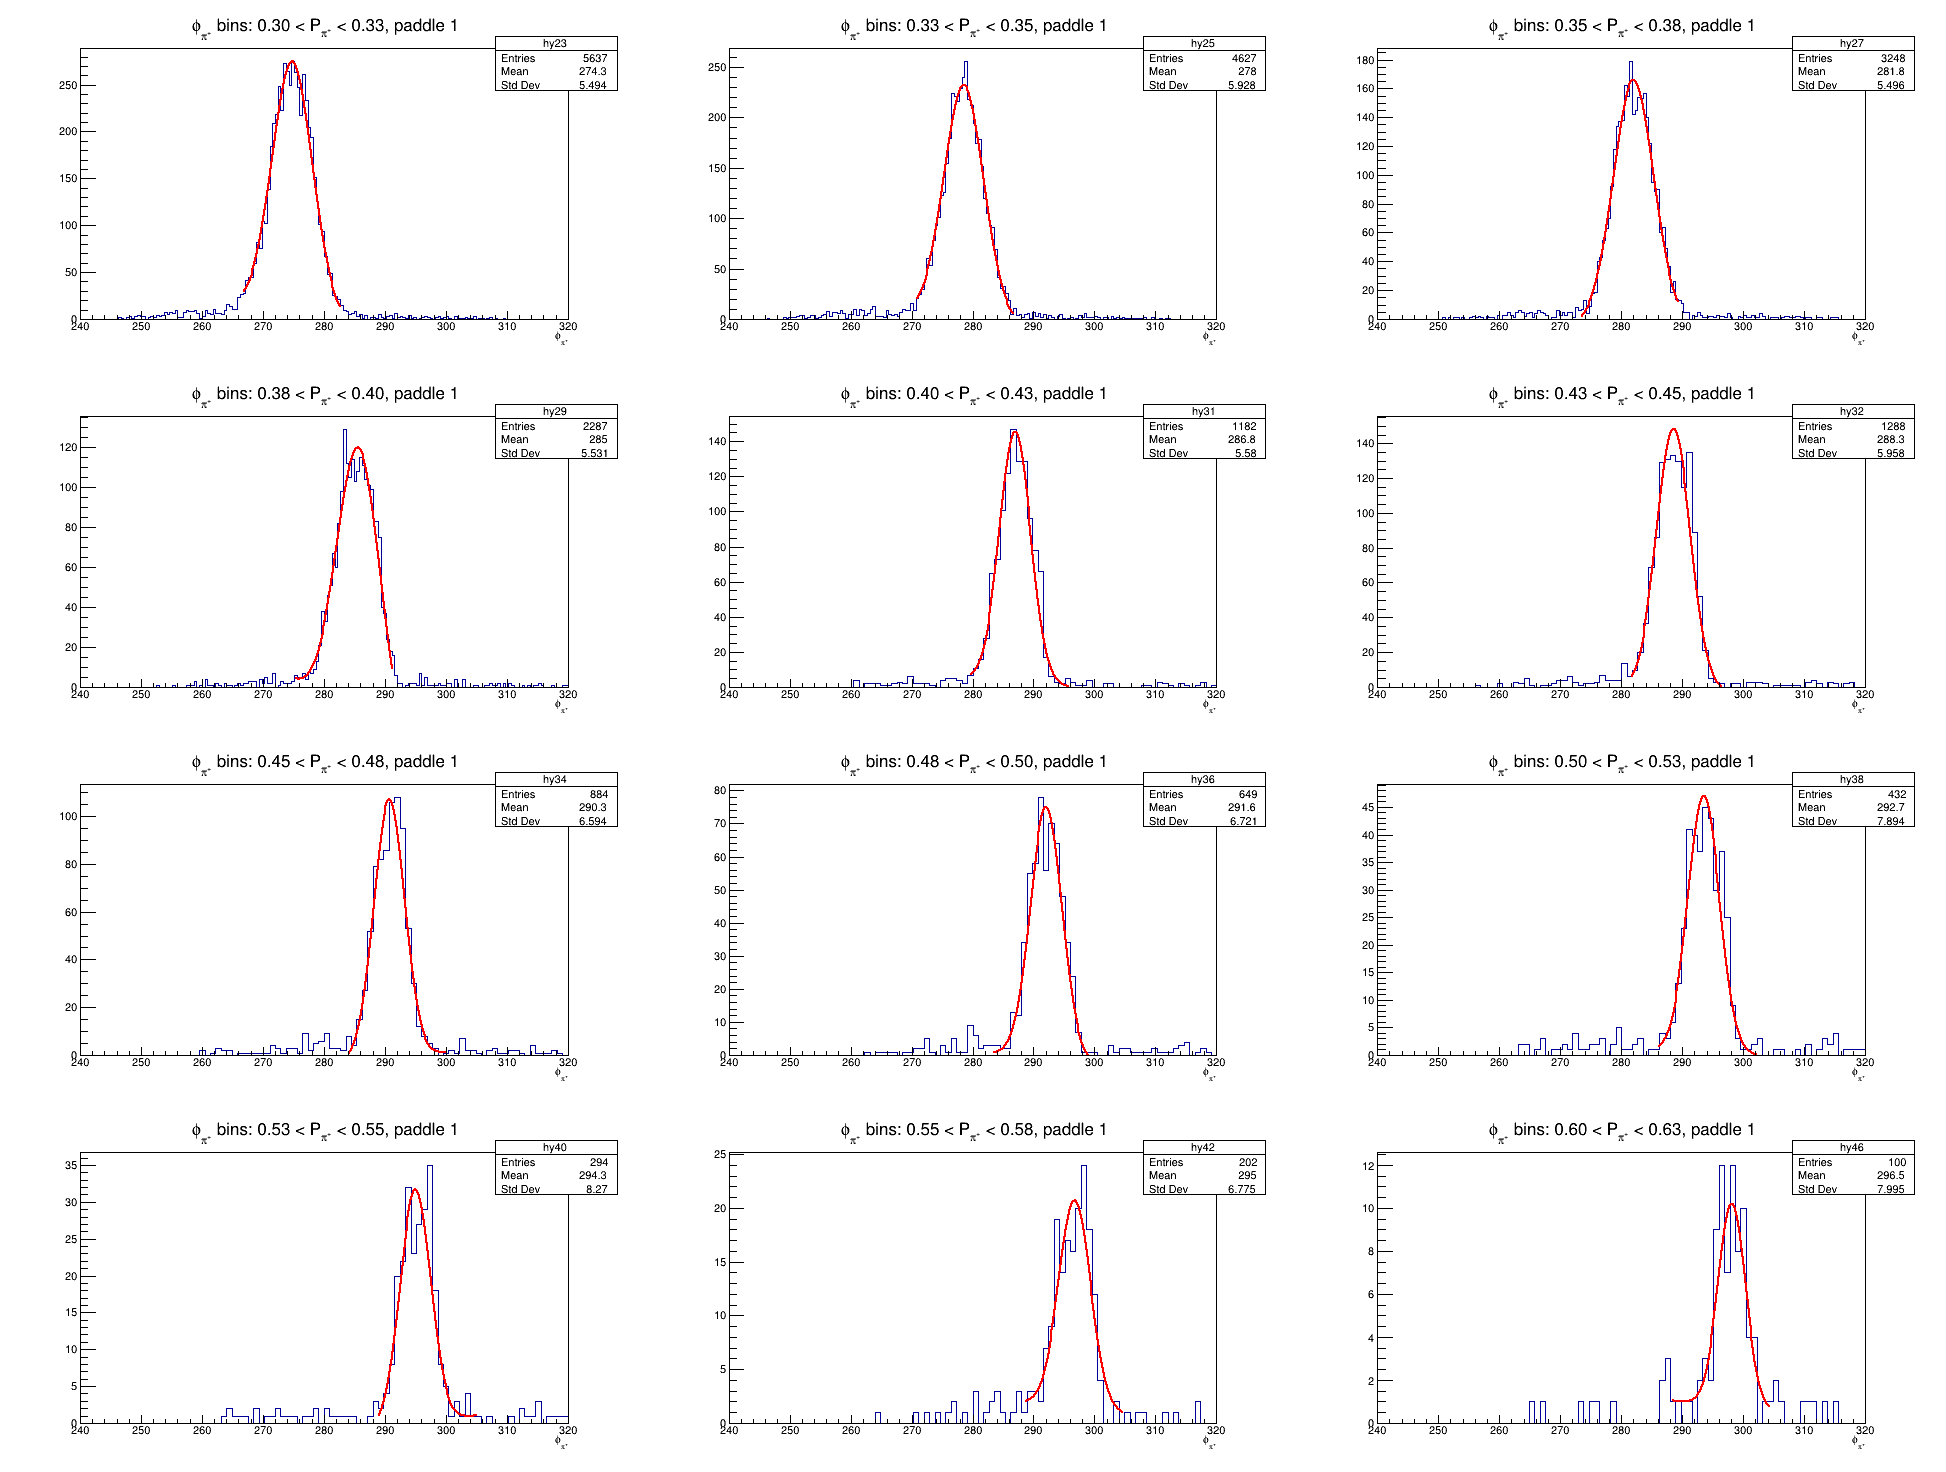

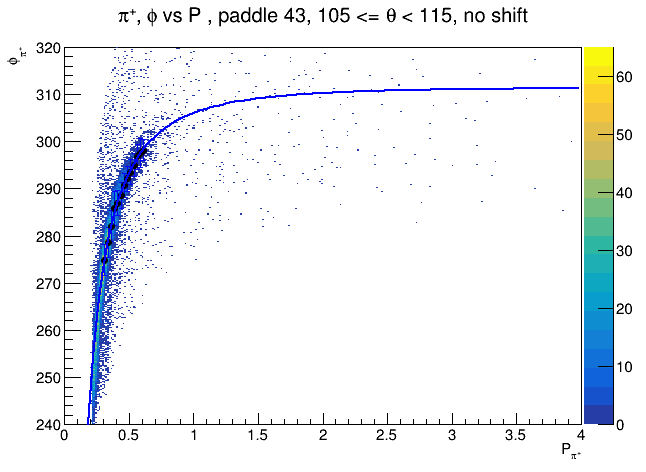

In [48]:
xlims = np.concatenate((np.arange(0.3, 0.3, 0.025), np.arange(0.3, 0.65, 0.025)))
exec(code_listA[16])
exec(code_listB[16])

3
10


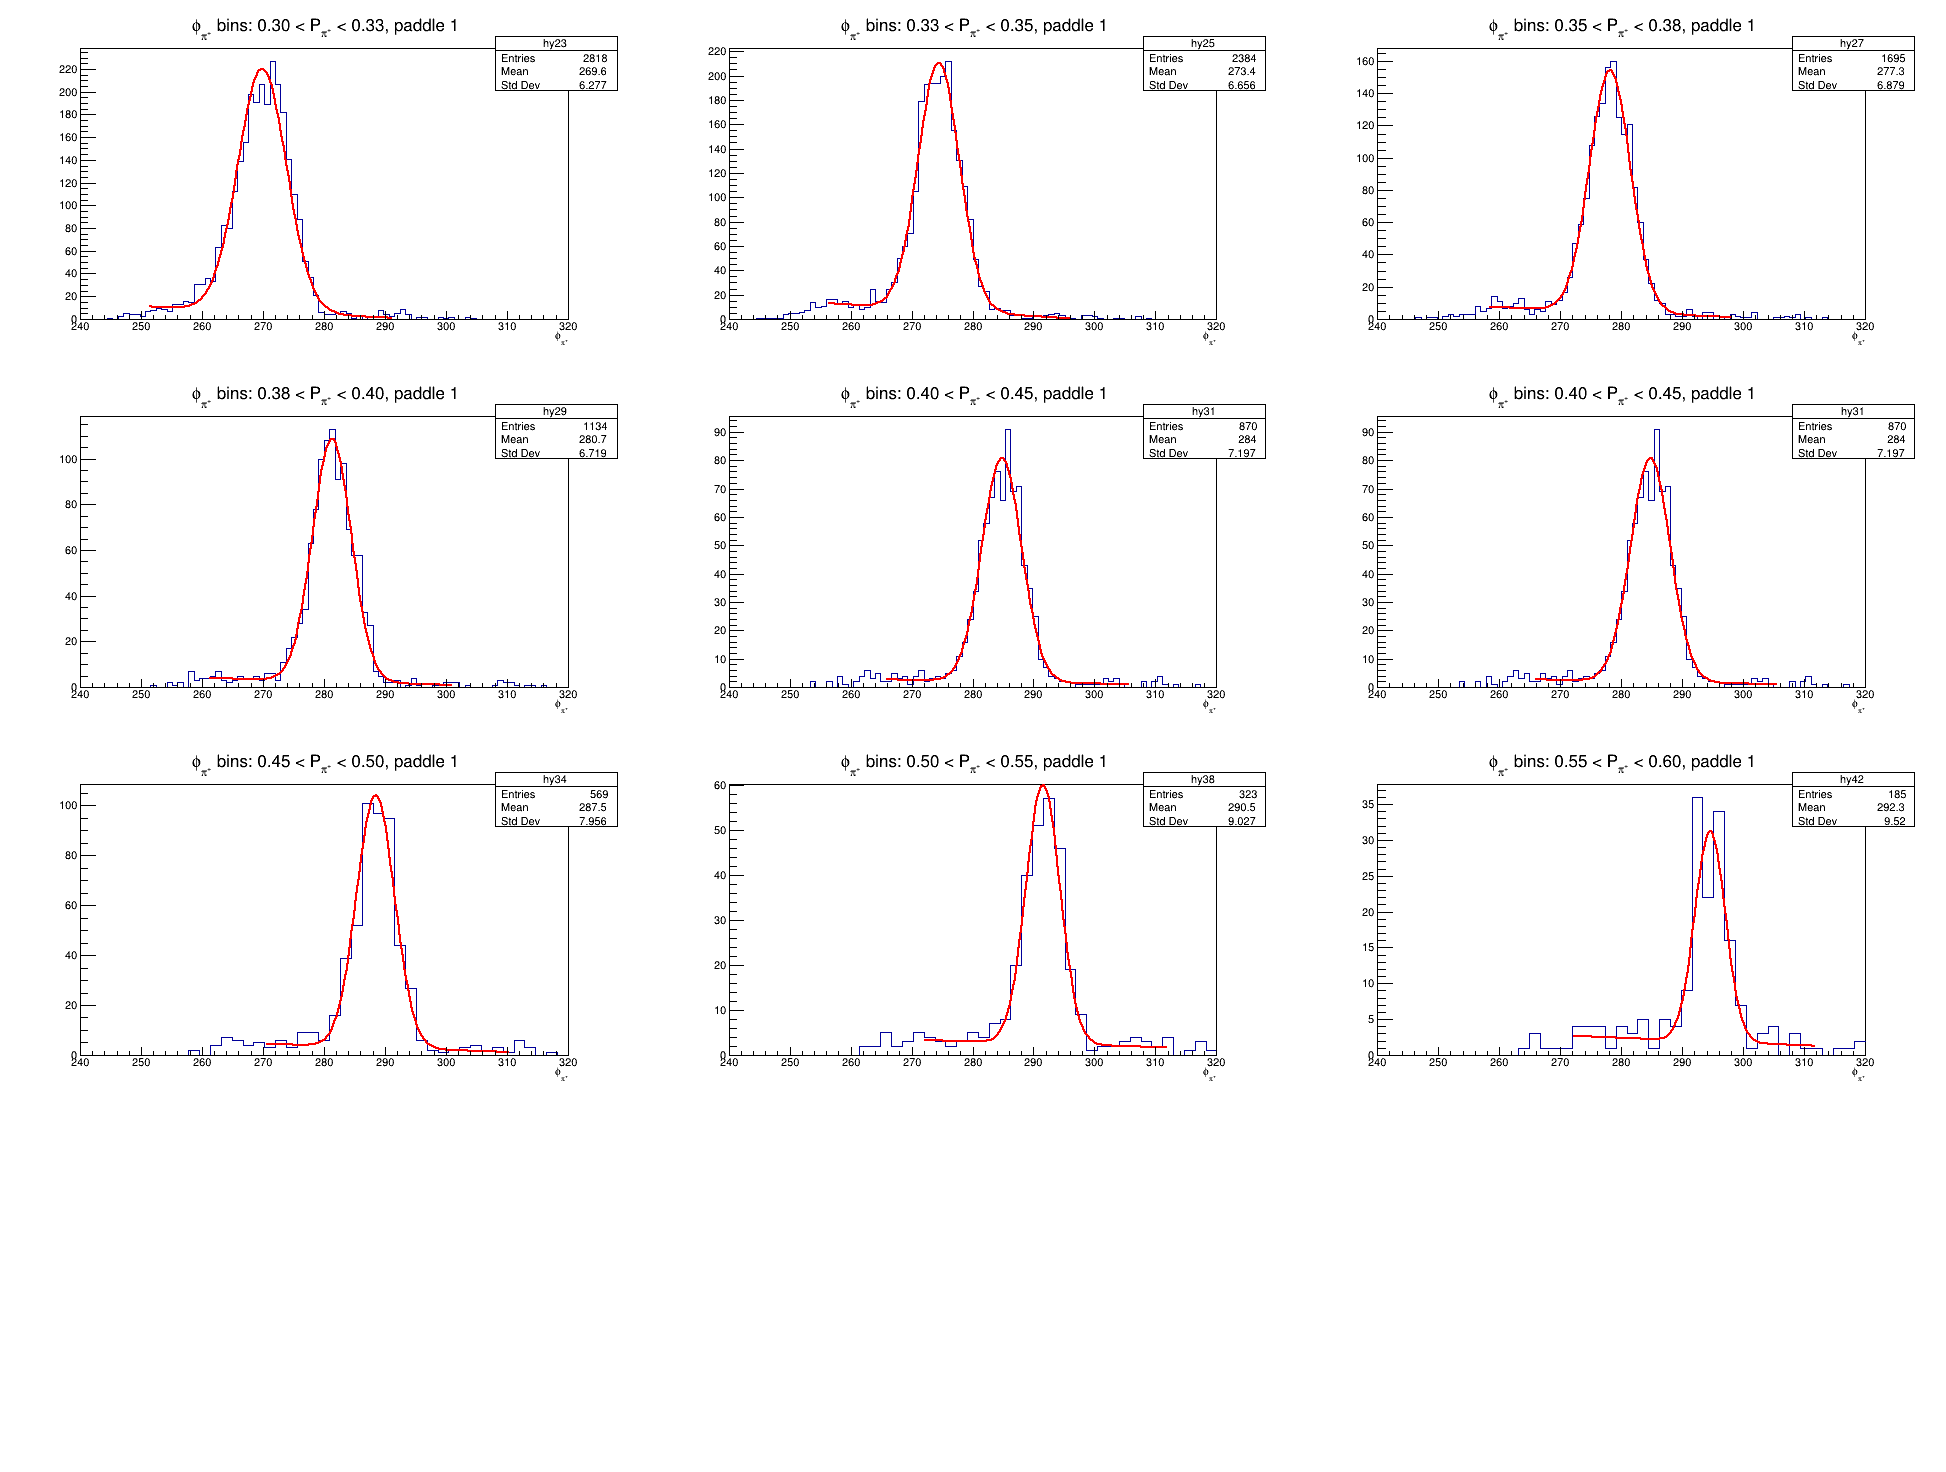

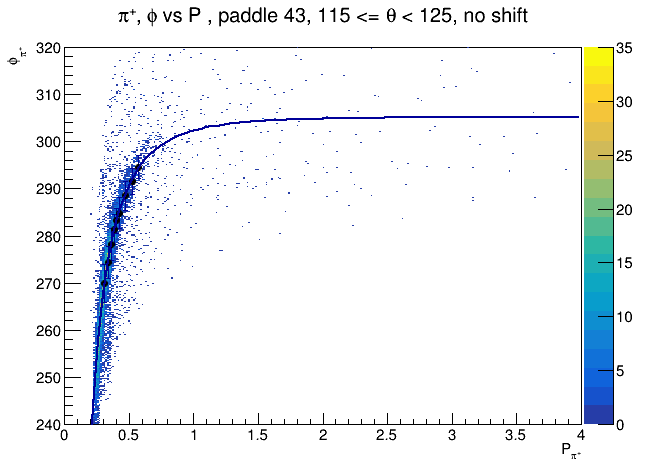

In [51]:
xlims = np.concatenate((np.arange(0.3, 0.4, 0.025), np.arange(0.4, 0.65, 0.05)))
exec(code_listA[17])
exec(code_listB[17])

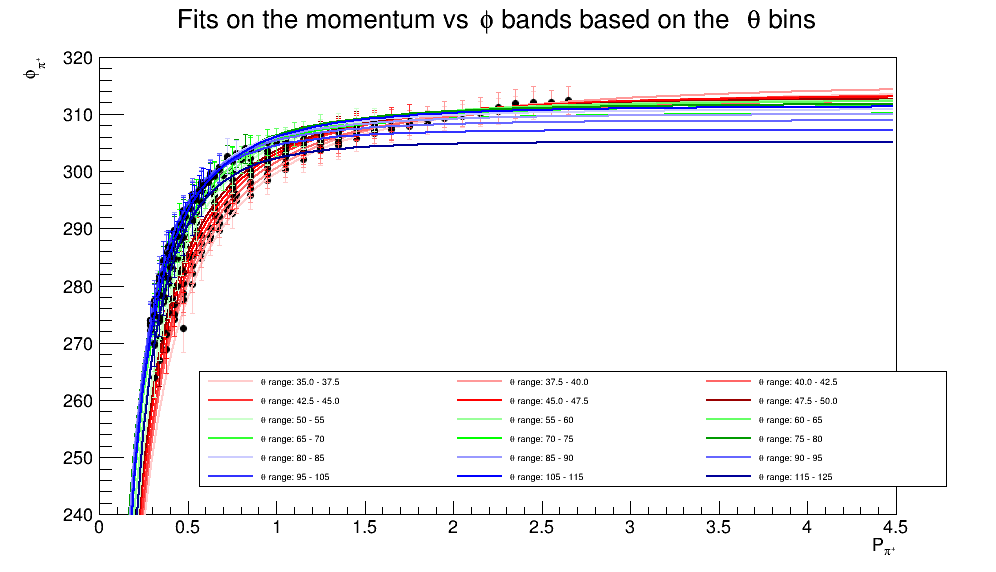

In [52]:
ca = ROOT.TCanvas("all", "all", 1000, 600)
n_bins_x = 300
x_min = 0
x_max =4.5
n_bins_y = 360
y_min = phi_y_mi
y_max = phi_y_ma
pipPAxis
histogram = ROOT.TH2F("combined histos", f"Fits on the momentum vs#phi bands based on the #theta bins;{pipPAxis};{pipPhiAxis}",
                      n_bins_x, x_min, x_max,
                      n_bins_y, y_min, y_max)
# histogram.GetXaxis().SetRangeUser(x_min, x_max)
# histogram.GetYaxis().SetRangeUser(y_min, y_max)
# histogram.SetTitle("Your Histogram Title")
ROOT.gStyle.SetLegendTextSize(0.0175)
histogram.SetStats(0)




legend = ROOT.TLegend(0.2, 0.35, 0.95, 0.15)
legend.SetNColumns(3)
for i in range(18):
    legend.AddEntry(th_histos[i].fphimean,f"#theta range: {min_list[i]} - {max_list[i]}","L")
#     exec(cpal[i])

histogram.Draw()
for i in range(18):
    th_histos[i].gr.Draw("P Same")
#     exec(cdal[i])

legend.Draw()
ca.Draw()
ca.Update()

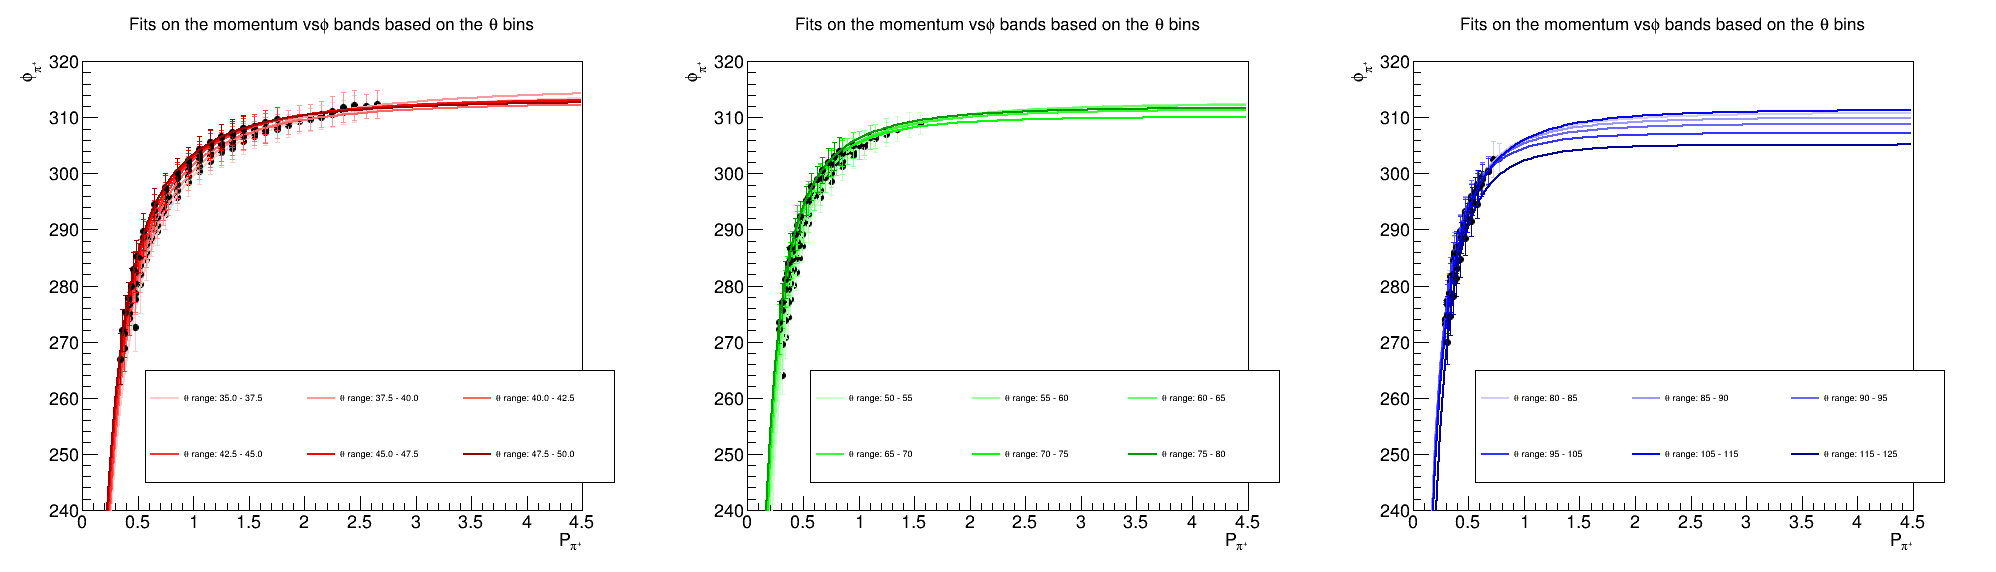

In [53]:
ca = ROOT.TCanvas("all", "all", 2000, 600)
ca.Divide(3,1)
n_bins_x = 300
x_min = 0
x_max =4.5
n_bins_y = 360
y_min = phi_y_mi
y_max = phi_y_ma
pipPAxis
histogram = ROOT.TH2F("combined histos", f"Fits on the momentum vs#phi bands based on the #theta bins;{pipPAxis};{pipPhiAxis}",
                      n_bins_x, x_min, x_max,
                      n_bins_y, y_min, y_max)
# histogram.GetXaxis().SetRangeUser(x_min, x_max)
# histogram.GetYaxis().SetRangeUser(y_min, y_max)
# histogram.SetTitle("Your Histogram Title")
ROOT.gStyle.SetLegendTextSize(0.0175)
histogram.SetStats(0)




legend1 = ROOT.TLegend(0.2, 0.35, 0.95, 0.15)
legend1.SetNColumns(3)
legend2 = ROOT.TLegend(0.2, 0.35, 0.95, 0.15)
legend2.SetNColumns(3)
legend3 = ROOT.TLegend(0.2, 0.35, 0.95, 0.15)
legend3.SetNColumns(3)
ca.cd(1)
for i in range(6):
    legend1.AddEntry(th_histos[i].fphimean,f"#theta range: {min_list[i]} - {max_list[i]}","L")
histogram.Draw()
for i in range(6):
    th_histos[i].gr.Draw("P Same")
legend1.Draw()
ca.cd(2)
for i in range(6,12):
    legend2.AddEntry(th_histos[i].fphimean,f"#theta range: {min_list[i]} - {max_list[i]}","L")
histogram.Draw()
for i in range(6,12):
    th_histos[i].gr.Draw("P Same")
legend2.Draw()
ca.cd(3)
for i in range(12,18):
    ca.cd(i)
    legend3.AddEntry(th_histos[i].fphimean,f"#theta range: {min_list[i]} - {max_list[i]}","L")
histogram.Draw()
for i in range(12,18):
    th_histos[i].gr.Draw("P Same")
legend3.Draw()


ca.Draw()
ca.Update()

xlims_list = [36.25, 38.75, 41.25, 43.75, 46.25, 48.75, 52.5, 57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 100, 110, 120]



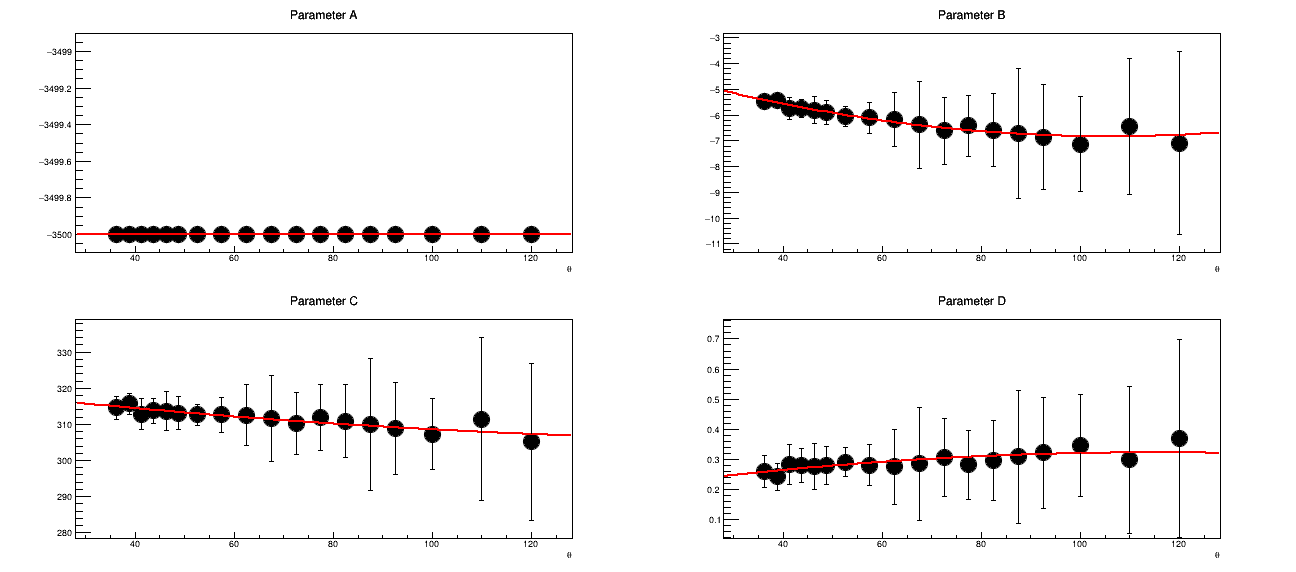

In [54]:
par_list_A = []
par_list_B = []
par_list_C = []
par_list_D = []
xlims_list = []
error_list_A = []
error_list_B = []
error_list_C = []
error_list_D = []
for i in range (6):
    xlims_list.append(min_list[i]+1.25)
    
for i in range (9):
    xlims_list.append(min_list[i+6]+2.5)
    
for i in range (3):
    xlims_list.append(min_list[i+15]+5)

for j in range(18):
    parameter_value_A = th_histos[j].fphimean.GetParameter(0)    
    parameter_value_B = th_histos[j].fphimean.GetParameter(1)
    parameter_value_C = th_histos[j].fphimean.GetParameter(2)
    parameter_value_D = th_histos[j].fphimean.GetParameter(3)

    par_list_A.append(parameter_value_A)
    par_list_B.append(parameter_value_B)
    par_list_C.append(parameter_value_C)
    par_list_D.append(parameter_value_D)
    erA = th_histos[j].fphimean.GetParError(0)
    erB = th_histos[j].fphimean.GetParError(1)
    erC = th_histos[j].fphimean.GetParError(2)
    erD = th_histos[j].fphimean.GetParError(3)
    error_list_A.append(erA)
    error_list_B.append(erB)
    error_list_C.append(erC)
    error_list_D.append(erD)

c1 = ROOT.TCanvas("c1","c1",1300,600)
c1.Divide(2,2)
c1.Draw()


parhisto_A = ROOT.TGraphErrors()
parhisto_B = ROOT.TGraphErrors()
parhisto_C = ROOT.TGraphErrors()
parhisto_D = ROOT.TGraphErrors()

# ta = ROOT.TF1("fa","[0]*x*x+[1]*x+[2]",25,130)
# tb = ROOT.TF1("fb","[0]*x*x+[1]*x+[2]",25,130)
# tc = ROOT.TF1("fc","[0]*x*x+[1]*x+[2]",25,130)
# td = ROOT.TF1("fd","[0]*x*x+[1]*x+[2]",25,130)

ta = ROOT.TF1("fa","pol2(0)",25,130)
tb = ROOT.TF1("fb","pol2(0)",25,130)
tc = ROOT.TF1("fc","pol2(0)",25,130)
td = ROOT.TF1("fd","pol2(0)",25,130)

parhisto_A.SetMarkerStyle(20)  # Circular marker
parhisto_A.SetMarkerSize(2)
parhisto_B.SetMarkerStyle(20)  # Circular marker
parhisto_B.SetMarkerSize(2)
parhisto_C.SetMarkerStyle(20)  # Circular marker
parhisto_C.SetMarkerSize(2)
parhisto_D.SetMarkerStyle(20)  # Circular marker
parhisto_D.SetMarkerSize(2)
count = 0 
print(f"{xlims_list = }\n")

for x in xlims_list:
    y_val_A = par_list_A[count]
    y_val_B = par_list_B[count]
    y_val_C = par_list_C[count]
    y_val_D = par_list_D[count]
    gA = parhisto_A.GetN()
    gB = parhisto_B.GetN()
    gC = parhisto_C.GetN()
    gD = parhisto_D.GetN()
    parhisto_A.SetPoint(gA,x, y_val_A)
    parhisto_B.SetPoint(gB,x, y_val_B)
    parhisto_C.SetPoint(gC,x, y_val_C)
    parhisto_D.SetPoint(gD,x, y_val_D)

    parhisto_A.SetPointError(gA,0, error_list_A[count])
    parhisto_B.SetPointError(gB,0, error_list_B[count])
    parhisto_C.SetPointError(gC,0, error_list_C[count])
    parhisto_D.SetPointError(gD,0, error_list_D[count])
    count = count + 1

# histo_A = ROOT.TH2F("histo", "2D Histogram", 100, 30, 125, 100, -5000,0)
# for x, y in zip(xlims_list, par_list_A):
#     histo_A.Fill(x, y)
c1.cd(1)
# histo_A.Draw()
ta.SetLineColor(kRed)
parhisto_A.Fit(ta,"QR")
parhisto_B.Fit(tb,"QR")
parhisto_C.Fit(tc,"QR")
parhisto_D.Fit(td,"QR")
setattr(parhisto_A,"ta",ta)
setattr(parhisto_B,"tb",tb)
setattr(parhisto_C,"tc",tc)
setattr(parhisto_D,"td",td)
    
# #     parhisto_A.SetPoint(parhisto_A.GetN(),x, y_val_A)
# #     parhisto_B.SetPoint(parhisto_B.GetN(),x, y_val_B)
# #     parhisto_C.SetPoint(parhisto_C.GetN(),x, y_val_C)
# #     parhisto_D.SetPoint(parhisto_D.GetN(),x, y_val_D)
# #     parhisto_A.SetPointError(parhisto_A.GetN(),0, error_list_A[count])

# c1.cd(1)
parhisto_A.SetTitle("Parameter A;#theta;")
parhisto_A.Draw("AP Same")
c1.cd(2)
parhisto_B.SetTitle("Parameter B;#theta;")

parhisto_B.Draw("AP Same")
c1.cd(3)
parhisto_C.SetTitle("Parameter C;#theta;")

parhisto_C.Draw("AP Same")
c1.cd(4)
parhisto_D.SetTitle("Parameter D;#theta;")

parhisto_D.Draw("AP Same")


In [55]:
# par_th_A = f"{print_rounded_str(parhisto_A.ta.GetParameter(0),4)}*pipTheta*pipTheta+{print_rounded_str(parhisto_A.ta.GetParameter(1),4)}*pipTheta+{print_rounded_str(parhisto_A.ta.GetParameter(2),4)}"
# par_th_B = f"{print_rounded_str(parhisto_B.tb.GetParameter(0),4)}*pipTheta*pipTheta+{print_rounded_str(parhisto_B.tb.GetParameter(1),4)}*pipTheta+{print_rounded_str(parhisto_B.tb.GetParameter(2),4)}"
# par_th_C = f"{print_rounded_str(parhisto_C.tc.GetParameter(0),4)}*pipTheta*pipTheta+{print_rounded_str(parhisto_C.tc.GetParameter(1),4)}*pipTheta+{print_rounded_str(parhisto_C.tc.GetParameter(2),4)}"
# par_th_D = f"{print_rounded_str(parhisto_D.td.GetParameter(0),4)}*pipTheta*pipTheta+{print_rounded_str(parhisto_D.td.GetParameter(1),4)}*pipTheta+{print_rounded_str(parhisto_D.td.GetParameter(2),4)}"
# print(par_th_A)
# print(par_th_B)
# print(par_th_C)
# print(par_th_D)
# par_th_A = 0
# par_th_B = 0
# par_th_C = 0
# par_th_D = 0
par_th_A = f"{print_rounded_str(parhisto_A.ta.GetParameter(2),4)}*pipTheta*pipTheta+{print_rounded_str(parhisto_A.ta.GetParameter(1),4)}*pipTheta+{print_rounded_str(parhisto_A.ta.GetParameter(0),4)}"
par_th_B = f"{print_rounded_str(parhisto_B.tb.GetParameter(2),4)}*pipTheta*pipTheta+{print_rounded_str(parhisto_B.tb.GetParameter(1),4)}*pipTheta+{print_rounded_str(parhisto_B.tb.GetParameter(0),4)}"
par_th_C = f"{print_rounded_str(parhisto_C.tc.GetParameter(2),4)}*pipTheta*pipTheta+{print_rounded_str(parhisto_C.tc.GetParameter(1),4)}*pipTheta+{print_rounded_str(parhisto_C.tc.GetParameter(0),4)}"
par_th_D = f"{print_rounded_str(parhisto_D.td.GetParameter(2),4)}*pipTheta*pipTheta+{print_rounded_str(parhisto_D.td.GetParameter(1),4)}*pipTheta+{print_rounded_str(parhisto_D.td.GetParameter(0),4)}"
print(par_th_A)
print(par_th_B)
print(par_th_C)
print(par_th_D)
final_eq = f"pipPhiw - (({par_th_A}) * exp( ({par_th_B}) * pow( pipP, ({par_th_D}) )) + ({par_th_C}))"

print(final_eq)


-1.320e-14*pipTheta*pipTheta+2.058e-12*pipTheta+-3.5e+03
2.917e-04*pipTheta*pipTheta+-0.06175*pipTheta+-3.568
4.200e-04*pipTheta*pipTheta+-0.1567*pipTheta+320.0
-1.028e-05*pipTheta*pipTheta+0.002379*pipTheta+0.1845
pipPhiw - ((-1.320e-14*pipTheta*pipTheta+2.058e-12*pipTheta+-3.5e+03) * exp( (2.917e-04*pipTheta*pipTheta+-0.06175*pipTheta+-3.568) * pow( pipP, (-1.028e-05*pipTheta*pipTheta+0.002379*pipTheta+0.1845) )) + (4.200e-04*pipTheta*pipTheta+-0.1567*pipTheta+320.0))


In [56]:
fs2c_rdf = rdf.Filter(f"component == {com_to_check}")
fs2c_rdf = fs2c_rdf.Define("pipsPhiF", final_eq)

In [57]:
title = f"#pi^{{+}}, momentum vs #phi, paddle {com_to_check}, no shift; {pipPAxis}; {pipPhiAxis}"
title2 = f"#pi^{{+}}, momentum vs #phi, paddle {com_to_check}, #theta parameter shift; {pipPAxis}; {pipPhiAxis}"
paddle_single = fs2c_rdf.Histo2D((f"paddle {com_to_check}", title, 300, 0.2, 4, 360, phi_y_mi, phi_y_ma), "pipP",  "pipPhiw")
paddle_single2 = fs2c_rdf.Histo2D((f"paddle {com_to_check}", title2, 300, 0.2, 4, 360, -20, 20), "pipP",  "pipsPhiF")

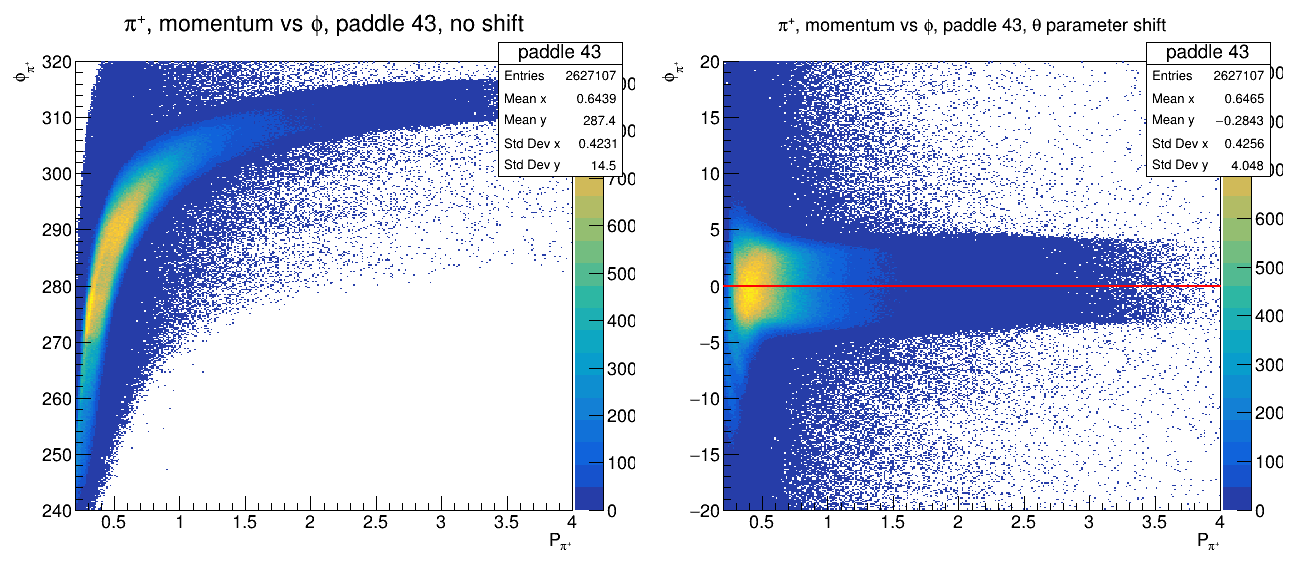

In [58]:
c_sp = ROOT.TCanvas("c_sp", "c_sp", 1300,600)
c_sp.Divide(2,1)
c_sp.cd(1)
paddle_single.Draw("colz")
# line = ROOT.TLine(paddle_single.GetXaxis().GetXmin(), 0, paddle_single.GetXaxis().GetXmax(), 0)
# line.SetLineColor(2)
# line.SetLineWidth(2)
# line.SetLineStyle(1)
# line.Draw("SAME")
c_sp.cd(2)
paddle_single2.Draw("colz")
line2 = ROOT.TLine(paddle_single2.GetXaxis().GetXmin(), 0, paddle_single2.GetXaxis().GetXmax(), 0)
line2.SetLineColor(2)
line2.SetLineWidth(2)
line2.SetLineStyle(1)
line2.Draw("SAME")
c_sp.Draw()

In [59]:
title = f"#pi^{{+}}, #theta vs #phi, paddle {com_to_check}, no shift; {pipThetaAxis}; {pipPhiAxis}"
title2 = f"#pi^{{+}}, #theta vs #phi, paddle {com_to_check}, #theta parameter shift; {pipThetaAxis}; {pipPhiAxis}"
th_sin = fs2c_rdf.Histo2D((f"paddle {com_to_check}", title, 300, 35, 125, 360, -100, 20), "pipTheta",  "pipPhi")
th_sin2 = fs2c_rdf.Histo2D((f"paddle {com_to_check}", title2, 300, 35, 125, 360, -50, 40), "pipTheta",  "pipsPhiF")

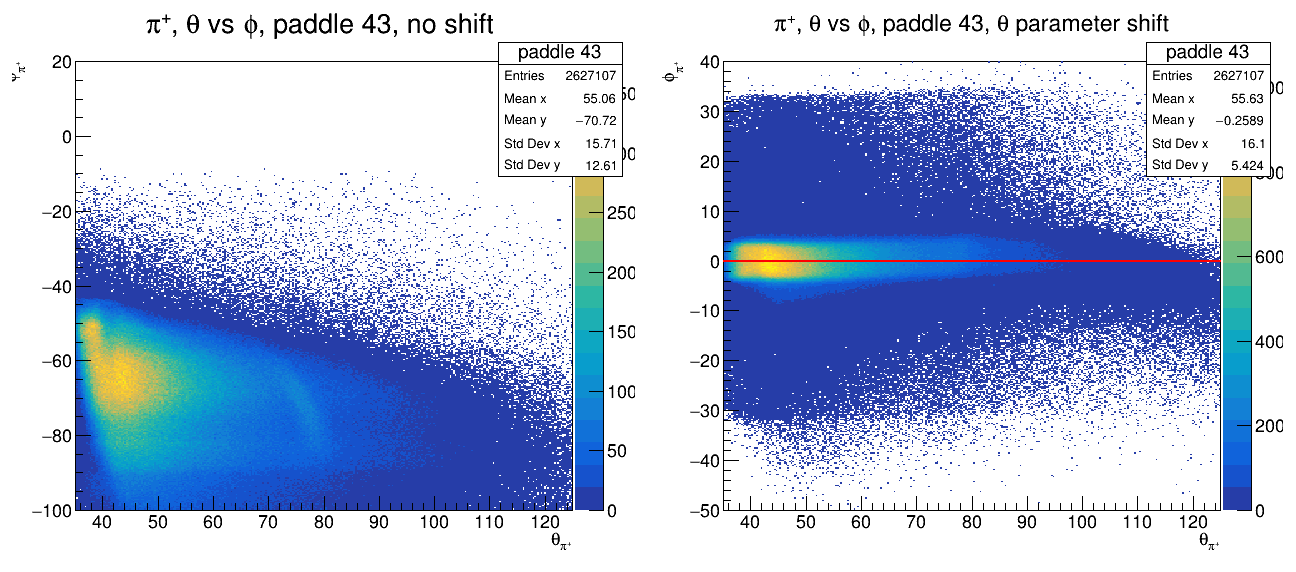

In [60]:
c_sp = ROOT.TCanvas("c_sp", "c_sp", 1300,600)
c_sp.Divide(2,1)
c_sp.cd(1)
th_sin.Draw("colz")
# line = ROOT.TLine(th_sin.GetXaxis().GetXmin(), 0, th_sin.GetXaxis().GetXmax(), 0)
# line.SetLineColor(2)
# line.SetLineWidth(2)
# line.SetLineStyle(1)
# line.Draw("SAME")
c_sp.cd(2)
th_sin2.Draw("colz")
line2 = ROOT.TLine(th_sin2.GetXaxis().GetXmin(), 0, th_sin2.GetXaxis().GetXmax(), 0)
line2.SetLineColor(2)
line2.SetLineWidth(2)
line2.SetLineStyle(1)
line2.Draw("SAME")
c_sp.Draw()

In [61]:
# title = f"#pi^{{+}}, #theta vs momentum, paddle {com_to_check}, no shift; {pipThetaAxis}; {pipPAxis}"
# th_sin = f_rdf.Histo2D((f"paddle {com_to_check}", title, 100, 30, 135, 300, 0.2, 1.3), "pipTheta",  "pipP")
# c_sp = ROOT.TCanvas("c_sp", "c_sp", 800,600)
# th_sin.SetStats(0)
# th_sin.Draw("colz")
# c_sp.Draw()

In [62]:
import re

# Define the index and equation


# Define the format for the output
output_line = f"p{com_to_check} = ({final_eq});\n"
print(output_line)
# Function to update or append the equation in the file
def update_equation_file(file_path, index, equation):
    # Read the existing content of the file
    try:
        with open(file_path, "r") as file:
            lines = file.readlines()
    except FileNotFoundError:
        lines = []

    # Check if the identifier already exists and update it
    found = False
    for i, line in enumerate(lines):
        if re.match(f"p{index} =", line):
            lines[i] = f"p{index} = ({equation});\n"
            found = True
            break

    # If the identifier was not found, append the new equation
    if not found:
        lines.append(f"p{index} = ({equation});\n")

    # Write the updated content back to the file
    with open(file_path, "w") as file:
        file.writelines(lines)

# Update or append the equation in the file
update_equation_file("fits.txt", com_to_check, final_eq)

p43 = (pipPhiw - ((-1.320e-14*pipTheta*pipTheta+2.058e-12*pipTheta+-3.5e+03) * exp( (2.917e-04*pipTheta*pipTheta+-0.06175*pipTheta+-3.568) * pow( pipP, (-1.028e-05*pipTheta*pipTheta+0.002379*pipTheta+0.1845) )) + (4.200e-04*pipTheta*pipTheta+-0.1567*pipTheta+320.0)));

